# Tarea 0 - Introducción a redes neuronales

## Fernanda Weiss - Ignacio espinoza

## 1. Back-propagation (BP) from *Scratch*


BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).

<a id="1-b"></a>
> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).

En una red neuronal Feed Forward (FF) se cuenta con la capa de entrada, capas ocultas y la capa de salida, dentro de cada capa existe una cantidad variable de neuronas. Toda la información se mueve solo hacia adelante, es decir, desde la capa de entrada, luego hacia las capas ocultas en orden y finalmente la capa de salida. Cada capa posee una función de activación, que generalmente, en las capas ocultas que es una transformación aprendida por cada neurona de la combinación lineal y no linealidad.

Para este caso, se trabajara una red Feed Forward con:

Dos capas ocultas: 32 neuronas la primera y 16 neuronas la segunda.
La capa de salida posee 3 neuronas ,debido a que se desea clasificar entre tres clases.
La función de activación de las capas ocultas será la función sigmoidal y para la capa de salida una función sofmax.
La función de pérdida será inicialmente con una función cross entropy.
Para entrenar una red FF se deben realizar principalmente tres pasos por cada ejemplo del entrenamiento, y estos a su vez se van iterando:

1) El primer paso es implementar el forward pass, el cual realiza la predicción de la red. Este paso se le entrega un input a la red, el cual se va transformando a medida que pasan por las capas, hasta llegar a la última capa y entregar el output correspondiente. Desde la capa de entrada el input pasa a la primera capa oculta, en donde se realiza una combinación lineal de las neuronas con sus respectivos pesos de la capa de entrada en cada una de las 32 neuronas, y luego se le aplica la función de activación sigmoidal. Lo mismo ocurre con la segunda capa oculta, en que se realiza una combinación lineal de la capa anterior por cada neurona y luego se aplica la función de activación sigmoidal. Finalmente, para la ultima capa se realiza el mismo procedimiento, solo cambia que la función de activación es la sofmax.

2) A continuación se mide el error y la función de pérdida, obtenida del resultado anterior del forward pass

3) Finalmente se debe implementar el backward pass, el cual corrige los pesos obtenidos en cada capa según la pérdida observada en el paso anterior. Se parte de la última capa hasta llegar a la primera. Aquí se modifican los pesos disminuyendo la tasa de aprendizaje entregada como parámetro por la derivada parcial del error respecto al peso correspondiente.

Como se mencionó anteriormente, los pasos se deben repetir la cantidad de veces como ejemplos de entrenamiento existan, es decir aplicar el método de SGD, donde se evalúa ejemplo por ejemplo.


Primero se genera la estructura que tendrá nuestra red. La clase *Network* contendrá las capas de la red, dentro de cada capa estan las neuronas que pertenecen a la clase *Neuron* que almacena sus características como la salida de la neurona, gradiente de la función de activación de la neurona, el error total de la neurona, y las conexiones que tiene esa neurona con todas las neuronas de la capa anterior. Cada conexión es de la clase *Connection* que contiene la neurona de la capa anterior a la que está conectada, el peso de la conexión y la derivada del peso.

Dentro de cada clase se implementaron las funciones ad hoc. Es por esto que la parte [b.](#1-b) está incluida en la clase *Network*, donde se encuentra la función de entrenamiento de la red, el forward pass para cada ejemplo, y la función de decisión del valor categórico de la clase del ejemplo.


In [77]:
#clases
import numpy as np

class Connection:
    def __init__(self, connected_neuron):
        print("en conexion")
        self.connected_neuron = connected_neuron
        self.weight = np.random.normal()
        self.d_weight = 0.0
        print("connectedNeuron ",self.connected_neuron, "self.weight", self.weight, "self.dWeight", self.d_weight )


class Neuron:
    learning_rate = 0.001
    #alpha = 0.0

    def __init__(self, layer):
        print("en neuron")
        self.dendrons = []
        self.error = 0.0
        self.gradient = 0.0
        self.output = 0.0
        if layer is None:
            pass
        else:
            for neuron in layer:
                print("neuron ", neuron)
                con = Connection(neuron)
                self.dendrons.append(con)

    def set_output(self, output):
        self.output = output

    def get_output(self):
        return self.output
    
    def add_error(self, err):
        self.error = self.error + err
    
    def set_error(self, err):
        self.error = err
        
    def add_error(self, err):
        self.error = self.error + err
        
    # funciones de activacion de neuronas
    def sigmoid(self, x):
        #return 1 / (1 + math.exp(-x * 1.0))
        return np.divide(1.0, (1.0 + np.exp(-x)))
    
    def relu(self, x):
        return np.maximum(x, 0.0)
    #derivada de la sigmoid y softmax, ya que x ya es cada funcion de activación aplicada y ambas tienen la misma forma de derivada
    def gradient_activation(self, x):
        return x * (1.0 - x)
    
    def d_relu(self, x):
        return 1. * (x >= 0.0)
    
    def forward(self, activation_function):
        #print("en forward de la neurona")
        linear_comb = 0
        if len(self.dendrons) == 0:
            return
        for dendron in self.dendrons:
            linear_comb += dendron.connected_neuron.get_output() * dendron.weight
        if(activation_function == "sigmoid"):
            self.output = self.sigmoid(linear_comb)
        else:
            self.output = self.relu(linear_comb)
                                    
        #print("con la sigmoid ", self.output)
        
    def backward(self, activation_function, last):
        if(last or activation_function == "sigmoid"):
            self.gradient = self.error * self.gradient_activation(self.output);
        else:
            self.gradient = self.error * self.d_relu(self.output);
        #print("learning_rate aplicado ", Neuron.learning_rate)
        for dendron in self.dendrons:
            dendron.d_weight = Neuron.learning_rate * (
            dendron.connected_neuron.output * self.gradient) #+ self.alpha * dendron.d_weight;
            dendron.weight = dendron.weight + dendron.d_weight;
            dendron.connected_neuron.add_error(dendron.weight * self.gradient);
        self.error = 0;
    
class Network:
    def __init__(self, topology):
        self.layers = []
        for num_neuron in topology:
            print("num neuron ", num_neuron)
            print("self.layers ", self.layers)
            layer = []
            for i in range(num_neuron):
                if (len(self.layers) == 0):
                    layer.append(Neuron(None))
                else:
                    layer.append(Neuron(self.layers[-1]))
            layer.append(Neuron(None))
            layer[-1].set_output(1)
            print("layer ", layer)
            self.layers.append(layer)

    def set_input(self, inputs):
        for i in range(len(inputs)):
            self.layers[0][i].set_output(inputs[i])
    
    def train(self, x, y):
        data = list(zip(x, y))
        error_epoch = []
        accuracy_epoch = []
        for j in range(self.epoch):
            print("epoch ", j)
            err = 0
            acc = []
            np.random.shuffle(data)
            #for i in range(len(inputs)):
            for example in data:
                self.set_input(example[0])
                self.forward_pass(self.activation_function)
                self.backward_pass(example[1], self.activation_function)
                err = err + self.get_error(example[1], self.type_error)
                acc.append(np.dot(example[1], self.get_th_results()))
                print("ytrue ", example[1], "ypred ", self.get_th_results(), "ypred class ", self.get_class())
            print("error: ", err, "accuracy: ", acc)
            error_epoch.append(err)
            accuracy_epoch.append(np.mean(acc))

        #print(error_epoch)
        #print(accuracy_epoch)
        return error_epoch, accuracy_epoch
    
    def predict(self, x): #x -> examples
        output = []
        for x_i in x:
            self.set_input(x_i)
            self.forward_pass(self.activation_function)
            output.append(self.get_class())
        return output
    
    def softmax(self, x):
        """Compute softmax values for each sets of scores in x."""
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0) # only difference
        
    def forward_pass(self, activation_function):
        for layer in self.layers[1:-1]:
            for neuron in layer:
                neuron.forward(activation_function)
        #print("en forward de la red, se viene ultima capa")
        linear_comb_softmax = []
        for neuron in self.layers[-1]:
            linear_comb = 0
            for dendron in neuron.dendrons:
                linear_comb += dendron.connected_neuron.get_output() * dendron.weight
            linear_comb_softmax.append(linear_comb)
        output = self.softmax(linear_comb_softmax)
        #print("output", output)
        for i in range(len(self.layers[-1])):
            self.layers[-1][i].set_output(output[i]) 
        #[print(neuron.get_output()) for neuron in self.layers[-1]]
    
    def backward_pass(self, y_true, activation_function):
        for i in range(len(y_true)):
            self.layers[-1][i].set_error(y_true[i] - self.layers[-1][i].get_output())
        for neuron in self.layers[-1]:
            neuron.backward(activation_function, last = True)
        for layer in self.layers[:-1:-1]:
            for neuron in layer:
                neuron.backward(activation_function, last = False)
    
    def get_error(self, y_true, type_error):
        err = 0
        if(type_error == "MSE"):
            for i in range(len(y_true)):
                e = (y_true[i] - self.layers[-1][i].get_output())
                err = err + e ** 2
            err = err / len(y_true)
            err = np.sqrt(err)
        else: #cross entropy np.divide(1.0,n_data)
            ypred = self.get_results()
            ypred = np.clip(ypred, epsilon, 1 - epsilon)
            err = - (y_true * np.log(ypred) + np.subtract(1.0, y_true) * np.log(np.subtract(1.0, ypred)))
            err = np.mean(err)
        return err

    def get_results(self):
        output = []
        for neuron in self.layers[-1]:
            output.append(neuron.get_output())
        output.pop()
        return output
    
    def get_th_results(self):
        output = []
        for neuron in self.layers[-1]:
            o = neuron.get_output()
            if (o > 0.5):
                o = 1
            else:
                o = 0
            output.append(o)
        output.pop()
        return output
    
    def get_class(self):
        output = self.get_th_results()
        return np.argmax(output)


> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.

> Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

Anteriorimente se implementó una red neuronal feed fordward con Back-propagation desde cero para resolver un problema de clasificación. Esta red se pondrá a prueba versus una implementación de una red neuronal proporcionada por [Keras](https://keras.io/), una API de alto nivel para redes neuronales escrita en Python.

Para los entrenamientos de cada modelo se utilizará el dataset *[Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos)*, el cual posee datos de 50 muestras de cada una de tres especies de la planta Iris: Iris setosa, Iris virginica e Iris versicolor. Cada entrada del dataset presenta mediciones del ancho y largo se sus sépalos y pétalos, además del tipo de planta en cuestión (clase o etiqueta).

<img src="http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png" alt="Mediciones de una planta" style="width: 200px;"/>

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import keras

X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

#transform target to one hot vector
y_onehot = keras.utils.to_categorical(y_train)

A continución se define la topología que tendrá la red. Como se mencionó anteriormente ésta será de 4 neuronas en la capa de entrada, 32 neuronas en la primera capa oculta, 16 neuronas en la segunda capa oculta y 3 neuronas en la capa de salida. Además de ajustar la tasa de aprendizaje.

In [38]:
#set topology
topology = []
topology.append(X_train.shape[1])
topology.append(32)
topology.append(16)
topology.append(3)

epsilon =  1e-10

Neuron.learning_rate = 0.09
#Neuron.alpha = 0.0


Se entrena la primera red con:
* Función de activación de capas ocultas: Sigmoidal
* Función de pérdida: Cross entropy

In [96]:
import time
time_train = []
#entrenamiento 

net_sigmoid_ce = Network(topology)
net_sigmoid_ce.activation_function = "sigmoid"
net_sigmoid_ce.type_error = "cross_entropy"
net_sigmoid_ce.epoch = 100
start_time = time.time()
error_sigmoid_ce, accuracy_sigmoid_ce = net_sigmoid_ce.train(X_train, y_onehot)
time_train.append(time.time() - start_time)
print("-- training time: %s [s] --" % (time_train[-1]))


num neuron  4
self.layers  []
en neuron
en neuron
en neuron
en neuron
en neuron
layer  [<__main__.Neuron object at 0x7f4b3e7c0eb8>, <__main__.Neuron object at 0x7f4b3e982668>, <__main__.Neuron object at 0x7f4b3eab6e10>, <__main__.Neuron object at 0x7f4b3eab6f60>, <__main__.Neuron object at 0x7f4b3eab6f28>]
num neuron  32
self.layers  [[<__main__.Neuron object at 0x7f4b3e7c0eb8>, <__main__.Neuron object at 0x7f4b3e982668>, <__main__.Neuron object at 0x7f4b3eab6e10>, <__main__.Neuron object at 0x7f4b3eab6f60>, <__main__.Neuron object at 0x7f4b3eab6f28>]]
en neuron
neuron  <__main__.Neuron object at 0x7f4b3e7c0eb8>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3e7c0eb8> self.weight -1.4047189402432911 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3e982668>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3e982668> self.weight 0.5959373025999071 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3eab6e10>
en conexion
connectedNeuron  <__main_

neuron  <__main__.Neuron object at 0x7f4b3e7c0eb8>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3e7c0eb8> self.weight -0.43087535651069153 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3e982668>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3e982668> self.weight -0.7786981549838343 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3eab6e10>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3eab6e10> self.weight -0.19196997433647794 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3eab6f60>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3eab6f60> self.weight 0.5973078216554663 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3eab6f28>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3eab6f28> self.weight 0.6049861563463469 self.dWeight 0.0
en neuron
neuron  <__main__.Neuron object at 0x7f4b3e7c0eb8>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3e7c0eb8> self.we

connectedNeuron  <__main__.Neuron object at 0x7f4b3e54a320> self.weight 0.8867932238078716 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3e54a400>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3e54a400> self.weight 1.3415200130211784 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3dcf9048>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3dcf9048> self.weight 1.2739725106481554 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3dce5518>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3dce5518> self.weight 0.06650984085743229 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3dce5ac8>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3dce5ac8> self.weight -0.07263149571671661 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b3dce5ba8>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b3dce5ba8> self.weight 0.6115017404771904 self.dWeight 0.0
neuron  <__main__.Neuron object at

ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1


ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2


ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2


ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
error:  90.88862648301595 accuracy:  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1


ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1


ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1


epoch  32
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred

ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
error:  82.14845251992497 accuracy:  [0.0, 0.0, 1.

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
error:  76.337312617999 accuracy:  [0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0,

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
error:  76.21111520544956 accuracy:  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0


ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred class  1
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred class  0


ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred class  0
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred class  0
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred class  2
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred class  0
error:  73.14201276052187 accuracy:  [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.

In [97]:
print(accuracy_sigmoid_ce)

[0.21333333333333335, 0.2, 0.19333333333333333, 0.18666666666666668, 0.18, 0.17333333333333334, 0.18, 0.18, 0.18, 0.2, 0.21333333333333335, 0.21333333333333335, 0.24, 0.24, 0.24, 0.24666666666666667, 0.24666666666666667, 0.23333333333333334, 0.25333333333333335, 0.26, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.26666666666666666, 0.2733333333333333, 0.2733333333333333, 0.2733333333333333, 0.2866666666666667, 0.3, 0.3, 0.3, 0.30666666666666664, 0.31333333333333335, 0.31333333333333335, 0.31333333333333335, 0.32666666666666666, 0.3333333333333333, 0.34, 0.34, 0.34, 0.34, 0.3466666666666667, 0.3466666666666667, 0.3466666666666667, 0.3466666666666667, 0.3466666666666667, 0.35333333333333333, 0.35333333333333333, 0.35333333333333333, 0.36, 0.36666666666666664, 0.36666666666666664, 0.38, 0.36666666666666664, 0.38, 0.3933333333333333, 0.4, 0.4, 0.4, 0.4, 0.4066666666666667, 0.4066666666666667, 0.4, 0.4, 0.4066666666666667, 0.41333

Se entrena la segunda red con:
* Función de activación de capas ocultas: ReLU
* Función de pérdida: Cross entropy

In [40]:

net_relu_ce = Network(topology)
net_relu_ce.activation_function = "relu"
net_relu_ce.type_error = "cross_entropy"
net_relu_ce.epoch = 100
start_time = time.time()
error_relu_ce, accuracy_relu_ce = net_relu_ce.train(X_train, y_onehot)
time_train.append(time.time() - start_time)
print("-- training time: %s [s] --" % (time_train[-1]))


num neuron  4
self.layers  []
en neuron
en neuron
en neuron
en neuron
en neuron
layer  [<__main__.Neuron object at 0x7f4b4437db70>, <__main__.Neuron object at 0x7f4b4437d470>, <__main__.Neuron object at 0x7f4b44377b38>, <__main__.Neuron object at 0x7f4b44377f28>, <__main__.Neuron object at 0x7f4b44377978>]
num neuron  32
self.layers  [[<__main__.Neuron object at 0x7f4b4437db70>, <__main__.Neuron object at 0x7f4b4437d470>, <__main__.Neuron object at 0x7f4b44377b38>, <__main__.Neuron object at 0x7f4b44377f28>, <__main__.Neuron object at 0x7f4b44377978>]]
en neuron
neuron  <__main__.Neuron object at 0x7f4b4437db70>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4437db70> self.weight -0.6301938927566354 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4437d470>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4437d470> self.weight -1.5500425468134273 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b44377b38>
en conexion
connectedNeuron  <__main

connectedNeuron  <__main__.Neuron object at 0x7f4b4459af98> self.weight -1.5051085185195752 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b444bf630>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b444bf630> self.weight 0.6380526130646296 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b46863b70>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b46863b70> self.weight 1.1773285887249214 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b46863208>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b46863208> self.weight 0.23068288324911113 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b46863d68>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b46863d68> self.weight 0.30499626104925803 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b445bb860>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b445bb860> self.weight 0.7871263093096075 self.dWeight 0.0
neuron  <__main__.Neuron object at

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0726611103250012e-17, 1.0, 7.176723397416362e-48]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.3857334491426774e-09, 0.9999999976142617, 3.640925859420896e-19]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1603213487490487e-13, 0.9999999999998839, 3.136082988841938e-39]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.5668697508630702e-17, 1.0, 2.2236240255125255e-48]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.711461969437994e-16, 0.9999999999999998, 3.4538224274013046e-43]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.718650455039176e-08, 0.999999902811416, 7.676032358903418e-15]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.89797052454276e-18, 1.0, 4.790951055283737e-52]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.014416050365839e-16, 1.0, 2.368196474811131e-47]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.560994250902818e-17, 1.0, 4.3188138554847445e-50]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4279835048333875e-06, 0.9999981795291336, 3.

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.7216452206560124e-15, 2.1974255135649943e-19, 0.9999999999999964]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.872377293650741e-12, 2.2300403236943566e-18, 0.9999999999904361]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.113523777387217e-15, 0.9999999999999989, 5.071847090222274e-44]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.447453588522714e-14, 4.576619165937136e-13, 0.9999999999994862]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0002619418325433603, 0.00018811768720277365, 0.9995494756523529]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.04573092059016707, 0.029816536641826163, 0.9244209190885808]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.011704414100478316, 0.06944481345735402, 0.9188040608926114]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4339507657257464e-26, 1.0, 1.390643835342947e-72]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.138262146426131e-22, 1.0, 9.483351921914306e-57]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.58170

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1665961805284378e-21, 1.0, 1.6267992745129942e-55]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.424103864861657e-07, 2.634433658104139e-10, 0.9999991829372187]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2820243614079727e-06, 7.276203095728325e-06, 0.9999879467704399]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.075980400601046e-31, 1.0, 2.3615077052585394e-85]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00026459085173856844, 0.02385692474107016, 0.9758437843859338]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [9.026647232022483e-20, 0.9999999999999987, 1.3302996586695821e-15]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.472693080402146e-08, 0.9999999852726784, 2.269989523897012e-18]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [9.344230269407174e-14, 2.4051051828564737e-10, 0.9999999997557258]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.957886751830811e-09, 2.8570050407493718e-11, 0.9999999863259117]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.934996164576495e-10, 1.8000007425980617e-14, 0.9999999991386688]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.303613951210479e-13, 2.6071016709627683e-16, 0.9999999999696394]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.195201030689734e-20, 2.97202074318985e-23, 0.9999999999999936]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.5013742157609772e-30, 1.0, 1.1722699124801329e-79]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.487674864811194e-21, 1.0, 3.776968102578914e-51]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.389336877754847e-16, 2.1036647309600672e-16, 0.9999999999999987]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.821817822465234e-16, 2.1871996063055084e-21, 0.9999999999999005]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [8.204016692875206e-24, 1.5902909502811136e-23, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.574846556447495e-09, 0.0003927042139209469, 0.9996072800723085]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [8.2030421015419

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [8.75479025157525e-07, 0.9999991043440517, 1.679557612625791e-09]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.1314011203186661e-10, 0.9999999945004505, 2.402189828463966e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8062344911983388e-34, 1.0, 7.525507338917082e-36]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.0678817373212213e-07, 0.9988069603977102, 0.0010059823498304646]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.49386484328065e-10, 0.9999899932637065, 7.477251594782257e-06]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.008018302493936e-10, 0.999999999782166, 2.5845122814952766e-15]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.338327678010072e-20, 1.0, 6.230231942385031e-28]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7579154304942137e-10, 0.0022347536866782975, 0.9977617655940922]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9461062298118328e-17, 1.0, 1.220699136407588e-32]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.7082523381043067

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.5675056016639614e-31, 1.0, 4.261173348064851e-73]
error:  1033.2491973752437 accuracy:  [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0]
epoch  5
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.1784319566175278e-10, 1.7309898498194279e-06, 0.99999707374020

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1510861355326442e-08, 0.9999999858819975, 2.4834413577986814e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.452066613296731e-08, 0.9999999845241947, 1.260946787667407e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.730760630638677e-12, 6.097688081979854e-13, 0.9999999997329518]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.267714282204864e-18, 1.9903945391978613e-22, 0.9999999999999785]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.218776105934034e-23, 1.0, 7.255694706682829e-57]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.143807188288335e-24, 1.0, 7.425836596814973e-59]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.384526986909826e-29, 1.0, 3.4429628890541066e-69]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.973443741736891e-26, 1.0, 7.018561736282861e-61]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.711964516159704e-05, 0.9998303271059983, 9.216022617715059e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.753300819181024e-10, 1.3540563

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.2780934183367266e-19, 5.0146896078266843e-23, 0.999999999999982]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.2889766157816235e-06, 0.999996536788372, 1.5746456677252573e-07]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.213336991091743e-26, 1.0, 4.035537904293627e-63]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.432652209488856e-05, 0.9998673414982457, 5.633574796792793e-05]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.606440581964196e-28, 1.0, 3.0690268211779213e-69]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4898101350252186e-21, 1.0, 1.1284305627286864e-52]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.51028389810203e-41, 1.0, 9.512103254606401e-102]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [4.6964408552063025e-12, 2.1719882557280816e-13, 0.9999999971340798]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.953033529260068e-07, 3.659392999393683e-07, 0.9999974723619899]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [7.162711464256489e-17, 1.0278

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.607990854460333e-22, 1.0, 1.447467876944183e-53]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.9824625663077674e-27, 1.0, 1.3607035189097195e-63]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0282404729907019e-27, 1.0, 1.6785296487175134e-63]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.0787087764254065e-30, 1.0, 6.179032303530572e-71]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1046359448469033e-24, 1.0, 1.7110157178996542e-60]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.600164628898503e-20, 7.141549515213285e-15, 0.9999999999999925]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4651516554310785e-17, 1.0, 2.001493029756792e-20]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.520218568530283e-20, 9.816809383506353e-24, 0.9999999999999947]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.2399455889483013e-14, 1.0741153687285811e-20, 0.9999999999979208]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.837877608008179e-18, 0.9972493745553831, 0.00275062544

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.800116734969712e-46, 1.0, 1.1779070642570077e-105]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.146122198792004e-38, 1.0, 1.154559983971802e-85]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00010306405259199891, 0.012068219615385923, 0.9863943874642391]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.3470517025165475e-40, 1.0, 1.8614137956519347e-91]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.81935585560184e-33, 1.0, 1.4550774079873606e-75]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [9.725721164296507e-09, 0.9998550265453083, 0.0001443247817988857]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.501078383430192e-37, 1.0, 1.1448361318229744e-84]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.94659246053732e-23, 0.9999999999999694, 3.0605043621211925e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.079204714200684e-15, 6.452390403142869e-18, 0.9999999999600417]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.696209764338685e-14, 0.9999999999975802, 2.3

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.7240893726182e-10, 4.340891104523292e-10, 0.9999999560815437]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8025175300824397e-08, 0.9999999819344191, 5.7929740988177775e-15]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2887226834650248e-38, 1.0, 2.3296243066482243e-88]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.353694629897258e-40, 1.0, 4.8439588750268005e-92]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.839527022189192e-10, 2.589112143366417e-09, 0.9999998722385838]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.878226753566707e-15, 0.999999999999998, 1.6451654397733e-27]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.8363359343664216e-33, 1.0, 6.351936767131326e-82]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.0510047977991686e-13, 0.9999999840846923, 1.5915038774118124e-08]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.53110440665789e-41, 1.0, 6.35175001506376e-95]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.131067439061027e-40, 1.0, 2.28489

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.4297206111614683e-11, 1.5823000521201668e-12, 0.9999999912618359]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00010290631023255452, 0.9995843433112066, 0.00029899163160974267]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.3174647096964238e-10, 0.00037915626601831346, 0.9996208421248204]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0724009124312187e-28, 1.0, 1.1195013985454785e-68]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0480445768392223e-07, 0.9993508158597121, 0.0006467182681066783]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.409642233985736e-41, 1.0, 3.2264922796795025e-98]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.7646224665471926e-27, 1.0, 8.373152934477391e-64]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [4.4426282736352544e-10, 0.5073536077620211, 0.492646391100445]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.619593443541853e-29, 1.8386264411665807e-32, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00010230895778857573, 0.0

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.244176727311944e-12, 0.5702475186333645, 0.42097855062100675]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.661501843476217e-12, 0.9999999997922036, 3.804932234674285e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.267120057184794e-14, 0.9999999999999873, 1.537937290835023e-27]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0951116640362998e-13, 0.9999999999998905, 4.483160407641258e-27]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6781513821113275e-07, 0.9999747395816629, 1.3310358833739291e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1047225649144345e-14, 0.9999999999999885, 2.832427559127819e-23]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1122781488220686e-53, 1.0, 2.9803541117397786e-126]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.082024450084746e-07, 0.00017255248510885583, 0.9998210836495671]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.035808898054102e-18, 1.0, 3.442354847525555e-26]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.305647918162806e-40, 1.0, 3.3379310305939446e-90]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [3.987995908897709e-06, 0.999628931699922, 0.00011453725968173043]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.1258168439322996e-25, 1.0, 1.9719088046948664e-26]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3565486931153326e-21, 1.0, 4.116512009851053e-37]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1455833355266739e-10, 0.9999999994888893, 3.870422468175092e-15]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [3.4752643760036445e-08, 0.9999995112551334, 2.4522775875177414e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.825949255218605e-10, 0.006601240933248741, 0.9933907590846387]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.491878262752497e-10, 9.73571281467123e-06, 0.9999884046341098]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.1049655247212068e-09, 0.9999999951679799, 1.2454137341810282e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.193365319480

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.2385220935849235e-40, 1.0, 1.3222563982796588e-87]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.136490575537666e-46, 1.0, 3.7306409952216336e-101]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.270487532004824e-46, 1.0, 4.271767447044562e-100]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1310742521243593e-44, 1.0, 5.5202274657320174e-96]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.5523673482318502e-43, 1.0, 2.8152823606422057e-94]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.065096976672958e-40, 1.0, 1.05808154099736e-86]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [5.368606456110521e-10, 0.5651754552184433, 0.4348245055845352]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.3476763616810394e-17, 1.0, 2.232987571208066e-19]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2747342697797088e-17, 1.0, 7.054323183778004e-17]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.553295166556822e-54, 1.0, 4.225150735449527e-121]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] yp

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0701010739070266e-30, 1.0, 3.5467465934546263e-66]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.8384476033201037e-44, 1.0, 2.758686225934879e-96]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6290657369020475e-11, 7.42244759542167e-12, 0.9999999997331819]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.2526427698733034e-40, 1.0, 1.2244354875809871e-89]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.352150194529146e-05, 0.7420021757517139, 0.25797218018511436]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.732330390005247e-34, 1.0, 4.320312695871191e-78]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.420139525493457e-16, 5.194711038169213e-07, 0.9999994805288944]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.0284985295428322e-48, 1.0, 2.054057912201045e-111]
error:  888.5315683453557 accuracy:  [1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [6.8916619957324e-14, 0.9939848325791257, 0.006015167420687261]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.825288659579016e-37, 1.0, 2.0306761868203272e-81]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.2731627804272544e-10, 0.9999999978195113, 1.076076181786521e-09]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.535099695936841e-37, 1.0, 1.5734713794517282e-81]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6413367660340337e-20, 0.9999999896394515, 1.036054718218021e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.652215792472653e-22, 3.403230631087207e-24, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5139468497166436e-12, 0.003981959171539645, 0.9960180408171594]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2313007200428992e-15, 9.203819689424773e-19, 0.9999999999999643]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.848967558029632e-14, 2.595527990893412e-11, 0.999999999831306]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.848954218120537e-0

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.6351117573535905e-46, 1.0, 5.697639720441195e-100]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4468475354311053e-16, 0.9999999999999998, 2.7747881401166585e-30]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.889830922533908e-18, 2.9781072705311853e-15, 0.9999999999999032]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.9366522185095533e-08, 0.9999983073722629, 1.6615615470973091e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9405001773454254e-16, 8.96516227033895e-14, 0.9999999999985272]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.2411196226399204e-10, 0.999999999872486, 2.9107731379608603e-12]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.926751403171553e-44, 1.0, 2.4156136339515733e-92]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.123783755759232e-62, 1.0, 1.847465844938343e-135]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.163369630707207e-33, 1.0, 4.0507015493645636e-44]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [9.061354254901245e-08, 0.

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.5243600503332853e-43, 1.0, 5.490888935687369e-96]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.582425433808235e-21, 1.0, 1.3479899502841126e-23]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.9100975194053e-10, 0.9999999978225056, 4.0132278689225223e-10]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.436395105512062e-46, 1.0, 3.7774861007950034e-98]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.531849148078189e-44, 1.0, 3.0799143003521087e-96]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.1431892108038806e-48, 1.0, 2.076781920564346e-104]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [8.701214042393504e-14, 0.9999972200306921, 2.779969163202211e-06]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.350075485914269e-46, 1.0, 3.3446325165871394e-99]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8393691655374994e-29, 1.0, 1.0109866132884197e-35]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.0125535975692695e-46, 1.0, 4.1079994696492555e-101]
ytrue  [0. 1. 0.] y

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.534584565643627e-40, 1.0, 6.540073045005667e-91]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [6.914029079867453e-17, 0.9999999939965216, 6.0034781005538994e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.3723539183883424e-10, 0.9999999993490922, 4.648586213038408e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.8192912608032513e-13, 4.8162946950830564e-14, 0.9999999999918106]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3429719636589666e-23, 1.0701605783932465e-26, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0069749395663701e-13, 0.9999999999998614, 3.186277834449049e-17]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0968891563265236e-18, 5.620438740653078e-18, 0.9999999999999885]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.0960892911823592e-51, 1.0, 4.409696548704351e-112]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.9543286984220335e-48, 1.0, 1.3032844986773481e-104]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.319719156376432e-42, 

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.865612447548332e-54, 1.0, 1.6533416109596303e-120]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.0453124367864786e-07, 0.9772293871341716, 0.022768441330155573]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5046629813970353e-08, 6.310639897331396e-06, 0.9999934497729396]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.097921210849424e-46, 1.0, 3.89507172187201e-102]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.6172311914614718e-12, 0.9999999999968614, 8.337852421264365e-16]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.3859804770611947e-10, 0.050911139488150556, 0.9490888430914328]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2719284416519839e-52, 1.0, 4.036976532588897e-114]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.963830061940653e-60, 1.0, 3.9896080320372876e-134]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0381568651030674e-14, 1.244073590892752e-20, 0.9999999999996774]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.2162367093129106e-19, 1.0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2549619187762327e-12, 0.9933297826267938, 0.006661447982296273]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.0663330744486607e-22, 1.0, 2.8345364193962747e-18]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.0419594840703404e-17, 1.0, 5.619890591541285e-22]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6074385428116845e-17, 1.0, 4.175470322526709e-18]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.792153183349413e-16, 0.9999999999999998, 8.478979371170649e-21]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.194134470666193e-23, 1.0, 5.346910036494722e-37]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.365924247391254e-27, 1.0, 4.031395840828603e-34]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.379911356627314e-13, 4.0666215084260093e-11, 0.9999999999263909]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.74912830533203e-50, 1.0, 9.75856362127932e-109]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.761441546084967e-20, 1.7583162811828516e-19, 0.9999999999999

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.991218151004131e-49, 1.0, 2.7270092287481476e-106]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1452116279526811e-08, 0.999999925905756, 5.3568788345514923e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.059559068033032e-17, 0.00024025418942498375, 0.9997590542244903]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.291928715997588e-45, 1.0, 1.2741399723406653e-99]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.0523070732766284e-14, 0.9999999999999578, 1.0253947184262969e-17]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.516966566019465e-20, 0.9999999911829515, 8.8170472942099e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1918058710793345e-12, 3.002113317079171e-10, 0.999999999619021]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.624576590161263e-06, 0.09398050931185324, 0.906007122235651]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.853764105979392e-37, 1.0, 2.091010527454894e-79]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2341880555946883e

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.363974164323622e-45, 1.0, 6.524362297936564e-98]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.980479465590218e-14, 0.9999999999999702, 1.011396016140155e-22]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.3405996965534016e-58, 1.0, 7.342347415250878e-128]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.2433433492112626e-18, 4.339443827416971e-14, 0.9999999999985991]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.913368927729629e-17, 0.9999999999999998, 1.0118314436253692e-16]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.7021766161562515e-38, 1.0, 2.1439380969429927e-83]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.635085542129087e-22, 1.6758062440115618e-24, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2807930048796751e-17, 5.348550989054823e-12, 0.9999999999943736]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.37083724736686e-50, 1.0, 2.1914722647404673e-108]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.615195121927713e-25, 1.0, 6.667414866174

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.845452771010512e-10, 4.378532730385823e-07, 0.9999995362100614]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.700908638518275e-41, 1.0, 3.6176015013216007e-87]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.89259407972241e-18, 1.0, 8.835253254475207e-36]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.022782217868887e-44, 1.0, 2.650454730077588e-96]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.674395960605935e-32, 1.0, 1.2447552589320262e-43]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.667223240806887e-27, 1.0, 4.678532705039068e-45]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.373126215090074e-19, 1.0, 9.998932643512613e-32]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9574977701828453e-27, 1.0, 3.5594053598827725e-23]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.051388342217937e-12, 0.9999999999320264, 3.5214226145909753e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.8435758592949374e-13, 0.9999999999994382, 4.3278660110365985e-15]
ytrue  [1

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.771049587780546e-16, 3.890996665739349e-13, 0.9999999999995615]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.4998226177532898e-39, 1.0, 1.890684059289484e-83]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.745640799425795e-25, 2.054851599689269e-28, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.8098073511544718e-20, 8.629745046309468e-15, 0.99999999999998]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.148144035536734e-47, 1.0, 1.3213471668183853e-104]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.52164580925059e-08, 0.9999999535746354, 2.818247498772068e-08]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.4572576060373866e-07, 0.0007466851133967415, 0.9992521568912378]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.5068480783462373e-42, 1.0, 3.6098202952733916e-91]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8254570802724294e-06, 0.9986886859216815, 0.001309228249917874]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.2130069641320632e-12, 0.999999

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.394505254558879e-40, 1.0, 2.4313193102234248e-90]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.31080577436127e-19, 2.537410563395936e-08, 0.9999999675182372]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [7.711876498371844e-16, 0.00026067187093596167, 0.9997393281223487]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.6067115741392277e-24, 1.640408222130791e-28, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [3.990372750271196e-13, 5.080595227132257e-09, 0.9999999929201517]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3997085076995917e-12, 0.9999999728187011, 2.7145615125231786e-08]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.3486422049107744e-49, 1.0, 1.2713195824927442e-111]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.46503019379499e-49, 1.0, 7.20084809421574e-106]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.7507987501521575e-41, 1.0, 4.5863974991536136e-88]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.485445120089117e-13, 0.9999999999995506, 

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.0995479298039458e-11, 3.8561311031087456e-06, 0.9999960887794442]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.786137284034334e-19, 3.3470096129597483e-16, 0.9999999999999927]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.870538650773216e-13, 7.15420704402675e-13, 0.9999999999984761]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2550214275469484e-06, 0.9801339611366156, 0.019860124509681568]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.5022738022304073e-40, 1.0, 1.628071766268892e-89]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.288088746008933e-38, 1.0, 2.0113222472707037e-86]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.732655721259095e-14, 0.9999902588517205, 9.410440943650513e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.83505708168436e-24, 0.9999999999999987, 1.3042416275827757e-15]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.822956648088071e-13, 5.194843306681165e-07, 0.9999994804585525]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.515606167976359e-35, 1.0, 3.7585418841526334e-81]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.201717371311719e-53, 1.0, 3.861208969092707e-119]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.0779805893983325e-40, 1.0, 3.211311539535186e-87]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.434912092225858e-17, 1.0, 4.7204702270824815e-26]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.685443996512747e-10, 1.0030076837497237e-09, 0.9999999974951066]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.515432735829772e-41, 1.0, 6.931528806253316e-92]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.6107061907768077e-06, 9.74036929909389e-05, 0.9999009769159632]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.713407664752716e-21, 1.0, 1.556639139755408e-22]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.420294897429265e-10, 0.04211665454438036, 0.9578807352481938]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0460140079775086e-15, 1.2632141729133152e-18, 0.9999999999999

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.190305471123245e-50, 1.0, 1.991365740779536e-107]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0136015683288466e-38, 1.0, 2.4098167186166942e-83]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.53230244658939e-22, 3.9302853723755684e-16, 0.9999999999999851]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.382671659405167e-08, 1.154788158568614e-05, 0.9999882883018726]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.5155110899443116e-57, 1.0, 8.760406682817389e-126]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.4096010403680965e-09, 0.006556766111399325, 0.9934431625577698]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.226343747155801e-39, 1.0, 4.566993754926307e-88]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.2121384964826989e-12, 0.009792737044455272, 0.9902067703270353]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.320484674015028e-12, 0.9999999999916791, 8.886569408014503e-21]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.315998390657933e-11, 0.994139

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.4761641097274077e-08, 0.9999987767431828, 1.1582790039713881e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.837965350448243e-18, 1.0, 7.128291362001358e-28]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.8457451634156283e-20, 1.5444028767271582e-21, 0.9999999999999998]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.696475328624129e-41, 1.0, 2.667564863104454e-88]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.8364024877621065e-14, 0.1695908555917772, 0.8304091442483036]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3041697070164972e-15, 1.8478745421940826e-09, 0.9999999978685272]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.3933975020458543e-15, 3.6510724871248265e-07, 0.9999996348191776]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9956478036448288e-13, 0.9997369104366596, 0.00026300845766778015]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.6250170380840272e-06, 0.9995160681766176, 0.000482300375930992]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred 

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4324731772726453e-46, 1.0, 1.3275433955457665e-100]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0942664060214084e-14, 1.969718211852578e-07, 0.9999998030280969]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3572118534415769e-24, 4.282557033522861e-29, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6472430053204153e-07, 0.9981359565722374, 0.0018625377436480022]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.653477755857202e-43, 1.0, 2.693031543531278e-93]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.6848182736932552e-36, 1.0, 3.359645121880666e-80]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.556103830896743e-20, 8.99873278743802e-13, 0.99999999999885]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.187102849407506e-44, 1.0, 1.6852618827048287e-94]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.893990523461326e-38, 1.0, 1.8930021160343725e-82]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.2758185752091922e-34, 1.0, 6.198066265790319e-74]
ytrue  [

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0219117769161334e-14, 0.999999499582209, 4.2900721669842193e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.4520286964079465e-13, 0.9999999999997549, 1.4234816310661015e-25]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.992875346845465e-19, 1.0, 1.6327799978244745e-20]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.353414939528077e-41, 1.0, 5.937448812667737e-90]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.952059582929172e-20, 8.818626211662971e-17, 0.9999999999999865]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.895082588241351e-18, 1.9385050052040325e-17, 0.9999999999999793]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.507612453997031e-17, 1.3526317152221382e-25, 0.9999999999999989]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.123394221309124e-22, 6.275549532523705e-15, 0.9999999999999363]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.992631315311263e-40, 1.0, 1.1695845180992785e-86]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.497878709345

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.815072535138911e-15, 0.9999999999997102, 1.925983095277818e-13]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.5482438437035797e-23, 0.9999997731875615, 2.268124384099047e-07]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.1439247089569973e-43, 1.0, 2.5007958947716308e-93]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.132355738034005e-09, 1.163650658631079e-05, 0.9999883528705676]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.559608891299567e-51, 1.0, 2.423769273947032e-112]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.55453095426363e-16, 0.9999999999999996, 1.7547536264508033e-19]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.51981489299676e-43, 1.0, 2.1973694579509612e-95]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.416410510680909e-57, 1.0, 3.7773257541398525e-127]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.07221847376565e-23, 1.0, 1.857492915527447e-19]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.2292360184414624e-48, 1.0, 4.622559574476492

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.055977104008705e-08, 0.9988529628929568, 0.001145487847612789]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.202086898471648e-20, 4.059109992687961e-21, 0.9999999999999998]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.5228414750474196e-16, 0.9999999999982649, 1.7323663284702952e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.918348489239959e-06, 0.9906411498087857, 0.009353014289321553]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3326319131138677e-11, 5.559805170186881e-12, 0.9999999999330027]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.63630862959168e-14, 0.9999999999326268, 6.715427920706749e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9627439493902413e-17, 2.236528223796537e-22, 0.9999999999999996]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.4147808270931706e-18, 2.182334689024987e-24, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.2936585573340104e-12, 9.17938946500803e-13, 0.999999999996086]
ytrue  [0. 0. 1.] ypred  [0, 0, 1

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.931132191639643e-12, 1.648406163608165e-11, 0.9999999998204887]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.1095148559433573e-10, 0.9999999996084832, 3.6211485583389174e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.870890051867379e-26, 1.0, 1.783638339622977e-28]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.1459976465938917e-41, 1.0, 4.682370094818334e-91]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.93019622085679e-42, 1.0, 1.92771275655493e-94]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.275915619559479e-22, 1.3155605253879403e-17, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0672090276269223e-51, 1.0, 1.0454916609073528e-111]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.4277898373974776e-17, 3.5286608127664896e-13, 0.9999999999986053]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.2250061899815165e-14, 1.557434316255943e-05, 0.9999844251744251]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.478289449760858e-44, 1.0, 8.0457610697362

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.995247318976458e-20, 2.0604034871369728e-21, 0.9999999999999998]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3525492335701093e-17, 5.193643372239958e-06, 0.9999947031035125]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4507694978243512e-40, 1.0, 2.2878157403586185e-88]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.8281032895663964e-36, 1.0, 9.565389051349053e-82]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.484287609893784e-12, 6.963355044810341e-14, 0.9999999999953435]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.7070657490913295e-10, 2.417873320497708e-11, 0.9999999996806854]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1264916599680246e-45, 1.0, 4.695645611441911e-104]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.214812954276894e-07, 0.9131349704070932, 0.08686440096271418]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.0867747590123978e-41, 1.0, 2.2770038790010703e-92]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.134978104415107e-22, 5.673

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.29671733709297e-49, 1.0, 2.0079990428150646e-107]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8424881201037155e-11, 0.9999999999809024, 6.141777277086892e-16]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4109561193776462e-12, 0.9999999999985867, 2.1454347039999092e-19]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.978273673834052e-43, 1.0, 2.45752103678978e-91]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.167183495277034e-42, 1.0, 6.959900281851684e-92]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7346068995963224e-20, 7.693285508050734e-20, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.760226754109683e-38, 1.0, 4.815510724596007e-83]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7970393309379114e-10, 8.658683980115958e-10, 0.9999999962726216]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.838982855909165e-45, 1.0, 6.831102779202864e-98]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.6827676281729565e-54, 1.0, 1.2871828341014916e-123]
ytrue  

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.732858792582595e-51, 1.0, 2.3187818794035056e-109]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.288868390812342e-46, 1.0, 1.3262205156939767e-99]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [4.076688432207762e-10, 0.9994609823336954, 0.0005389970367889084]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.4865488536891963e-13, 0.9999999999996387, 2.1998894078146535e-19]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.676391463940661e-18, 8.269855307361013e-10, 0.9999999991694783]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.203593324887708e-25, 0.9999999999547806, 4.521943771762796e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.989209938212842e-15, 0.9998523736492534, 0.0001476263470216071]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.398804034301116e-46, 1.0, 6.602591510691877e-100]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.852065026844766e-12, 0.9999999999930902, 5.808491447942283e-15]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4861741298642

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.54734555380129e-09, 6.424658331325822e-08, 0.9999999111143002]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.4555139385700072e-17, 2.521207493623816e-11, 0.999999999974307]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0564746934583717e-14, 0.9999999999999893, 2.6160844005677592e-28]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.6821149803944147e-07, 0.006901998353660677, 0.9930958430866159]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.361412153189065e-51, 1.0, 1.8319340009002047e-109]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.8766545164951635e-47, 1.0, 1.4084415884354468e-102]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.8063566836742162e-25, 2.3468893281020345e-24, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.886564681029534e-12, 0.001232135194400034, 0.9987678648024608]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.452917532559622e-61, 1.0, 1.039051632326408e-135]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.7367036473245807e-52, 1.0,

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5880430765614567e-21, 1.3454601013299144e-21, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.143038849649787e-13, 0.9999999965213517, 3.4655360074299517e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3824965805947666e-17, 1.0, 2.426125488465933e-22]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.541164009854813e-35, 1.0, 1.5980789489557393e-76]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.129427363457615e-48, 1.0, 1.1731408694454646e-104]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3513461945670887e-21, 1.0, 3.1049353095543807e-22]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1667671338601603e-16, 9.231168413741653e-21, 0.999999999999996]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.3026603430229475e-09, 0.9999999937944977, 2.0784123566951846e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.169945339103999e-11, 8.966781355600694e-10, 0.9999999990096649]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.423371988823648e-08, 0.999718664293505

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.8485464602060113e-51, 1.0, 1.265322810783512e-115]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.779343760551158e-37, 1.0, 6.414882449620703e-81]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.298737486302128e-50, 1.0, 2.7083175973588443e-108]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.401713108470285e-24, 1.8076617428302323e-26, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.28401485835801e-47, 1.0, 5.2777018267260517e-101]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.793350985558694e-49, 1.0, 1.8061104053924714e-107]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.4778445242993236e-12, 0.0420231839347858, 0.9579758090366381]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1446581398182952e-13, 0.015589800375661463, 0.9844101996240279]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.4950844270542532e-11, 0.9999999998468849, 1.2787697743956115e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7099765950709517e-11, 0.9999999999794653, 3.404664464284

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.851292417158528e-08, 0.9252903737430133, 0.0747083715992537]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.0395003777246696e-10, 0.9999648718267539, 3.512291299266422e-05]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [5.497371448197486e-22, 0.9999992761069028, 7.238930970262999e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.451555429325966e-16, 6.63670079749355e-10, 0.9999999993331827]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3755082026820938e-09, 0.9999999710979557, 2.2419693424414047e-08]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.272045971562604e-51, 1.0, 3.405883041293541e-110]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.9864829579627535e-19, 5.6846407017623846e-15, 0.999999999999885]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.825490005728077e-12, 2.0815615623218967e-11, 0.9999999997816265]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.402491662339205e-19, 4.9157481695026436e-17, 0.9999999999999878]
ytrue  [1. 0. 0.] ypred  [0, 1,

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.199272802250368e-11, 0.9943237529169344, 0.005675254943486348]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.85357032303902e-39, 1.0, 5.483851241440694e-85]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.4183291150152e-23, 1.0, 1.5258220154608086e-22]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.704647941805118e-56, 1.0, 3.454906133876049e-126]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2566466237212687e-19, 1.928806479717764e-12, 0.9999999999977038]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.562917308533173e-21, 3.034338182276722e-05, 0.999969656618175]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [4.672958177669205e-18, 0.9127917091176938, 0.08720829088230615]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4628203678249498e-13, 0.9999999996735429, 3.2597436021075037e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.765581615414503e-13, 4.874016588033905e-15, 0.9999999999967655]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8528817161222625e-06,

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.3268241649012313e-41, 1.0, 1.177663838091715e-91]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3397941125529564e-20, 1.0, 9.153715343785727e-18]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.507367772523067e-16, 2.27567215547965e-08, 0.9999999772248332]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.43482495884317e-45, 1.0, 1.1060187976122152e-97]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.456493077043059e-37, 1.0, 5.953985175206543e-82]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.136027404873479e-13, 4.4504171236617306e-13, 0.9999999999706359]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2470732254415144e-15, 0.04629362150867205, 0.9536968583707307]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1723252651844568e-18, 4.908538212703693e-14, 0.9999999999996299]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8439063121711717e-13, 0.9999999999997466, 1.0307823058254261e-16]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.8289847257041217e-16, 4.084224

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0741896838266907e-13, 1.2537496397001575e-14, 0.9999999999998772]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6655587426263547e-20, 1.0, 2.0653258730162274e-32]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.994121011025971e-37, 1.0, 6.896075417923746e-85]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.571429722033002e-14, 2.6751807051692165e-20, 0.9999999999995115]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.541343768905751e-11, 0.9999999998958649, 2.7872083918447335e-12]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [7.624368140174719e-25, 0.9999999994594495, 5.405505723030671e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.431431331100947e-13, 0.0014447363510996108, 0.99855526364186]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.985728363743241e-23, 1.0, 1.0692821086248107e-26]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.903977949528451e-50, 1.0, 5.3648751569376535e-108]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2689628234580748e-60, 1.0, 

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.2888870262681678e-54, 1.0, 2.370897644495451e-123]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2395534936912339e-45, 1.0, 6.427904772094046e-99]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.6416015182738665e-12, 0.8303318773830216, 0.16966623620775875]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.525401682718636e-15, 0.9873164106380559, 0.012683589313827242]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.992430997386894e-19, 0.9999929359442603, 7.064055731853204e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.913324931576623e-10, 0.9999999666630717, 3.178571799805441e-08]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.5278853915142763e-40, 1.0, 9.523874673600451e-91]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.3899723142316848e-26, 5.4544952212435566e-21, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4366267483217224e-48, 1.0, 4.746645848370865e-106]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.125682450789185e-49, 1.0, 2.424816191367572

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.714515114297995e-48, 1.0, 7.082727210480835e-104]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.469449059951318e-40, 1.0, 2.2254594953114045e-86]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.9286593943392686e-40, 1.0, 1.4861309421673007e-88]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.3754581602749406e-17, 2.0745788400625565e-21, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7965005699675837e-18, 3.830015696313379e-13, 0.9999999999995577]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7955180418177423e-17, 9.137543642650068e-06, 0.9999907253870062]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.916214601129331e-39, 1.0, 2.410289534652588e-83]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.6247054567347003e-13, 0.9999999999997333, 2.8882323999342224e-20]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.452661045375062e-25, 1.1101466103639913e-29, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.5768809045032065e-14, 0.9999999963071948, 2.659710569

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.023304596480589e-46, 1.0, 8.004630147163465e-101]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.386186843611393e-56, 1.0, 4.274650781524157e-123]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7856970514502438e-07, 1.047924187035695e-05, 0.9999893260737865]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6226473608462284e-08, 1.1112012148050201e-06, 0.9999988627692201]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.619970035097537e-15, 0.9999999999999971, 9.384332471346061e-18]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.5222628070433454e-20, 2.266883441872031e-17, 0.9999999999999931]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.846400954888465e-50, 1.0, 1.3489101919428867e-108]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.854195096751163e-12, 6.8707055034942255e-09, 0.9999999927325438]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.75292205564964e-19, 0.9999917934887387, 8.206511261177078e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.41500793444

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.5289643410124734e-48, 1.0, 2.859133982176216e-104]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.6662471166691145e-22, 0.9999999999999527, 4.726714464199884e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.259935639962475e-13, 0.00017206624287747607, 0.999827933754689]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.934253993267105e-40, 1.0, 1.759851623005638e-86]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.682890329404974e-19, 9.007590998847043e-17, 0.9999999999999833]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.488038510777318e-13, 2.401301556956823e-14, 0.9999999999998233]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.7631176944890276e-44, 1.0, 4.016674562325533e-93]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.4748461641429216e-48, 1.0, 3.804511708526682e-103]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.7204112414667135e-45, 1.0, 1.1816890956726304e-97]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4881466294412522e-43, 1.0, 5.203154010309

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3075226014424196e-08, 5.6241274759609064e-08, 0.9999999295035532]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.8601113022536777e-48, 1.0, 7.471493701827525e-105]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.263025415399199e-16, 0.999999994591007, 5.408991877829537e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.6333062277303404e-10, 6.69345567290422e-09, 0.9999999911704839]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.482610181415167e-47, 1.0, 2.032115166673956e-104]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [8.305327809819122e-16, 0.00028336368415264666, 0.9997166363086147]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.975786668154158e-20, 1.0, 8.229292527186411e-19]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2658364487299984e-33, 1.0, 9.418478554582167e-75]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4202570383627932e-15, 0.9999999999991811, 8.161754926546039e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.105514981088327e-08, 0.9999

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.229395879793029e-19, 4.5232077424631863e-13, 0.9999999999995477]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.964619150519235e-24, 1.508878010402714e-10, 0.9999999998491123]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.723316040042311e-34, 1.0, 8.30254122194761e-76]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.1678893233069226e-53, 1.0, 3.7485353017690324e-117]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.863049072492921e-10, 0.9999999992571749, 3.990397395871113e-11]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0673607112547736e-34, 1.0, 7.537781881880999e-80]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.811195581199434e-14, 1.9317264007009566e-12, 0.9999999999914189]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9685875626456456e-12, 1.0374976500147022e-13, 0.9999999999685494]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.470947892121917e-44, 1.0, 2.2157394522765785e-94]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.452439333132704e-16, 0.239

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.6791444539368486e-43, 1.0, 6.61478699432556e-94]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2419826363840606e-49, 1.0, 1.1792582491700845e-106]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.7533513511404982e-59, 1.0, 1.146314142812916e-129]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1466368800166528e-40, 1.0, 3.0306779297453003e-87]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.914275164470204e-16, 0.9999999999999996, 9.009126600609652e-22]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.6791444539368486e-43, 1.0, 6.61478699432556e-94]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.037865908189831e-26, 2.9762190530875697e-26, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1595486385808984e-39, 1.0, 7.619467063904875e-85]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3379746113422216e-13, 1.2074784574132472e-14, 0.9999999999955644]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.8588745439858516e-13, 5.806833920131971e-10, 0.9999999992225246]
ytr

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.688074222070937e-19, 3.380222227334524e-15, 0.9999999999999911]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.083633592107511e-17, 0.9999999999998916, 1.0750027689285285e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.881170611995446e-12, 0.9999999965474848, 3.445559629204412e-09]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.0835355402227452e-14, 0.23183189314723904, 0.7681681066713201]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.951340431588082e-15, 0.5565674396166597, 0.4434100299196405]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.3910438537422355e-23, 1.0, 1.5459073037820398e-26]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.297908450590012e-22, 0.9999999999579685, 4.203141317136991e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.277703733121086e-27, 1.0, 9.917792504205223e-22]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.909213724156386e-24, 2.251777804372551e-27, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4389212926434596e-37

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.7588056515878584e-46, 1.0, 3.0346122751488656e-99]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.5000838852632915e-56, 1.0, 6.56151634311823e-122]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.639493199860102e-13, 4.5572658767651584e-05, 0.9999544273406269]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.4218551156225605e-08, 0.003852325027208765, 0.9961467563475683]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1289093558805712e-20, 4.540337157808464e-18, 0.9999999999999969]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [6.387773859877835e-10, 0.012692490480501396, 0.9873043090206126]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.057117478086513e-43, 1.0, 1.909173638400039e-93]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.7124534791340995e-14, 0.9991431322364005, 0.0008568677635258158]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.970553642274774e-19, 1.0, 3.3771632307269097e-25]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9535668539155574e-17, 1.0, 1

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1406670215005358e-11, 7.48006936141257e-09, 0.9999999913950334]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2610128102752356e-21, 1.0, 8.08321605116338e-20]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [3.3821087722987046e-24, 0.999999989378387, 1.0621613073686261e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.705983445227992e-19, 1.3615064535819654e-18, 0.9999999999999944]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.326229448238899e-54, 1.0, 1.4752188092861826e-120]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.2841496618460077e-53, 1.0, 4.76819328167319e-115]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7047170626062922e-14, 0.9988054128138881, 0.0011945871755094483]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.4767504240456416e-28, 8.67791386854485e-30, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.102273117704011e-21, 1.0, 5.6523825597334345e-25]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4899740017930164e-12, 0.9999999998817317, 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.428039257386121e-12, 4.5936645775032976e-12, 0.9999999998961129]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.994618958695206e-49, 1.0, 2.972382929450886e-106]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.3444628485968845e-18, 3.055766968301018e-14, 0.9999999999999694]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.268991961961172e-16, 0.9999999858954112, 1.4104586881244242e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.840447276225139e-21, 7.353914348810376e-19, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8314841681221605e-13, 0.9998619095247188, 0.00013681064228615868]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.8207771019495313e-41, 1.0, 1.325962468302343e-90]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.716900149114215e-50, 1.0, 7.762669333434564e-110]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.2277428553775813e-21, 2.9537495537715317e-13, 0.9999999999750642]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.402350270690303e-22, 4.9

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.362218785697195e-22, 6.838625880072877e-07, 0.9999993161374117]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.5695735998530027e-30, 4.737032154196048e-34, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.231026894421053e-22, 1.741455203656556e-24, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.883192405607947e-19, 7.487429624464412e-16, 0.9999999999999827]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.297758919541423e-15, 0.9999999999994571, 5.35680684439822e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1043957076287051e-14, 0.9999999999999878, 1.6694627362053164e-16]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3066797723629937e-21, 0.0015865244178635285, 0.9984134755821362]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.974972741157422e-40, 1.0, 3.255157727639845e-88]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.490263281780722e-49, 1.0, 6.66340698998927e-107]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.665104081061951e-10, 0.99999999

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.293219934881323e-52, 1.0, 1.9892053521633102e-112]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.8126111387399696e-48, 1.0, 1.3564429394376433e-104]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.345908389901425e-20, 1.0, 4.088544410121748e-32]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.244542374872471e-40, 1.0, 1.1919419326356496e-90]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.587101550693573e-13, 0.9999999999930258, 3.898628042839712e-14]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.0342191259550866e-05, 0.7759901976851376, 0.22398959127630083]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.62672458936455e-40, 1.0, 5.027729639159288e-87]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.2126318994573307e-08, 5.835878742162437e-07, 0.9999993704842026]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.703653936086208e-15, 2.0637246313716046e-14, 0.9999999999988065]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.2144703672056032e-36, 1.0, 1.37045613107604

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.6347510198092482e-10, 0.999913705139512, 8.628658802981978e-05]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.142261488990687e-05, 0.00469077436275698, 0.995297741429599]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.432152843264192e-46, 1.0, 4.153122049458072e-101]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.372670510263245e-22, 0.9999999999998377, 1.6238213465640535e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3998450123067393e-09, 5.237614494270694e-08, 0.999999925333412]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.710102306983233e-10, 0.9999999934691544, 3.83984472262791e-09]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.446236213527648e-41, 1.0, 5.444105504614048e-91]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.4110838072805176e-11, 1.1166114659400947e-07, 0.9999998839887531]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.382467986884703e-41, 1.0, 1.5677318628270352e-94]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.939312725434127e-5

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4085711059465336e-10, 0.9999999997398019, 7.737519691884672e-12]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.4112666937757977e-35, 1.0, 1.292577158813438e-78]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1998248030504554e-21, 0.0013331057316478448, 0.9986668942683519]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.240183952822603e-37, 1.0, 1.102152452577978e-78]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1039230036525635e-35, 1.0, 2.855754608824465e-78]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7489011315546173e-17, 0.9752982800141038, 0.02470171998543923]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.505423548047701e-35, 1.0, 2.948009757974698e-79]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8137188289029434e-11, 0.9999999999791647, 1.9323796132661862e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.5900761599343484e-14, 0.9999999999999816, 2.5841013836167126e-17]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0563593973282937e-20, 2.391

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.697272601563363e-13, 0.9999999999997771, 3.935836784993248e-14]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.100948648929376e-41, 1.0, 1.352313398379284e-91]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.0367733286729095e-36, 1.0, 2.162053837415685e-79]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.492989410414366e-13, 1.4538477758632905e-15, 0.9999999999993343]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.5031327214542448e-11, 0.9999999999786497, 6.827624824403854e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.0714255363363885e-07, 0.96491303256733, 0.035086555606739185]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.58062531629715e-12, 0.999999999956835, 1.4749609639362577e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.656342699188065e-19, 3.791996846549001e-14, 0.9999999999999434]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.910689679394031e-19, 2.6021366947507675e-29, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.584228929470446e-1

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.217604954799557e-14, 0.999999999999942, 5.374594277429467e-18]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.179217163152437e-39, 1.0, 2.81908016101321e-85]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.7878758038933712e-09, 0.6070074388900822, 0.39297859287057596]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.20057736154409e-08, 0.8911271154311612, 0.10887139319060803]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.057691001316274e-22, 2.14127786668966e-24, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0545903192718585e-26, 1.0611647044652313e-21, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.591460839484508e-42, 1.0, 5.937444787235569e-92]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.111518136521996e-06, 0.0004059463058726734, 0.9995928418692859]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.30949837722738e-42, 1.0, 4.861610433676716e-92]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.33847493054023e-48, 1.0, 8.514245828094011e-104]
ytrue 

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.3513786661684973e-40, 1.0, 9.921897496962368e-92]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.8617813800001217e-15, 3.749707245434551e-18, 0.9999999999999982]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6948097788294e-14, 6.048892406561407e-06, 0.9999939496019105]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.606498770460626e-14, 0.999999999999944, 3.372906904082657e-22]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3674267126875048e-09, 4.9974042982617804e-08, 0.9999999282517262]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.2375436279540055e-20, 1.0, 5.3103446071867274e-17]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.3434350774843678e-17, 6.506824250357981e-11, 0.9999999999341573]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.318017972151872e-07, 7.190149145394383e-05, 0.9999274642066138]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.909381744985648e-14, 0.9999590922839688, 4.0875571206693576e-05]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.8711259383725958e-48, 1.0, 1.8682600269776448e-103]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.626645811871886e-12, 0.1831122363281462, 0.8168877635999922]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6207754109036527e-24, 1.0, 7.332256804873485e-23]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.6638711158838657e-08, 1.8960811170949226e-05, 0.9999806150070836]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.153960393071964e-25, 1.0, 6.049163044828995e-20]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [5.604021613991822e-05, 0.12887009374429578, 0.8710735638608198]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.2536386778021104e-23, 1.0084472167105646e-14, 0.9999999999999836]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.0479262149976662e-22, 2.9980281949418894e-18, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.360621077882096e-51, 1.0, 5.851034141713098e-112]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.907857178557443e-14, 0.9999999999999181, 1.

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [4.2889388137780684e-07, 0.002165270540396028, 0.9978327082101892]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [8.031727605178e-11, 2.3003248464758444e-13, 0.9999999999190197]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [7.229793462887475e-14, 0.17652298948029418, 0.8234770105074958]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.317112943149518e-12, 7.968060123129356e-09, 0.9999999916038155]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.313429038364046e-09, 3.641193850808009e-05, 0.9999634984514549]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1927918765448176e-21, 1.0, 2.389437924044175e-22]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.0604277297945863e-46, 1.0, 5.160550935373065e-100]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.932073095785283e-20, 0.9999999991501294, 8.498693958497113e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2884745222755977e-17, 3.4827506575733844e-12, 0.9999999999953726]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.163

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.375753084881581e-19, 1.0, 1.0578967121777208e-20]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.439906391350763e-42, 1.0, 2.761292960098335e-91]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.85650917221026e-09, 0.9999997001169287, 2.769957867690262e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8876816041246294e-17, 1.0, 3.6297452586293936e-23]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.890900539408934e-52, 1.0, 4.955285189226035e-111]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.5224662703665405e-17, 1.0, 1.7110525646409021e-26]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6362844629394396e-12, 0.999999999869501, 7.198229890121595e-12]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.874953079991578e-50, 1.0, 2.230100029622748e-108]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.020591287377658e-15, 5.252051098469775e-18, 0.9999999999999127]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.2097742185036454e-48, 1.0, 1.5322060419744604e-104]
ytrue 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0898003237249248e-27, 8.477149675493167e-29, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.502110190314151e-12, 0.9999999999944977, 7.03681516860074e-23]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.5177599900547206e-09, 0.9775135748853382, 0.022483434786595344]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.1034654204505e-15, 0.9999999999993616, 4.829915508340573e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.3437905058434076e-07, 0.99999955782099, 6.773547491316402e-09]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4487207286085054e-41, 1.0, 5.91843158350718e-88]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9918797882231045e-17, 4.256517869232278e-13, 0.9999999999952429]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6701002610819774e-16, 0.9999999987195514, 1.1338971792372615e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.419917068610401e-09, 5.748162161380353e-05, 0.9999424057814326]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.3463

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.67557904562428e-15, 0.9999999999999913, 1.529861899028337e-17]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.911123293713074e-14, 0.9999822379328654, 1.7759480867997843e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.4077372832496912e-16, 2.058170850783234e-09, 0.9999999978758967]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0435824486639164e-19, 1.0, 6.370035973333831e-29]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.5244372146671523e-46, 1.0, 2.6777808183282575e-100]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [5.776530562947184e-06, 0.9939683748352849, 0.00602582577554576]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.8787009756022196e-08, 0.604603020941463, 0.39539437842138386]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.050642296970319e-52, 1.0, 6.12893560927547e-113]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.21998079630472e-42, 1.0, 1.2707541368915912e-92]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.1300210220669507e-22, 2.484226282

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.910262468310553e-60, 1.0, 1.8033458315019164e-128]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.636309247944896e-16, 1.1268548531975813e-08, 0.9999999885771095]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.488989449753514e-26, 1.0, 6.127119150046665e-29]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [9.11346722377813e-17, 0.9997649232994238, 0.0002343809800903646]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.374736214070187e-15, 8.428170576457933e-12, 0.9999999999771174]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1293988194413055e-51, 1.0, 5.054156021044395e-111]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9246224156289007e-10, 9.848758509531708e-12, 0.9999999997932689]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.5647293895586095e-22, 1.0, 8.510474041901024e-28]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.3075462746866165e-58, 1.0, 3.9788089647833085e-126]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [5.560432040063439e-09, 0.6780228335973396,

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.389961653852056e-07, 0.999993124307065, 6.58916035285456e-06]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.7143697947679362e-41, 1.0, 3.5641090329739044e-90]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.653706062908825e-38, 1.0, 2.7906641109688565e-84]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.9703339402342768e-45, 1.0, 1.9610548277542123e-98]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5276214002987157e-15, 6.212184994521255e-20, 0.9999999999999756]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6040386579472232e-10, 0.999999997200381, 2.6152370380724154e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.415709945550132e-07, 0.9999991583038231, 8.952832054695662e-11]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4060362981172074e-35, 1.0, 4.60106855321824e-78]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0581793153425731e-12, 2.1881814218533024e-12, 0.9999999999758287]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.180106379768337e-37, 1.0, 6

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.0736851113349226e-26, 0.999999999998797, 1.2030431293976012e-12]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.472029761771861e-56, 1.0, 1.0588595665627906e-119]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.73056954710701e-10, 0.00015197740993838234, 0.9998479634210998]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2513546066506688e-46, 1.0, 6.198331133237603e-100]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9641840472024034e-10, 0.9999999997612596, 1.4304858719704399e-11]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.3671396573993592e-45, 1.0, 4.352327318803916e-98]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.990554940249262e-58, 1.0, 1.960837026936196e-126]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1104405444300354e-45, 1.0, 3.471556434294088e-96]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.293943332588283e-45, 1.0, 4.81127296777662e-98]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [9.393778815974259e-11, 0.9999716630515296, 2.833219486042

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.693138818550706e-51, 1.0, 4.139802778170057e-110]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [8.293330767007033e-05, 0.4288071156764041, 0.5711095038246735]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.3412901422861285e-16, 0.9999999999999991, 9.518345518684201e-21]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.592060363554536e-29, 1.0, 8.411314549181234e-38]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.689516082151633e-57, 1.0, 6.89241096073618e-122]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.739511939502567e-56, 1.0, 2.2986108065470887e-120]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.5190203876797386e-07, 0.9999883578145938, 1.138928655221808e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.4399709441596756e-14, 0.05317901891963871, 0.946820953422378]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.75831199430346e-56, 1.0, 3.9582314389407253e-119]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [5.743740353968233e-13, 0.9994695532527751, 0.00053

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.381474511519507e-16, 0.9998337878215385, 0.00016621217290422845]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1667897785925377e-39, 1.0, 7.947362879929196e-87]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.097062686808065e-46, 1.0, 1.3491475729933224e-101]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.0349635358946207e-14, 0.9999999999999789, 7.44233162655256e-22]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0456197223362689e-07, 4.597585893460791e-05, 0.9999538564086904]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.3881011409711903e-45, 1.0, 4.495808573282811e-98]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.383812009539283e-17, 1.0, 7.733186310493244e-22]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.776032477122636e-58, 1.0, 7.808532423238221e-127]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.109084345104231e-17, 1.0, 6.569893045316779e-17]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0874843908456778e-16, 4.048766484861485e-12, 0.9999999999

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [6.387232747954703e-22, 0.9999999985340418, 1.4659583306667195e-09]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.088489749455076e-55, 1.0, 1.0772775104374208e-117]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8035551027290286e-15, 0.9999999999999836, 2.1931208227908535e-19]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.4372761113553547e-20, 1.355349269090223e-20, 0.9999999999999996]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.897171413657732e-58, 1.0, 3.9293845793293635e-123]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0345602145032029e-17, 2.73485383629138e-09, 0.9999999972587015]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.1546731419880865e-59, 1.0, 6.373674367668242e-131]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [9.930277163063155e-07, 0.9996759876265869, 0.0003229297318406925]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.958427767459085e-46, 1.0, 4.5230408302809057e-97]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2449076868859874e-69, 1

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.963037627773064e-20, 1.0, 1.0365188429078194e-20]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.220460951937005e-20, 0.9999999999999505, 4.9557427752458965e-14]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.2831656190552974e-44, 1.0, 3.4484021754968437e-97]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.485167368272891e-22, 1.0, 3.3799093836552995e-23]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [6.670806749261468e-15, 0.01851179625474336, 0.981488203687165]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.5702367980366316e-24, 0.9999999848115637, 1.5188436351737664e-08]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.284350170108463e-51, 1.0, 4.036735169801706e-109]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.8085963626076245e-45, 1.0, 2.2253495618777277e-95]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.178769694277515e-44, 1.0, 4.3025832472096626e-97]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.9352338601295835e-53, 1.0, 9.762827895151011e-114]
ytrue

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.225563410758682e-42, 1.0, 2.891506259972044e-91]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6774041317919703e-07, 0.05851703024946178, 0.9414794849979821]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2100469930670464e-10, 0.9999999992576603, 1.7208015233509257e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.264696329039265e-17, 1.0, 5.129073963194724e-18]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.9383177831594386e-23, 1.0, 2.3234178280863937e-26]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.009416163322959e-49, 1.0, 7.593385041843229e-104]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.2435149274901636e-06, 0.0018945559360247985, 0.9981021877139588]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.194153555883808e-10, 0.9999540938042966, 4.590015282846709e-05]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.5655796343937384e-51, 1.0, 1.0207057991509187e-110]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.7835252245962516e-13, 2.001317130155582e-

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.8332475409376825e-09, 0.9999999935926005, 3.045586972173933e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.11686959284334e-12, 0.9999999996442464, 4.55303526369908e-11]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.5210653896140787e-43, 1.0, 8.183328287283541e-95]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.677612515838566e-20, 1.5056315236552836e-13, 0.9999999999998017]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.6096473370489026e-46, 1.0, 3.8283410946774394e-103]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.592203613623553e-16, 2.2103799100807457e-15, 0.999999999999613]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.10251674131697e-08, 0.9999885598706711, 1.1293916838001639e-05]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.26336459082008e-43, 1.0, 6.453461645861567e-93]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9095166671046694e-07, 0.9999998072893431, 1.3077823119418838e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.5633827260612e

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.547738031690634e-50, 1.0, 2.692973815658654e-108]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2154422869888256e-14, 3.805930254787691e-16, 0.9999999999991498]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.377510360816541e-55, 1.0, 2.259370032851569e-118]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.763243652022709e-45, 1.0, 8.868974963743276e-100]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.870394770008783e-15, 0.9999999999999982, 2.0436452819847978e-20]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6964559141179098e-25, 1.0, 1.0161320930982969e-18]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.000393601366943e-08, 7.745350448055026e-05, 0.9999223159654937]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.914036542089744e-18, 1.0, 4.7370871725910457e-17]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.6360499029466535e-57, 1.0, 7.216058720325915e-125]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.141992991928472e-41, 1.0, 2.8677234166763664e-87]
ytru

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.937183227116233e-16, 0.0024379772409113634, 0.9975597805174595]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.466124994278655e-52, 1.0, 9.585678232640032e-111]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.0398436451812907e-55, 1.0, 3.100795793863191e-120]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.375945344138747e-23, 1.0, 2.3670048182775662e-34]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.470143245042507e-47, 1.0, 6.947035114711426e-101]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.15384703693313e-07, 0.00206486169691537, 0.9979330276049091]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.703372625569344e-45, 1.0, 1.5740206527915707e-97]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2337825389296713e-05, 0.433668297815392, 0.5663075912013914]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.9283882584337563e-40, 1.0, 2.428860027695061e-91]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4364953814985213e-20, 0.9999999999281779, 7.182158131087181e-11

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0348201652152619e-55, 1.0, 1.2601412325260735e-119]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.457570300945624e-16, 0.9999999999999996, 1.2383089476317972e-25]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.4607172331265846e-08, 1.873224582817209e-05, 0.9999811543092563]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.0763227455475645e-21, 0.9999999999999998, 1.1934360168120996e-16]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.038412749132795e-16, 1.4794362481838516e-10, 0.9999999998520541]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.171620789521001e-18, 4.906968707554142e-07, 0.9999994774570334]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.4141189287436604e-45, 1.0, 1.3156144896104691e-99]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.168584087237197e-16, 3.6271680262247646e-24, 0.9999999999999998]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.753939462909701e-11, 8.805666226989611e-11, 0.9999999989957136]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypr

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.2435743995482656e-21, 5.562735212262123e-21, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.724126751784465e-22, 1.0, 1.3303204725802093e-20]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.739777857693621e-25, 5.113563786013757e-30, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.4803063998699266e-15, 0.9917691977127491, 0.008230802248235011]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.986056840044066e-28, 8.821528114916874e-36, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.417655521098158e-41, 1.0, 1.2746216697151005e-92]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4340252709165162e-11, 0.9999999998550866, 1.3833922525613974e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.209842777906613e-14, 0.9999999999999276, 5.540299463466185e-22]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.4162053136128168e-21, 7.170084519775471e-09, 0.9999999928299155]
error:  776.823848267311 accuracy:  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.044407309739123e-11, 1.4327369147299447e-12, 0.9999999999776552]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.8318228018636114e-43, 1.0, 1.1469962844923544e-93]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.451516416036033e-21, 3.182969601872538e-22, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.1321725008062655e-14, 0.9999999999998479, 1.9563168680207775e-17]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.622820007415783e-14, 0.9999999999999538, 2.2770464138270327e-22]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.679076263033506e-45, 1.0, 4.720906329922581e-99]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.555967789405444e-21, 2.3345420657114297e-08, 0.9999999766545794]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.2023000194455516e-43, 1.0, 2.2533668031604212e-95]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3821204459971834e-19, 1.0, 2.8690121938625853e-22]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.2411123773281251e-54, 1.0, 9.815079153

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.609041232238422e-14, 0.9999999999998954, 1.7409493751449792e-17]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.739334339169532e-18, 8.495224136637602e-18, 0.9999999999999247]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1589048503965307e-21, 5.984539188568301e-24, 1.0]
error:  786.1691562665527 accuracy:  [0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.4617553939768466e-20, 1.0, 1.796589706326855e-23]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7782163044879625e-14, 0.9999999999999816, 5.657420242835677e-22]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.031794678418614e-21, 4.893577924943366e-22, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.714181745158199e-51, 1.0, 1.8623184857649602e-109]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [9.344359032499384e-44, 1.0, 4.047191540353894e-96]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.7173717103282209e-41, 1.0, 8.133522341502264e-90]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.384175146354092e-20, 0.9999999850648289, 1.493517075206176e-08]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.9672992037547244e-50, 1.0, 2.683503628493888e-109]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3506976937975411e-11, 6.245426892719506e-13, 0.9999999999855591]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.9453778511198963e-15, 5.7998297927117146e-18, 0.99999999

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.116664379249258e-54, 1.0, 3.40581035487312e-117]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.9175806034209683e-12, 4.859293821575421e-10, 0.999999999226346]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.201859309973941e-53, 1.0, 2.3258145822672687e-115]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4564808102586254e-11, 0.9999999998526212, 1.4246697977275e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.3298705425087386e-14, 0.9999999999999543, 3.3302576062546696e-18]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.548184764659036e-41, 1.0, 8.1971643066698e-93]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.3262348036527705e-08, 0.9999999766633444, 1.9340093086436994e-11]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.348250917526123e-41, 1.0, 6.275826977484316e-88]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.832939861803977e-19, 0.9999999999999982, 1.6839685244288019e-15]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.561181904544162e-45, 1.0, 2.93

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.842896817265347e-22, 1.0, 6.263994844529882e-24]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.887824679457064e-25, 3.819102037437902e-29, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.8402450044523537e-11, 8.994598118335524e-12, 0.9999999996979736]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.627388999524696e-17, 7.022273689994526e-26, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.7131427054393814e-51, 1.0, 9.139915969509708e-111]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.0655074984180772e-49, 1.0, 1.211628805037984e-106]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.8952295982689165e-21, 1.0, 1.0460635284828073e-29]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.093453056752247e-15, 3.0708495361663867e-18, 0.9999999999999236]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.984109137222082e-45, 1.0, 1.476555952333533e-96]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.594352769594186e-54, 1.0, 1.6156072701910618e-121]
ytrue  [0. 0. 1.] yp

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.294895916802185e-16, 0.9999999999999996, 7.644092190375952e-26]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1045542769692311e-11, 4.17170689416321e-13, 0.9999999999882845]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.87113174854218e-50, 1.0, 2.442215066651199e-106]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.56542565355976e-19, 1.0, 1.7196106118928767e-19]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9228705997417534e-22, 1.0, 9.86016088068273e-25]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.0905318459472137e-10, 0.9999999909606588, 8.827883265374723e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3890439907027387e-16, 4.0177831239944623e-10, 0.9999999995858813]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.049998883733736e-08, 5.06033898500584e-05, 0.999949209895554]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.803186769491809e-45, 1.0, 1.817304671811876e-97]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3340891356447492e-21, 1.0, 3.6157

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6437802741707987e-14, 0.9999999999973064, 2.6770125498206694e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.1895320415441446e-17, 7.654807413184415e-13, 0.9999999999992342]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2883378556593396e-10, 2.563219060412345e-09, 0.9999999950800624]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0095840308836681e-08, 0.8752201585152716, 0.12477315899033406]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.1164584857118237e-12, 2.555184238102204e-10, 0.9999999995357616]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.113191454959683e-48, 1.0, 4.096127787609775e-105]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.575385830910824e-52, 1.0, 2.6988797245357576e-111]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.721951204738091e-10, 0.002264332457751699, 0.9977343037475412]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [8.46830855367368e-59, 1.0, 3.189794384639253e-132]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.3549256987287

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.9894287773205925e-52, 1.0, 6.188301338595085e-113]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.4933149811394e-43, 1.0, 1.5466391481023153e-92]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.268839098947741e-13, 0.9999999635485883, 3.400446808540846e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.84312336001719e-21, 3.624279991611515e-34, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.441411144593728e-19, 1.0, 2.538616950742217e-18]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.185380761696901e-55, 1.0, 1.0432022451092802e-120]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0091833365530005e-11, 0.9999999999899076, 1.283186519003417e-20]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.546785493740537e-63, 1.0, 7.581867046488884e-137]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.481899833920711e-23, 1.0, 1.1210915467248692e-25]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2383934774761635e-17, 1.702963356673891e-17, 0.9999999999998932]
ytrue  [1

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.505640587983158e-24, 1.0, 5.4192612708077575e-28]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.4732010587518866e-17, 0.9999999999999993, 7.885204897324203e-18]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.205019906790271e-58, 1.0, 1.3935740344404404e-128]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [5.818649247447532e-48, 1.0, 9.482336843439687e-101]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.00032635798404e-53, 1.0, 1.651302771577427e-114]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.2129757961987004e-58, 1.0, 5.742381914782433e-125]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.612842847537139e-20, 8.030200332221226e-14, 0.9999999999998848]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.685075415251106e-14, 3.631720938479774e-15, 0.999999999999797]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6364764809319487e-28, 1.4834111347277318e-36, 1.0]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.239342394452432e-53, 1.0, 2.6963911725955706e-114]
ytrue

ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.120216660947848e-61, 1.0, 3.571066983373237e-133]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.1407716616400215e-41, 1.0, 8.465738476279234e-94]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.030012814920772e-19, 5.058148562062178e-15, 0.9999999999999862]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.8169277283816326e-44, 1.0, 7.802687614353056e-99]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.935340464175014e-13, 0.9999998934218506, 1.0233388351963707e-07]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [7.91120846180451e-09, 0.7232057038179335, 0.2767938958443589]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.6213044472104446e-43, 1.0, 1.0360092910022056e-94]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.4058557064265287e-51, 1.0, 6.786538974539254e-111]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.385334680975079e-09, 0.9999999964859037, 6.543174720675931e-10]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.987465707635396e-53, 1.0, 1.349412978174801e-

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4516879417829854e-10, 0.9999999955944678, 4.258693558614157e-09]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.6665214136495887e-32, 1.0, 7.746874698728526e-70]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.1500503248657725e-13, 0.05679569858315075, 0.943204301345323]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [4.3248209529595134e-45, 1.0, 1.216307564272024e-100]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.077365003772665e-11, 0.002924390910939633, 0.9970756046516414]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.2867782812630807e-48, 1.0, 9.710726248516668e-105]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.560634854665088e-22, 1.0, 6.3487796356832e-21]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.304433482088831e-18, 4.335947765768708e-11, 0.999999999955828]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.458639395813018e-11, 0.9999939871172966, 5.963513535782907e-06]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [3.4694932074231487e-54, 1.0, 2.92873

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.9754246024567983e-16, 0.9999999999999989, 8.774326704843739e-16]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [7.126901495039196e-51, 1.0, 2.6797196049995317e-108]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.631416751531718e-21, 1.4743220961000751e-21, 0.9999999999999996]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.097045521061314e-18, 6.883341544211749e-27, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.029616677030029e-12, 6.048700349501582e-11, 0.9999999998379747]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.06783474124977e-12, 0.9999999973491667, 2.6447000768110133e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.675578080439068e-18, 0.9999999999999998, 1.738391190493538e-16]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [6.962587994328892e-57, 1.0, 5.681254543309234e-122]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [2.354715532316405e-42, 1.0, 3.6051833884945084e-95]
ytrue  [1. 0. 0.] ypred  [0, 1, 0] ypred  [1.7634592945636615e-44, 1.0, 1

Se entrena la tercera red con:
* Función de activación de capas ocultas: Sigmoidal
* Función de pérdida: Error cuadrático medio

In [41]:
net_sigmoid_mse = Network(topology)
net_sigmoid_mse.activation_function = "sigmoid"
net_sigmoid_mse.type_error = "MSE"
net_sigmoid_mse.epoch = 100
start_time = time.time()
error_sigmoid_mse, accuracy_sigmoid_mse = net_sigmoid_mse.train(X_train, y_onehot)
time_train.append(time.time() - start_time)
print("-- training time: %s [s] --" % (time_train[-1]))

num neuron  4
self.layers  []
en neuron
en neuron
en neuron
en neuron
en neuron
layer  [<__main__.Neuron object at 0x7f4b44508f98>, <__main__.Neuron object at 0x7f4b445083c8>, <__main__.Neuron object at 0x7f4b44508a20>, <__main__.Neuron object at 0x7f4b44508358>, <__main__.Neuron object at 0x7f4b44508e10>]
num neuron  32
self.layers  [[<__main__.Neuron object at 0x7f4b44508f98>, <__main__.Neuron object at 0x7f4b445083c8>, <__main__.Neuron object at 0x7f4b44508a20>, <__main__.Neuron object at 0x7f4b44508358>, <__main__.Neuron object at 0x7f4b44508e10>]]
en neuron
neuron  <__main__.Neuron object at 0x7f4b44508f98>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b44508f98> self.weight 2.4892941554540813 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b445083c8>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b445083c8> self.weight -0.7942830284664704 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b44508a20>
en conexion
connectedNeuron  <__main_

connectedNeuron  <__main__.Neuron object at 0x7f4b4440d208> self.weight 1.3822242182491458 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4437e358>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4437e358> self.weight 2.126451339961209 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4437e470>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4437e470> self.weight -1.5253335844823468 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4437e6d8>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4437e6d8> self.weight 0.008518141435047893 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4437e208>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4437e208> self.weight -0.38504397516262096 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4437e898>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4437e898> self.weight -0.7881300137653258 self.dWeight 0.0
neuron  <__main__.Neuron object 

ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.021919566735547697, 0.3243249497401669, 0.4176537268196314]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.007138828279079985, 0.1891442372569908, 0.6797632621727918]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.023501089190243248, 0.26080218238361413, 0.45389088851598186]
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred  [0.1718231988222141, 0.3016742775067747, 0.3140802922908502]
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.012782475586483712, 0.321212796427268, 0.47706803842764234]
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred  [0.14402707411659824, 0.25197798626765977, 0.3583255831315369]
ytrue  [1. 0. 0.] ypred  [0, 0, 0] ypred  [0.21742368240919654, 0.27838969396424046, 0.2924357866652705]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.015571500051161953, 0.5741060665343504, 0.2767369818059953]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.03219289162698361, 0.4636564511552923, 0.26637442089484525]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.0240948837

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.06792929171947053, 0.2699668102249219, 0.5538581526277879]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7051997740722192, 0.12965669925293358, 0.08564012169428287]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7574938693614162, 0.1039725750764884, 0.07538321469591283]
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.07482902116692561, 0.403414057938794, 0.40413110843740413]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.6411400882041409, 0.14643607056829813, 0.10683475036918172]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7185237814368183, 0.12404598406516733, 0.07804477034401544]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7910253836693197, 0.08676793529192817, 0.06754713855444862]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.19835935201695165, 0.25768423741019336, 0.35143967445824065]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.07450745783391717, 0.2824880919341307, 0.5402360055709318]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7756504108666

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8054374211601409, 0.09209967085101285, 0.07033521315913259]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8091196971974742, 0.09021358704421514, 0.06903629636540679]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.20979899454286977, 0.3152280230842938, 0.3902136255013506]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.09290228083922333, 0.2627105120529681, 0.5747467657533766]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.03423609066075696, 0.2333392902175173, 0.6932817837813409]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8242149919170731, 0.08748985116873274, 0.059249608543698755]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7395235437721384, 0.12221436149231932, 0.09146204351757327]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.1553190735122173, 0.3498084444806331, 0.41850922727038986]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.07456668036586932, 0.3023540898876813, 0.5612406032007476]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.18776934941917

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8005317571162747, 0.13085141090436947, 0.04702152855429262]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8467676164074123, 0.10085570903723444, 0.03653685950502894]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.1291568349166837, 0.3557912132033526, 0.4712844377701157]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.05953631285098743, 0.3664108188705297, 0.5487632098785254]
error:  49.44358139621681 accuracy:  [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.05331359620773598, 0.3556335653548392, 0.5722585622851606]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.038031304001893904, 0.329529749770567, 0.6184805754280114]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.14771789860711343, 0.4175417858372858, 0.3979753456768345]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.03537299559373548, 0.44724367680803356, 0.5013470954635729]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.11966769239318008, 0.3051339595855867, 0.5441507898330447]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.11945928072610906, 0.4103571371461339, 0.44459732512859196]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.09060804327602107, 0.42722008240637427, 0.4523110136801979]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.23192763976109002, 0.4636571294693169, 0.2702800132948503]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.10012794124210415, 0.44836014084682485, 0.41958906146188724]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.06577232357620

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.02867629309993032, 0.31624940525469736, 0.6460132881397598]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.831938260095421, 0.13324618716654815, 0.025818226791450787]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.021188896602597034, 0.274604529123458, 0.6956522670638947]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.14677476772875034, 0.33782445412651435, 0.49485745019684907]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.07695807758193522, 0.41756924087009173, 0.48896999310054456]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.07571085587305815, 0.32179844457270596, 0.5892759421925229]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.035684921761850306, 0.27858028813517205, 0.6775820356244882]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.17102579831954143, 0.38688299566669865, 0.4173391758810075]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.03335886126571507, 0.3117925594879272, 0.643468963459924]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8805975171

ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.05962113779184604, 0.43817756371005334, 0.4930412353088797]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03346308198081757, 0.5463286869202876, 0.4120162848734001]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.05416753644005697, 0.6620385366242525, 0.27448605514196145]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8651731984172976, 0.1118453811982093, 0.018435264762866572]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.040538590097557545, 0.5822414725566939, 0.3696203351244482]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.022344730704824817, 0.5859198329012316, 0.3842231482230127]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.07938907623395633, 0.40375507741221234, 0.5060313061799012]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.031240575657022186, 0.4032000482560389, 0.5592829623049659]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8722127669771843, 0.10901040445734231, 0.014714817802305002]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8192737438

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8937632958526789, 0.08813811947548815, 0.015120765978245071]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.035899719053171034, 0.4114578219702765, 0.547318509656706]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.01537676797458373, 0.3878209051650214, 0.5931030742390013]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.857918246433916, 0.12683903228730206, 0.011495378425806732]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.04662405986598043, 0.33802833422274964, 0.6093199296759693]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.1409482681862481, 0.4804220115777476, 0.3650289344263751]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8707837489526423, 0.1110304074480716, 0.014717364801912118]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8914688063073632, 0.08566283265451174, 0.019492425847264228]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8631966518631151, 0.12294330374877077, 0.010406462138291276]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.04152885372

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.08294060577342183, 0.5393294344640508, 0.3709003920065034]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8770911230614901, 0.11312047108679163, 0.007491995197073546]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.022434918759538364, 0.45296565358470964, 0.5214639504753752]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8642222695393317, 0.12657848510447334, 0.00673922313378914]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.03154240564330764, 0.4020460276244384, 0.562683560499815]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.017179012459692403, 0.4660099767638291, 0.5137999106362403]
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.10559636751640453, 0.4294036560921779, 0.4576265287262462]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.044434783463908334, 0.5829744289041067, 0.3680597348700148]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8654329122771723, 0.11280951492239426, 0.017965939887379333]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03909996274

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.05289531449150292, 0.3012914961133931, 0.641423423913446]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.01002689253665254, 0.27372173482687095, 0.7147051538158112]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.014657612842222893, 0.34207919000451753, 0.6413232035155203]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8614576224158425, 0.11233033148740056, 0.023118398570541612]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.594102988274096, 0.35894776867477757, 0.039989862773820016]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.916580759307596, 0.07346800562976219, 0.00843270992405821]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9061347953325661, 0.08350230695006597, 0.008641490913253115]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8967405908500827, 0.08791748401069023, 0.013133966763701783]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9045862938353926, 0.08688772173507303, 0.00700117462315846]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.085108483

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8892876823493435, 0.09908344494489249, 0.010116643785753571]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.08717922048876785, 0.38435847501039416, 0.5245520815402471]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.025394163806006842, 0.46656175911619135, 0.5056307160706295]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.01222425329318994, 0.23729621089651726, 0.7492639566308715]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.915921886270871, 0.07620588824554309, 0.006707740070352308]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03373270424933646, 0.6250471758902907, 0.3389879623893333]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.011171740316254165, 0.21481909638707866, 0.7729081674819748]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.907145678696819, 0.08596029544919316, 0.005791241026497622]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9059561856475358, 0.08774990565127017, 0.005073172047170377]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0136923

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8601513983642877, 0.1315730492891642, 0.006969948575491173]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.022259654091337826, 0.4088661765486265, 0.566921492847826]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.91928115749559, 0.07457505033701434, 0.0052611689593249035]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0574437829379684, 0.6159680775484039, 0.32372013751341133]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8924252189176991, 0.10323861609356663, 0.003412410126514004]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.836286590739462, 0.1569248113206686, 0.0052702342518689575]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.032915928575758265, 0.285907650264997, 0.6795110707934502]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.08764824545753733, 0.7414489907794102, 0.16819186069782105]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.05489662322685476, 0.32132406883476433, 0.6212474108448508]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.895950810913

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.02460685825080429, 0.5529264080348074, 0.42082960092221555]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.048715174251224166, 0.6389777173884751, 0.3102927559369207]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.018785142218862908, 0.7210283186156988, 0.2594525511541269]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.012202606992372021, 0.5393155744363948, 0.4478065959929595]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005805103824266368, 0.2296204950172511, 0.7640766732501316]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8738419102889484, 0.12193137712590996, 0.003443544169216301]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.15191771116997796, 0.7078169574005051, 0.13705349655561894]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.5536110435012245, 0.4267737490336871, 0.01704564129184575]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8959829334834855, 0.09047423688215608, 0.012461807909257477]
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.010845431

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.013361370312977693, 0.31476928095754536, 0.6712096799005877]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.014957384754158377, 0.3158844264949121, 0.6684292409612608]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.056203882251808016, 0.704475265725942, 0.2374823519792288]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.849503790524684, 0.14149543836571413, 0.00796617066103525]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.018886723240765783, 0.5393097698160644, 0.44084217032730466]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.016871774669140544, 0.39290825224582043, 0.589351080370622]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.022513068688448944, 0.5051014882545745, 0.47110825245399646]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.18271478224386184, 0.7253754466077266, 0.08977165429463906]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.870478418075845, 0.12456553330072884, 0.004277506839463466]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.912999586

ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.047353716104202345, 0.46268946102485436, 0.4887015732445703]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.009566784690370388, 0.36825931364440395, 0.6216434896972106]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8450084662367422, 0.15244280997180565, 0.0020739452401800688]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.04231910097362696, 0.7792440347320997, 0.17734978297030887]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.912462455963547, 0.08523309605749778, 0.001939055864226486]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.02704899984201232, 0.2981158720277826, 0.6739312251304052]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8830891473003778, 0.1148988933691578, 0.0015201721332264119]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.035994300206936336, 0.31319762162006554, 0.649898455726058]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8720107133202414, 0.12545446188209, 0.001989727154868139]
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.08050902

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9283929905778969, 0.0694287853753466, 0.0018603852259311778]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.009838951645096633, 0.16713106710180692, 0.8227006225175045]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.008482461814218006, 0.14158812166441095, 0.8496474396017115]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.923780691984865, 0.07373822760659422, 0.0021781045076409433]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0708206943526258, 0.7953261230027894, 0.13285283472907275]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9178285019005261, 0.07921106839871535, 0.002636750545743171]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8869918176279562, 0.11062969338127922, 0.0020232569361508883]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005961622913126128, 0.1885567849644894, 0.8051914812229686]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.029849652372255158, 0.2193988884242268, 0.7500154030316496]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9441

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8922526343179441, 0.10613009369203912, 0.0013671245460881094]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9094403343806451, 0.0890791211736635, 0.0012480821449026931]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9326942843623284, 0.0648484984605569, 0.0022017250092264983]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.022003875328090283, 0.6732762337634947, 0.3041962532556055]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.016471570514319737, 0.4724285589157963, 0.5105960422702608]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.01851954679067397, 0.49524823014200775, 0.4857353344717552]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.856650316544547, 0.14193426446993046, 0.0011358011705120533]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8869504238844099, 0.1039687201212577, 0.00856944964167509]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8809766045732924, 0.11768197974702083, 0.0011022595511630347]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0055

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03816386435074587, 0.6445836857445882, 0.3165422229193781]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9268220740854248, 0.07151658413917397, 0.001482231883972708]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.027678606086070756, 0.8176815107961698, 0.1542442185762876]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.05431365399389653, 0.7221844618212313, 0.22269384964459915]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9297539287152247, 0.06841575636472742, 0.0016342610484333822]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.009664352646584369, 0.2894041623138573, 0.7006545222936638]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.049904004778997195, 0.620660924180415, 0.3285762064752937]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.06000711945516611, 0.6654680362890846, 0.27357168045985764]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01493515641417914, 0.7426442341559638, 0.24219096915301508]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.832638521

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9192462004697174, 0.07949652725275229, 0.0010966140432442986]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.0904826589545085, 0.4340254717259305, 0.4747112301588361]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.04035505377797419, 0.7625378408801654, 0.1966057593530559]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.006631101743570746, 0.3270657579316272, 0.6661245649855501]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.009651998924906334, 0.16912920403095552, 0.8210289766667265]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8804356375299323, 0.1181362437481982, 0.0012403440722742673]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.06616095714556786, 0.35155070218417694, 0.5816937180077443]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.94950764548705, 0.04874371582259587, 0.0015995558358550435]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.05687451235535373, 0.4643611736590949, 0.4781050626780351]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.1579841246

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.045840919176433424, 0.6504193802853201, 0.3031681181928961]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0057534218150615, 0.41079671990536376, 0.5833054182680998]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.015863495795864928, 0.6763471169929118, 0.30753912006510825]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9390350734303721, 0.05959401142893195, 0.0012514403966893367]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.011809528032820541, 0.5262936705357725, 0.46173213092769044]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.029659479544886676, 0.59622646642805, 0.3736524635340107]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9321579722389615, 0.06652257573778093, 0.0011915933050837626]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03440777547144631, 0.7771338025794063, 0.18804233206130821]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.006291556582554846, 0.4856086084250825, 0.5079058314371696]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8939983

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.17988678193330696, 0.5528335750256052, 0.26624462492449]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.01262668644072586, 0.24261315070958053, 0.7445888577116987]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9228492753974613, 0.07180910728746534, 0.005132861855751319]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.864758573856696, 0.1343511391655397, 0.0007667915373813007]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.026670541877425312, 0.28228931696789705, 0.690751753822801]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.020179500992262397, 0.7374864218556288, 0.24210755330894704]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03533089876424247, 0.7002304274208236, 0.2640487996048147]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.009265287954830293, 0.228031831394713, 0.762563375009345]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9329946001723535, 0.06598580335376486, 0.0009141163958459928]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.900129474141

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9133475586217915, 0.08580042641488071, 0.0007466547126996097]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005327636472918347, 0.36073896191847865, 0.6338291474580386]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005982060990054447, 0.40970459222091093, 0.5841699263093904]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.015639223397767424, 0.16512643797915508, 0.8190849807681542]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9236676639247878, 0.0744097170158683, 0.001800414451406709]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.006944878267937844, 0.13024144824712258, 0.8627216729454799]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8772302350831146, 0.1218369046521525, 0.0008064016477279795]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.003619021107967564, 0.1488127413088303, 0.8474904844754784]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0293002576899487, 0.26030077571681204, 0.710126782455111]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.02026

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.6186513876062663, 0.3749241927467339, 0.006082729807196048]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.015074538536631975, 0.2502300851201508, 0.7345658777758483]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.05391631582453153, 0.44880543372956183, 0.4968605788944861]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9441369043063682, 0.05488839348348727, 0.000905039702746164]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.010988887824040613, 0.5905811925754565, 0.39833048467476756]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02826624882874634, 0.6453732631896697, 0.32607639873652333]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8962713863295007, 0.10326265803155153, 0.00037592585670030796]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004949166958526251, 0.29596484454553884, 0.69899572191124]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9451253795328823, 0.05358414144180026, 0.0012174042561872785]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8925

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.007979467179047777, 0.437415103735111, 0.5544671674174426]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.024737137242173152, 0.5199655885822353, 0.4550981922511611]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.021096975662514218, 0.22092404597785106, 0.7578354789799906]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9469751354468243, 0.05218089946539953, 0.0007835209760608441]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9285982682252704, 0.0664978261338243, 0.0047637303542063586]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.018246158910925063, 0.6497128464130288, 0.3318581997120802]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01263366999553727, 0.6436670828870092, 0.34359230175966526]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9291810020575574, 0.0701772309121438, 0.0005797299995126138]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0587903570411766, 0.6537131781746239, 0.2871472365773813]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.93506244

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.010119118926920141, 0.4227644863174817, 0.5669786831198825]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0141963521766873, 0.5768395084087186, 0.4088075334787908]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9416909946345293, 0.05696386313248208, 0.0012765367006427704]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004219240004210908, 0.42049086903775584, 0.5752274566300993]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.005182000652586687, 0.42324785064296694, 0.571488276012792]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.022063944427158953, 0.2893002813270014, 0.6884768450831236]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01946015958707038, 0.8454292271916727, 0.13499206878660988]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.011542659092773749, 0.5445671637340772, 0.44376865494137163]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02771738551709686, 0.8222343769646306, 0.1498602781450343]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004884188

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9334018758634132, 0.06574034402779498, 0.0008103569542677518]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.846038835401646, 0.15340977261898311, 0.00047162308342098817]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9079280065471347, 0.09140810781963216, 0.0006041453313181066]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8405126125978145, 0.1543002996219883, 0.00496807949694926]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.015327473641250167, 0.5093250184900592, 0.47520038385245034]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.014210023514557356, 0.6141999530105843, 0.3714574800703236]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9180722564954795, 0.0809790353974828, 0.0008870084763623346]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9065169560618812, 0.09140643597866299, 0.0019681690068411527]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.008210621574299758, 0.5370158171215477, 0.4546654162885714]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9297055866777507, 0.06991820476264553, 0.0003388652742791924]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9528820289273701, 0.04653841645675493, 0.0005429051518056132]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9532198162544387, 0.04631559176691142, 0.0004226724774789776]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9315506513703508, 0.06763025860705386, 0.0007659433660925988]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.08284293457512357, 0.4686824511715974, 0.4481580917559294]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03332269176890967, 0.65129077909042, 0.31521607521942824]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0037215241610421626, 0.33537471805997565, 0.6608606820050994]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.017493044077884407, 0.5315284929413675, 0.45083914364951366]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9514463097617997, 0.04798673221352132, 0.0005292761814768193]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9300545859959899, 0.06941676639169098, 0.0004883598002670999]
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.04046750639461526, 0.4890836656350418, 0.47031710298842627]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.015334608859390902, 0.8443624987819687, 0.14022306435146759]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.05154959561635838, 0.8179686108033559, 0.13033192548370268]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.12011647676287257, 0.8157078558049567, 0.06394619079762062]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005204710726020058, 0.4630989398843929, 0.5316408982689277]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.01156089489418805, 0.3757779657087709, 0.6125831281735282]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.5995150990427893, 0.396687725653238, 0.0036315233349360557]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008783263332180288, 0.6655889681104179, 0.3255806283257047]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.90409442

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03733681788837589, 0.710581607430777, 0.2519432337696787]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002980765648328924, 0.2386157157494846, 0.7583719849234043]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007248663152339552, 0.5713066193521706, 0.42140703984229533]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9391402289282963, 0.05990854623417934, 0.0009108333554636896]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.011793058909477948, 0.8316066657337018, 0.1565410428467192]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9039479140872293, 0.0958394749741716, 0.0001847127160327288]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.020980159133092757, 0.9193057283436413, 0.059644932367168335]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.846585243384966, 0.15304054041916385, 0.00032187355959675763]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.015928695210901452, 0.8847961105826451, 0.09921723819457433]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.046

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.04049161718641599, 0.6185095553969308, 0.3408636162728888]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9241473767298873, 0.07561828408080902, 0.00020950341012918657]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9536500244431361, 0.045900107300500884, 0.0004217954315934415]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0037545908102480556, 0.32624913522527454, 0.6699647530962157]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02199721356332476, 0.5959387222380151, 0.38197092365448704]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9132419407919807, 0.08648651946007761, 0.00024031982506026727]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005465247102248119, 0.4045775670659707, 0.5899278759795776]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.1467222479683831, 0.7818814321463692, 0.07124308870559017]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005171351649210533, 0.15273901297466277, 0.8420577500211301]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00740821831004077, 0.34928522958169106, 0.6432602304328907]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8880928067916011, 0.11170353308552607, 0.00017729459964515071]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0034287194276179035, 0.1809081413163094, 0.8156374745650623]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004904159679101618, 0.2798263996975466, 0.715235005743772]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03373210446414007, 0.7059678915965539, 0.2601911341270466]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9072815597092532, 0.09251791895284876, 0.00017775183995237415]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004268619476363786, 0.18764339807736, 0.8080618881224053]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007407719467104311, 0.681867109879087, 0.3106935324451789]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0028993619302557228, 0.3233885071543174, 0.6736854368939563]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0108654

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9260056514568499, 0.07381218063123846, 0.00016106501436542416]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0022059930609385804, 0.265505970376145, 0.7322698805260255]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.08885594803817756, 0.792502473981424, 0.1184945849991498]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004142182891230017, 0.41599748248240864, 0.5798251205469798]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0582091144398696, 0.7881104119567058, 0.1535756150223974]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.040340268820044885, 0.6358017591453059, 0.3237336911692609]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9349983652217405, 0.06483353522237785, 0.00015015726148890376]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.006967839681010829, 0.2698581268765305, 0.7231425009678999]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9506728794450229, 0.048428225372268166, 0.0008708935330690765]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9235

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9415944811551519, 0.058180782529580186, 0.00020758753632508074]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004265664779731165, 0.36338397520357163, 0.6323213457102651]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02492995511997832, 0.7138773837932029, 0.26110957505199295]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005872905122477618, 0.4019543515667903, 0.5921290067563694]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02122598526247826, 0.8534929456986582, 0.12523337088483585]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8892879629945908, 0.11042236230074598, 0.0002658716017947906]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001893232755967866, 0.1020634054390835, 0.8960308123750058]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8937128179925153, 0.10536587304580493, 0.0008753842889616587]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9550086104335985, 0.044177126431321816, 0.000789376417875482]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.008920133056292504, 0.16482553417961898, 0.8262211579119793]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.006166079429724911, 0.17095399950359633, 0.8228552318341933]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.03197631973051147, 0.24114983329130577, 0.7268036703791824]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0018812266575788075, 0.14308654463393058, 0.8550186370649895]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9031428514874842, 0.09489709619834678, 0.0019066447766598828]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0008362784143697472, 0.06541848460627103, 0.9337382837813457]
ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.025530938184740608, 0.49192439430391355, 0.48248097189054684]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9403015647377255, 0.05950856309313626, 0.00017487501499660884]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9493348074434325, 0.049868761644415054, 0.0007732353585819594]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypre

ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.043062190945152796, 0.507607792370542, 0.4492618089168121]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8683097131106722, 0.12770136926047404, 0.0039021510213024285]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01970669656040516, 0.7381770962591598, 0.24208214703568956]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.024070979453938292, 0.8673991855635855, 0.10847936031637098]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02350036800732287, 0.7556542052859646, 0.22078147869071424]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01417458511411944, 0.8461637432174048, 0.13962494791167981]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.009053153510620079, 0.8034605185130197, 0.18746712314990088]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9304382766831965, 0.06935132369190906, 0.00019296849364222525]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0019187398583550498, 0.15985354202043953, 0.8382151686050243]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008915656644776388, 0.5755595876369165, 0.41549510592015243]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008190744353969402, 0.8492514466047295, 0.1425423706455109]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0036361338865609086, 0.46501378447465314, 0.531327907618422]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8964902165681223, 0.10337007677652561, 0.00012492314583420334]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.012465977656377785, 0.6941115900265392, 0.29339030775707037]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.020808617376114977, 0.31053771985602896, 0.668607745131117]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002630475125940603, 0.33329771905121974, 0.6640579729754664]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9253272175099807, 0.07450897528563587, 0.0001490257922612316]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0016547228905102677, 0.11114824340282921, 0.887187366083012]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.003084774595383494, 0.32028122468489323, 0.6766161578718327]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0167527703336278, 0.8340071890328113, 0.14921000498948486]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0018229857801471939, 0.17322659827060244, 0.8249403685412113]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9322910489178595, 0.06737535396182473, 0.0003176299471200559]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9328015298366567, 0.06706117307443095, 0.00012663810428768343]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9586110624033249, 0.041065203090516145, 0.0003118926446130713]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0035449089303011354, 0.30866442715109127, 0.6877737407669791]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0013372106035406813, 0.08785905430624583, 0.9107962869242152]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9558267440951269, 0.04395726547578511, 0.0002051758322875568]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypre

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.008490780388253747, 0.14421167687621217, 0.847281053447551]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9609440979397869, 0.038651672457823236, 0.00039309469526785726]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.007393751885638431, 0.12579725682207382, 0.8667904688593326]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.958415278526337, 0.04138569152933889, 0.0001897795852969614]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.958651849417104, 0.04084547385489432, 0.0004892602430022594]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9577841111876749, 0.04160387781955367, 0.0005978973966797436]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9235292303235016, 0.07633051944788116, 0.00012929741799590658]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00496784091838309, 0.10461999706772916, 0.8903997293398179]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03317037032842253, 0.6619474604685063, 0.3048287933785467]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9538989465525511, 0.04598368379088844, 0.00010796904602002813]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.07742173518971192, 0.831757997980172, 0.09075569061365384]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.956415072735431, 0.04326218796408293, 0.00031294049975555253]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9276780699470758, 0.07223506675245822, 7.895080144858635e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02034132103067273, 0.8690549808644354, 0.1105697887370793]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.012513067796478611, 0.7790411782471509, 0.20841784743046674]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.09228883585947587, 0.8136954498554055, 0.09394388580916208]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9216519319987909, 0.07708231142903049, 0.001238573294984246]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.017059132733422275, 0.8159511706197118, 0.16697051465794796]
ytrue  [0. 0. 1.] ypred  [0, 0, 0] ypred  [0.03

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9647201735783674, 0.03507373656906128, 0.00019855590731679608]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9469335836668307, 0.05262701586099778, 0.00042738010796449454]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0026771259645754874, 0.23791267655528728, 0.7593983421101798]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0004472742455648634, 0.030507255843809585, 0.9690431737741706]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.010453319377758119, 0.11694144338958085, 0.8725900288188254]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02552792536234856, 0.7490606202833826, 0.2253713510749844]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9085948498770006, 0.09118844626810162, 0.0002022663305725089]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.023967287578085087, 0.6701555502564929, 0.30583596924663836]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9233562309498857, 0.07651368124794078, 0.0001206539985328732]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypre

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02086914450759818, 0.7601179039541422, 0.21898178041455485]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.033053639201578076, 0.638359387091806, 0.3285402114375176]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9025249059314534, 0.09627771215476255, 0.0011726965463932548]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008544819075590142, 0.6198828847139108, 0.3715503576449937]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005423347502820866, 0.6914396095672499, 0.30312755980002687]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.6458467984866135, 0.3523600659167162, 0.0017561701977060883]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.017271871757722185, 0.9315849580880431, 0.05112553369534145]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.016786404540118424, 0.8068454096094465, 0.17635255156029564]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9483864561758076, 0.05144483815249811, 0.00016070352132329274]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.12722665621337761, 0.8109292437643503, 0.06178755720991356]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.948068407522781, 0.051857326151151545, 6.87756048134028e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9243070431060485, 0.07561036522561604, 7.593121137384566e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004239439050619246, 0.1996770891436322, 0.7960750212604973]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002741834959893213, 0.11239554905571461, 0.8848563078820005]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.029794029636824083, 0.2216947288984757, 0.7484891532833625]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011276023365973948, 0.16041691362051594, 0.838451183766586]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.026434070250453946, 0.527567673427126, 0.4459669128044288]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9350082026663334, 0.06478713553726338, 0.00019588816667625447]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.952

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.938925838959167, 0.059706784100554765, 0.001350976669759435]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0025852114396401225, 0.10828474253723713, 0.8891249283073361]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.04433654722795197, 0.7312220355376177, 0.22440400361648355]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.03054180083243231, 0.2722848030197227, 0.6971522990666369]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9323207781549953, 0.06759133509189727, 8.195924901166225e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.6863557742730079, 0.3116970826654354, 0.0019158374771180463]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.014547970916204267, 0.8782016269712961, 0.10723604052411513]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0643358418266248, 0.6066667796668066, 0.3289429203178121]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9183918227245962, 0.08152443026016516, 7.612674084348302e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9363

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8795347417284916, 0.11779591628015773, 0.002634077848829614]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02494882035810753, 0.5525876274326427, 0.4224380665859305]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.015469527675311463, 0.27557710743297614, 0.7089356216405509]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02387727134566296, 0.8136616956291833, 0.1624368811336268]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.050541722455222766, 0.8001406907961961, 0.14928759688709511]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.006603454616050482, 0.5201214619147209, 0.4732632555630293]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0004710899510044051, 0.055267730842605466, 0.9442593353825635]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.058619656452636004, 0.6361900564869, 0.30514265796309736]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.006596932976309426, 0.24652574324307525, 0.746868743391707]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.95286435

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0198980718566042, 0.7724076262158401, 0.20767373871441563]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.04845055526965915, 0.6457047281215412, 0.3058084336460149]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9509874852394655, 0.048926019297021554, 8.208129464394276e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0024078035796504913, 0.10326574012514926, 0.8943224777761255]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.013140349728646692, 0.890533407507027, 0.09631518237167544]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0015278614984744294, 0.16267965834801473, 0.8357881603920418]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0013604761483805366, 0.0995127696351793, 0.8991237732767359]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.003287719105022549, 0.33935968786324316, 0.6573443685614455]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9628472840370862, 0.03702895869025382, 0.00011929738036345908]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.898205709368427, 0.10171399451116427, 7.532279296584732e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.017484670255336635, 0.8045749887207894, 0.17792199823928792]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0025224545977072083, 0.12997900585525596, 0.8674942429241814]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.009107484936811176, 0.7956902159913973, 0.19519248742597464]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.010338342498799669, 0.6371543161412003, 0.35249129114875855]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9436983628784228, 0.05601939769497922, 0.00027458683621116916]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9586455669712244, 0.04125026151987681, 0.00010011699221353025]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005659114077224966, 0.2019739484011424, 0.7923599949669118]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9595255211194632, 0.04035534754046757, 0.00011464509758637043]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.92379622685646, 0.07616561062886151, 3.4953679446212226e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9057486804547269, 0.09420320552360077, 4.3233489524997636e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.012912412824572847, 0.9562935071598304, 0.03078619248593307]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03352399749804683, 0.8189269264642505, 0.14752365987178448]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.008400256196133035, 0.5267277319002748, 0.464858532654374]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.08036501411407607, 0.8435922199315211, 0.07601202658258309]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.019166129026040504, 0.8888992971938886, 0.09191996444988156]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.06182251093225432, 0.874102144614984, 0.0640498379011721]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0012398312888362605, 0.17549844510493257, 0.8232585493081375]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00290

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0027985369415647844, 0.3922919061541212, 0.6049040811662191]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9284795892482514, 0.07146376719577827, 5.220143122706849e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.016915912464211483, 0.6542344437304167, 0.32883235363805713]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002518276473776571, 0.3721564034928619, 0.6253201724055772]
error:  23.45214036671554 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0009534489072649528, 0.1817138544452619, 0.8173305271813213]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.003538700782498634, 0.19873397964743159, 0.7977232278698124]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0008858659082960239, 0.08590671116231874, 0.9132054639142831]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9173286416579058, 0.08252197459320686, 0.00014426639650881278]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9644321770159631, 0.035327919790719524, 0.00023570027860292164]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.20001609612553622, 0.771908383088245, 0.0280504957055686]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0213189524580304, 0.17376024378590976, 0.8049083804956493]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9353959919434127, 0.06403352593361791, 0.0005611190871451255]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03201469195491048, 0.6023929931314858, 0.3655695203884597]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9

epoch  48
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9045255644495421, 0.09524397469351364, 0.00022329752166872993]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9488632396626175, 0.05110171987882802, 3.2506902805145275e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.027502374309632437, 0.2526046024004869, 0.7198824850402181]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004783734643337461, 0.1588447307649419, 0.8363671671078168]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9116820918610274, 0.08826129728011835, 5.290076920021622e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01799216502738704, 0.7936852832968486, 0.18830975591255028]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.19072071888924252, 0.7835814933478518, 0.025675498745523544]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.031044318667146818, 0.9471607705341278, 0.021785772102275416]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9593193476371826, 0.04061529268929058, 6.278258086013787e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001906233039784236, 0.13240237993172244, 0.8656886787628724]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.008812050578029536, 0.09770464833163098, 0.8934784409810944]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9587713885789712, 0.04080070856419817, 0.00042237134534224514]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9602117712844586, 0.03973823371164537, 4.779318840661599e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0026541746941450336, 0.2760090778671954, 0.7213323202477819]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9636857730680618, 0.03608697627374475, 0.00022324173886626998]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9172929697365819, 0.08264467344591513, 5.932226945905795e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002754002781566597, 0.08881860477835131, 0.9084245377231283]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9261856955363362, 0.07304073119882387, 0.0007641409189469298]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypre

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.017040913597212288, 0.9005558372297917, 0.08239417504618143]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.023767259448528314, 0.28012680236853177, 0.6960947173321556]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9551178783040181, 0.044717936580339936, 0.00016093068481874332]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01342349360808949, 0.7629396949328475, 0.22362616235708932]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8818284357458722, 0.11811805863370127, 4.964576247130268e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0024540467351701965, 0.1778281917517384, 0.8197150089941891]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9055470986897063, 0.0944200867899579, 3.0286994019271873e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02024445591447322, 0.8185420125068578, 0.16120264168171436]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005321294779140498, 0.2453877319436059, 0.7492867423045316]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0026540832647734317, 0.0909611243945935, 0.9063825064550477]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00282926516876967, 0.12496022667441573, 0.8722078426263068]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0019754336316741604, 0.35635101835605265, 0.641670484437034]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.10800565770847342, 0.8457694032136318, 0.04620530452731801]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9622667454344566, 0.03763857977554205, 9.241988874339361e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00875135172345446, 0.6135657996671264, 0.37767429442322753]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9430450347595819, 0.05690476645629449, 4.768387525446641e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001015732707323755, 0.07691312057917664, 0.9220697082389376]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00229873369201651, 0.39216859755520195, 0.6055306071840791]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.016

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0028275708046466975, 0.09247511592412087, 0.9046951482488136]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0014999548311334285, 0.0969817988432986, 0.9015167358826592]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002472273366688552, 0.40120908017596413, 0.5963166888955467]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.003453884288845788, 0.33901695102025925, 0.6575243166724394]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01703848636962522, 0.5389613332187407, 0.4439919592289065]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0008295837729774356, 0.08806768931479494, 0.9111015857828145]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.14217430156858177, 0.6468508921168605, 0.21093932027086673]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9606829408287914, 0.03910733137542208, 0.00020686232216540052]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.010106525111925297, 0.8097936723072512, 0.1800944481178541]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0017086217741812783, 0.09810137612999519, 0.9001885161420743]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9538998890051067, 0.046067071569772744, 3.149272187606236e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9391766146320439, 0.06066141853645938, 0.0001582465690353778]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.008233112412062286, 0.17887668494581688, 0.8128854218258829]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9243579996549949, 0.07560838463322866, 3.123968951871734e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0010194048889106979, 0.18937383963034288, 0.8096051846880333]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0018435704711693827, 0.3165973906460367, 0.6815561901717919]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.964564283986981, 0.03530585659501619, 0.00012777366613306556]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0019134169684782828, 0.32538175825041643, 0.672702247746449]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypre

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0018488993655452787, 0.3289811077188699, 0.6691673246398183]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.008220859228871922, 0.17131058819239556, 0.8204649367788583]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00939937015357831, 0.7494643945634955, 0.24113031734501109]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.004621765696010701, 0.581154870207865, 0.4142193086530584]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0026868408918656757, 0.18457139834435943, 0.8127393080172629]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.023806864125571932, 0.44482505428386904, 0.5313611793500631]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9642256681268437, 0.03572180561458833, 5.101863623639954e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.006418268309442507, 0.6127247758021439, 0.38085143594331056]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9045349393774312, 0.09530694968807736, 0.00015384277670787424]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0012109752798349388, 0.2972034690438054, 0.7015841004937371]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00551856583769319, 0.8352965605701393, 0.15918283148555615]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02103049028702795, 0.7348632261127752, 0.244097859270786]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9666362803661159, 0.0333073476515957, 5.48696591824971e-05]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.029176090279646218, 0.5139825131641808, 0.456833593683923]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00041651944302033587, 0.036527475567003614, 0.9630554979738412]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0044535280989216825, 0.5026378137225136, 0.4929049196291365]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007734512598792092, 0.7911425057272833, 0.20111911583478922]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9437192092469564, 0.05625592351379276, 2.355949548408272e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9297

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02838534067727667, 0.6860410697917845, 0.2855629478467412]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.008973203747255376, 0.7038515923103322, 0.2871712606700424]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.008057417536896913, 0.16572402262468405, 0.8262148701184757]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9473306226935957, 0.05265019418034207, 1.7660240990284864e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9461706342804419, 0.05380412612709082, 2.394218383787058e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.000973491780942339, 0.06167960232825642, 0.9373461489428435]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0015745973486886553, 0.08294367747918535, 0.915480640939906]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9645653078626402, 0.035394778435259955, 3.8693607967420464e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03742750631175996, 0.7552323492185259, 0.207331002219177]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0

ytrue  [0. 1. 0.] ypred  [0, 0, 0] ypred  [0.030808767122305576, 0.4746332385474424, 0.49454699214228726]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0005667939287454296, 0.06920098954716208, 0.9302316266743312]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0017318723572128144, 0.11232779235192199, 0.8859391980004312]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9229719232020556, 0.07649931362142612, 0.0005246618532164065]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00432065635756172, 0.6630734182132699, 0.3326028519877468]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001869465346758045, 0.4061010546616383, 0.5920272908569411]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.029291667583760728, 0.6199611420477783, 0.3507406403078229]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9564053447191191, 0.043577305306439024, 1.634591766099516e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.01935423734654685, 0.18944726169435966, 0.7911929171240957]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.1

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.07585112378829739, 0.8529553802527697, 0.07118230773716036]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008438896111210386, 0.8621025577477758, 0.12945552610419223]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00214510017940473, 0.289811744330268, 0.7080406619877858]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.026347243598471307, 0.8731289593147072, 0.10051684405402984]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9605069619598078, 0.0394606872925014, 3.130398203116441e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0018686981207282664, 0.4096964186562899, 0.5884330748695794]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00854169539105216, 0.7927799313110125, 0.19867429403178546]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9635586366830404, 0.03640553091352318, 3.4785391179331e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.13239046322349646, 0.6906811792737845, 0.17690617153900104]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00229418

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01650159774963531, 0.681327012619971, 0.3021680560671733]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9291281075132807, 0.07084259909496429, 2.790527389476235e-05]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.004497814068610904, 0.2484262325281918, 0.7470735895450304]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0024890567798829576, 0.06469605720940774, 0.9328138405931309]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.09115219213206104, 0.7981141040714079, 0.1107211421269302]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0007633203013671843, 0.04637047871583963, 0.9528656921936635]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9584178306514698, 0.04156520804678388, 1.602615704301067e-05]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.0015662643045184033, 0.30903386741502764, 0.6893983434657799]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.007565141165549576, 0.16639916624516293, 0.8260333175673455]
error:  20.970733659166765 accuracy:  [1.0, 1.0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001347221244155716, 0.11317785417481713, 0.8854739295641705]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00649866065549883, 0.6613104202145691, 0.33218867933269736]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0006720142715012652, 0.06440149159514134, 0.9349259719248452]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.020218330479107118, 0.7498410639409655, 0.22993477165756032]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.009613329955837203, 0.7298451605454868, 0.260537768772405]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02648027481346568, 0.9584042967049123, 0.01511213501737642]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.959266362185438, 0.040718016422225625, 1.4814839713648398e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.04240487164414435, 0.7456400904531535, 0.21194528675265936]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9395825700457462, 0.060397873600221974, 1.8493350906250194e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9677264953158633, 0.03219317193029889, 7.925332431868016e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9565476050491376, 0.04333901009254617, 0.00011157545070284569]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005756692382209283, 0.3457556089559969, 0.6484842759663322]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0001842013811013367, 0.027657856551337238, 0.9721577108859605]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.06475685335110141, 0.853593777637893, 0.081640716688936]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0007068691759309461, 0.054456813669459814, 0.9448357692362207]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0027582947093372783, 0.31055996932066715, 0.6866793898776173]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.009534984476701727, 0.7175816365957789, 0.27287987150533155]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9554461110866639, 0.04453850122745275, 1.446739001103938e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.012547756826034217, 0.9064651451402507, 0.08098356056767138]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008783304695369512, 0.8265079212484424, 0.16470627140064517]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9637455672745112, 0.03612965089515235, 0.00012345945278354587]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0010953227724612284, 0.33660783038334363, 0.6622959826470856]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.06214129779056935, 0.8624392606261143, 0.07541164933453055]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.8894666693907848, 0.10949638483605986, 0.0010297848639169948]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9415430097347619, 0.05843971243117026, 1.637820714240534e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0005690259477991477, 0.072926298284606, 0.9265042180688355]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0040083114550147556, 0.5824654755743484, 0.41352402200542154]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001874691744998085, 0.12516424367089699, 0.872960028338784]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.13167805985771175, 0.82670313373784, 0.04161208071707701]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008364807781179906, 0.7389309930369868, 0.25270109552466297]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0012549129067517804, 0.08508355263955225, 0.9136608500786979]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9500643907462032, 0.04992069330079008, 1.423973868494435e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9153283505895287, 0.08456557890810715, 0.00010390862652890667]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.004250454199823897, 0.30318326613447266, 0.6925644167755052]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.016656990962553478, 0.879743908281201, 0.10359519531416869]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9402284248847825, 0.05935915639785796, 0.00040932242791665756]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03352234542797822, 0.7297474613114308, 0.23672273895227738]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0847735346000329, 0.818980937752695, 0.09623671154609832]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.014240428783154938, 0.763076934177479, 0.22268045375602863]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0007377858451540699, 0.1155844194175122, 0.8836771865922918]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.02120510418527365, 0.40574717127288745, 0.5730444275096654]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0048502100619829056, 0.8571165623985872, 0.13803220351321444]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.001667061020923688, 0.4296247192880656, 0.568707250576639]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007734452407991648, 0.9106196917954712, 0.08164387339744573]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9187264453572445, 0.08125488068445036, 1.7715297611331926e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.003237

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007914471633539618, 0.9443691116102896, 0.04771489431684535]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.021037277127461125, 0.5164832197849865, 0.4624763930103194]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005159615885653565, 0.6859483391088355, 0.30888965963155113]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.016056992320284437, 0.8351793177266886, 0.14876013527015391]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.01752920218667477, 0.21080082004859232, 0.7716666908772399]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9564384366822305, 0.043509084039798154, 5.170663310165792e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008621077313276828, 0.9228256648177853, 0.06855164469380072]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9337381878180665, 0.06625039517360871, 1.0753347832617549e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9526493669293047, 0.04734054323784334, 9.487453348883095e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0015954837880082996, 0.199881913628022, 0.7985213492849594]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011006661329012984, 0.06709597185661743, 0.9318029020353202]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.027190843787996466, 0.40760359711991717, 0.5651995996616505]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0071539134753405105, 0.9211587046912012, 0.07168573698971818]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.000683294578329609, 0.06410236382696577, 0.9352139255493448]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0007113916073060504, 0.05752803786134805, 0.9417602321589504]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.05555649906299306, 0.8954298040612744, 0.04900995246170972]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9280017497051037, 0.07184194481468707, 0.00015430085226014165]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9616574736709905, 0.03832811120847593, 1.3876361430192223e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred 

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9640684256042048, 0.035851410639147555, 7.925721319741102e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.009878223245785637, 0.28564541054224446, 0.7044740718166854]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011920113781552493, 0.29322910034535526, 0.7055780920897571]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9187850326936843, 0.0811680645974666, 4.585315634205157e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.003753115638337414, 0.5920021068412369, 0.40424329416127086]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0039052029687269437, 0.8930446164342823, 0.10304946338337043]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00150641794012181, 0.21022631491630722, 0.7882661130425951]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008579350733062976, 0.926499553406438, 0.06491959094673827]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9378902135980696, 0.062098250000477855, 1.0951600503312522e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred 

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9599758861207349, 0.03995296760124517, 7.019400199532578e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.04953284220105961, 0.9068945711139915, 0.04356951584729732]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9450800594425193, 0.054910678576253875, 8.623643677554993e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001232167414821563, 0.1119930121261717, 0.8867742843365607]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0006700414663536302, 0.18879302183191699, 0.8105364533301503]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0001525735933610156, 0.0316402670737899, 0.9682070149460269]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00048772424191438537, 0.18835932211608108, 0.8111525772739898]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008335649581694398, 0.9161304533800511, 0.07553253497233162]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0004766400903628393, 0.07855269971650254, 0.9209703578349345]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred 

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9330368778626246, 0.06695194118374936, 1.0522249824939615e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.722907885433608, 0.2765681086778344, 0.0005209001791238543]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.17227315516077868, 0.8143203539696112, 0.013401957211115974]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9406892779377475, 0.05930066264023611, 9.527620089770273e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02116125735234631, 0.9699352087157043, 0.008902022396533869]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.006903249679886127, 0.7113005962377996, 0.2817938540830148]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.946918519829389, 0.053073190917404076, 7.871315904414532e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9347989278442527, 0.06519041745165655, 1.0147439198825986e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0025210222296176174, 0.09971104809512571, 0.8977673028082667]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0051530930414306056, 0.37743365210001134, 0.6174113323390642]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00997125522480384, 0.2690045143189998, 0.7210223296797358]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0008106978227614042, 0.06605901045421693, 0.9331299743011321]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001151522020551354, 0.12843166185774882, 0.8704163037926975]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9610068595162123, 0.03891742465752117, 7.474505613737031e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0017394247491551238, 0.08905701837476561, 0.909202999123875]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.12828093353320558, 0.8375890034727335, 0.034125889825007104]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9657561516491245, 0.03423149657612693, 1.1949812611022199e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9365862244103943, 0.06303031508830284, 0.0003817132257944573]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.006390748477415783, 0.18726304911444638, 0.8063451159471877]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007772376198333903, 0.9411812884053171, 0.051045249950701345]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.024584685607884696, 0.6137861676929621, 0.36162658614254684]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0008821572935717552, 0.3188367750885807, 0.6802806102431532]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9524021918218569, 0.04758645331270766, 1.0917928393929846e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.005548385619597091, 0.08373714660697727, 0.9107136160065527]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0005173339899802197, 0.0463363568128635, 0.9531460579076011]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01251724338469129, 0.936030611533541, 0.05145042564257064]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9419149139009048, 0.05807337815008609, 1.1124308541855474e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.07497624265791135, 0.8499929304555383, 0.07502586140687074]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.036194097020654646, 0.7916672004570826, 0.17213437198627718]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.023904344195880823, 0.22529624463162898, 0.7507965883371619]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00045703660761059825, 0.1731073114971673, 0.8264353673605376]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0033148447480697103, 0.6199365645836122, 0.3767474672365125]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03951004292316052, 0.866541682493668, 0.09394527456621862]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9644161819670501, 0.035525521395605844, 5.758620221626999e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0008972919087351866, 0.35973176706764487, 0.6393705015399539]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9623534845928848, 0.037513530142638196, 0.00013195775505120885]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.012169321245744054, 0.6375374159220097, 0.35029141605788455]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008337118886218624, 0.9235729277200242, 0.06808895240132272]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0012761616593385157, 0.32070950149813443, 0.6780136552027944]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9643919418350007, 0.03559546404382513, 1.2223113650700751e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.12035793085710579, 0.8506769514524879, 0.028961786491623297]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.027601321482483978, 0.8180453380063043, 0.15435063628784618]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.951332954037936, 0.04865956837632224, 7.152448566206361e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9612643253723867, 0.038613639070065174, 0.00012107135137895487]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.012302642498960934, 0.8090277345031262, 0.1786684788526305]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.1635201270415528, 0.8248934259243064, 0.011583152181596782]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0027721388583961393, 0.3196299330285939, 0.6775968293012354]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0020195824858882903, 0.18986354447574563, 0.8081162450416054]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.08916097448582137, 0.8871994041702173, 0.02363590746401095]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00013672547894382959, 0.029762951840372715, 0.9701002257351771]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9490753313393782, 0.05087010002789623, 5.374703094139596e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.1137608515057798, 0.8604116707053626, 0.02582446571178361]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.006006171515864121, 0.10877371158046735, 0.8852193205436488]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.06934856438547239, 0.864720433415514, 0.06592680681801778]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0018050204129155284, 0.10633206305999421, 0.8918624587241833]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.17630568933308835, 0.8107406341637536, 0.012950330304362288]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.006299526775671198, 0.9342730513920562, 0.059426516432490945]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.007563704612625814, 0.6712650712387389, 0.32117003096285945]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0574615596786636, 0.8800445304985133, 0.06249038941025918]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9716384918886591, 0.028345557243216416, 1.5629970668203745e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.004756114071647264, 0.6535533663017177, 0.34168917987068864]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.021250527665461535, 0.9697419377128569, 0.00900641587998403]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9544349584841346, 0.04555825278284156, 6.503077203421452e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.024978219290517027, 0.4334597816942277, 0.5415586642175376]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9375613024847972, 0.0623099923774749, 0.0001275145996383147]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9630688773371515, 0.036923089537720465, 7.758838152335394e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.009337294541206645, 0.9015760327679182, 0.08908529330965136]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9456709196329414, 0.0543096524697675, 1.8971518671971422e-05]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.0011866502003831851, 0.40974126579924725, 0.5890715637659466]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.003164457402935105, 0.8686392140467785, 0.12819555459995363]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9633232253252411, 0.036665070438574726, 1.1403909604379474e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9074906262072553, 0.09249767368859359, 1.11676999094875e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.024040027573669104, 0.4302318169564077, 0.5457250080812267]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.0011234414132160874, 0.40506922709125415, 0.5938068445595939]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0012594114583462915, 0.4184152071456869, 0.5803248764020836]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.010703154610567003, 0.6891472860715105, 0.30014815286631974]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9380923835464542, 0.06190091096536786, 6.376559274553538e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03026411966531849, 0.8408586455543224, 0.12887429605040002]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7153448776781055, 0.28426117843936455, 0.0003920140885267977]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.020842797190585863, 0.9034260111391634, 0.0757291982148597]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.013329346153699493, 0.8662937674689731, 0.12037526723885478]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.02445842987511848, 0.37799764408587694, 0.5975409200640095]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0021439188024871946, 0.3164127144853387, 0.6814425359267313]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.00746877421467296, 0.616205291152759, 0.376324885967137]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9732163660596088, 0.02672765920394483, 5.552132775167016e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9500751989760695, 0.04977581964436951, 0.000147893673363734]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9507679283299608, 0.04922330173809056, 8.39516044772173e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0476804994532624, 0.6418740581285032, 0.3104413099005022]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.058028210904014145, 0.873817927010102, 0.06815072676578637]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9031446558533663, 0.09619395641998632, 0.0006584926706894724]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.96238947

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0004212840595041236, 0.03443406244959843, 0.9651445396638523]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0004751156981726481, 0.09104432514968631, 0.9084803542295422]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0032512731630715934, 0.5879091190790231, 0.40883886457145363]
error:  19.181389259377973 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.05008731062895752, 0.8992535980488815, 0.05065663579713786]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011849864321993372, 0.3369255975496775, 0.6618890049978715]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0006365744659102135, 0.06136251875611317, 0.9380007398360005]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.009509757843281761, 0.9299650856145517, 0.060524042543183554]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9533120591774387, 0.046432771564610544, 0.0002541862476590714]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002801302533825302, 0.17121801698882363, 0.8259802761184125]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.17608509311901924, 0.8100758368450861, 0.013836397229244405]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9435563147329289, 0.05643645131599992, 6.901285591680619e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00021643459053802014, 0.03217810010729193, 0.9676053826389752]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.004285319600039253, 0.8138231921518746, 0.18189097623152733]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9677169173229138, 0.03225602925471327, 2.6757133481196204e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.1527102468067875, 0.837796497094057, 0.009491082733407577]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0029688402173596515, 0.12880457549703667, 0.8682261938116103]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0002659100510841056, 0.0490590707327286, 0.9506749228625575]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9085359567817437, 0.09142693902789037, 3.642019744415307e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011423879424369786, 0.3672068688482168, 0.631650298837778]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0030280160841244003, 0.2141022161713259, 0.7828693505236747]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03681185468324222, 0.8804230089089842, 0.08276332598939724]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.554719311816241e-05, 0.021430016813443316, 0.978474384659406]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9473610364772189, 0.05242151192635163, 0.00021641644433221334]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004145155999096995, 0.33576394599484677, 0.6600899424092589]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.004190761601526739, 0.6457854007894422, 0.3500229307279693]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.009137786452341996, 0.8889617732065037, 0.10189930483575667]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9606367515412485, 0.03935127408188855, 1.1730395799938281e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02514781972293056, 0.8254674958421958, 0.14938300940759228]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9229721347857354, 0.07701981155853567, 7.787482324127591e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004729341103637723, 0.13229028468821036, 0.8629797516513731]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.004569671114548062, 0.9558660290051328, 0.03956381919870306]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0011133711266695294, 0.6258164114036194, 0.3730699291931165]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005422582442933896, 0.9653072226555882, 0.02926975285046483]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.030192423012349374, 0.7837269296598217, 0.1860784405589027]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.005855227150788662, 0.7674280120954923, 0.22671608390375686]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00298587529603888, 0.2535877307303683, 0.7434260030696817]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9620932869243035, 0.03789324390887594, 1.320148198050349e-05]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.003291023741743555, 0.43891406956184603, 0.5577943123469086]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.004932597024014572, 0.8851257575066672, 0.1099409783563642]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0409

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00048183341126070115, 0.1766776626724952, 0.8228403224129982]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0002977048885971697, 0.06939700897581759, 0.93030516914282]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9715618512829951, 0.02842437307618033, 1.3534122503083298e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0026585286598268454, 0.19371794598540107, 0.8036231887463694]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.02407270639976968, 0.8124208428997626, 0.16350431172247223]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9640850674669964, 0.03590715709823103, 7.573764404079787e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9438205381617054, 0.05598261284128122, 0.00019590591926698777]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00829622984238604, 0.9584486414180884, 0.03325460910511642]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005190991941144913, 0.941122836648352, 0.053685644422209335]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005458374065388464, 0.7301314059596402, 0.2644092829643569]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005486595104127756, 0.8577297045385864, 0.13678302712960885]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9276664168190341, 0.07226679426687095, 6.612645578265849e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0077786917920073615, 0.9213157897769757, 0.07090472610821834]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011362795918997564, 0.3879501382684928, 0.6109132569019914]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.02189181288005629, 0.6385306246196379, 0.33957636925053675]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008852451959844623, 0.894628724049083, 0.0965178618910363]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0071590061321540124, 0.9432005572536195, 0.049639912124594766]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.013185961699463131, 0.8430742036393918, 0.1437386730999375]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.17

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.0009919442214643738, 0.3116065776826948, 0.6874011871203862]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0031923065803299115, 0.916691713698592, 0.08011574513639354]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.001377479926335836, 0.1372580830558008, 0.8613641620363088]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.01284232778235296, 0.14673161085261013, 0.8404251820404675]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0015624374912786552, 0.1481411057898148, 0.8502961591938272]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00019913468609138253, 0.02978594655555697, 0.9700148596228341]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0007201761309665923, 0.05430282466011547, 0.9449768728825404]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00039432814113797495, 0.042554261534739776, 0.9570513066840658]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0008367615031453997, 0.07650924947980431, 0.9226538246624003]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011460917921902638, 0.3808387847774606, 0.618014815411066]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9547127614769739, 0.04526125815814243, 2.569195962703898e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007954132587062814, 0.9158018185980388, 0.07624352210721148]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0038831042940204495, 0.3093891610555246, 0.6867269976637221]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0013561807910807994, 0.12183899045179057, 0.876804572301952]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00033474034852805617, 0.03438286679467776, 0.965282305373751]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9714735574293017, 0.02852051828669355, 5.775145639045586e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008598349494742972, 0.8453515005168774, 0.14604935466940328]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9745989278895942, 0.025373125016744363, 2.7725169188577688e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005851964099478249, 0.8089520792466717, 0.18519530266033318]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9744705680404703, 0.025516919744630114, 1.2317047852937564e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9599913170996093, 0.0400049845828964, 3.512136317797733e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0021105584211722444, 0.7642230701969833, 0.233666127363534]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9350983308678932, 0.06469525167613863, 0.00020573161105595035]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.0029921522404649944, 0.3483229535529987, 0.6486844473650509]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0022015315106431507, 0.15834248619188024, 0.8394557026223811]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.035093003704854804, 0.8816570229463773, 0.08324866218129467]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.02079769584823717, 0.640127593604663, 0.33907368666036053]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.001026674605645651, 0.5084720589649793, 0.4905010483648736]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0022431536637473157, 0.09961432237159812, 0.8981422973098192]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.05971282512020877, 0.8845153042267129, 0.055769953134658816]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0014066306272314212, 0.06909264638841292, 0.9295005593419773]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9223981680403799, 0.07759644048457866, 5.181711071741885e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0002650635482220596, 0.06766110381266743, 0.9320737438680393]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002766521720870743, 0.33408329981169793, 0.6631496364555582]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0002818201271941081, 0.06196139904404037, 0.9377567011065508]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9518690803426716, 0.04809725412904963, 3.328398071049768e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.008267392074197922, 0.9408002749239714, 0.050931680361220075]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0002679398886691093, 0.06519732301653508, 0.934534653162155]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9556426970107863, 0.04416804063083129, 0.0001886553377655045]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9658100286994157, 0.034170381727637485, 1.9413075586503696e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.011745451964766587, 0.14241208322198562, 0.8458417576325679]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00017396305093000982, 0.028401654910365188, 0.9714243357195402]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0129288276602396, 0.718987305071402, 0.26808291396214246]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.00029122544187957144, 0.06025780572222109, 0.9394508919834347]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9692174536090071, 0.030771256421450982, 1.110610924043964e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] yp

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0027595402671609253, 0.25722120215470123, 0.7400187828215408]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0004640280490953824, 0.04251748281462327, 0.9570184089475539]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.004118141292069278, 0.10670248311654698, 0.88917908038997]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.025276360221079052, 0.8342742974381119, 0.14044806452100136]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0033395719125055854, 0.11233382570259906, 0.884326311621784]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.05525694836357139, 0.883662120495099, 0.06107926414193589]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9663123675826645, 0.03368428582353112, 3.193003997258299e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9378676904210679, 0.0621158119687765, 1.6246154740660935e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0003859363100920748, 0.11443677231206599, 0.8851771823812623]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9644223817545207, 0.035511605967674054, 6.564421711312693e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9553512436733951, 0.04464472594138665, 3.899869190936632e-06]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [0.0028724990036265237, 0.3653672695323433, 0.6317598588245433]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9694454055629752, 0.03054750789330396, 6.957322833390656e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011539790430715377, 0.4606486165155685, 0.5381972575583857]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7566413335120309, 0.24304825530372307, 0.0003094826923443711]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9749408633737118, 0.025049406024252412, 9.575733748102554e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0017055232789979138, 0.5810854517467166, 0.41720884306074474]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03823577350337866, 0.7682435019682179, 0.1935188847067806]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.022611533900361355, 0.8289974109500418, 0.1483896560409004]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9634974408381802, 0.03644170612867911, 6.050418748576886e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.006874361834162354, 0.9776551960672775, 0.015470131513108292]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005070193649472189, 0.8521898173431527, 0.14273951897873033]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.020286454125470043, 0.640770058261921, 0.3389426700957321]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0002418343042141261, 0.06189936259545198, 0.9378587336671587]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9371550780744542, 0.06266640167736481, 0.00017797912760470467]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9697920914649282, 0.030197465797152802, 1.0283241533348873e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007922738854608894, 0.9026545447804755, 0.08942207100487312]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.15611168101133438, 0.8344605633679648, 0.009426483325253757]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.000969480470936138, 0.5746818349519472, 0.4243485146670965]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.03109701524601414, 0.9023740978905835, 0.06652797130130807]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.020264444907551898, 0.8599961205024534, 0.11973821997382289]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9639731591892025, 0.03599555159288805, 3.107382394176743e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0034853004098188345, 0.828050997127251, 0.16846344170753488]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0014814013459314608, 0.21303790277818446, 0.785480473600702]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0016631119774975411, 0.844533371347031, 0.15380336141004478]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.06785090613642526, 0.9182720252605584, 0.013875881746613146]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.01

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9649692782823728, 0.035028109577152744, 2.498649580873747e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.018750893194311686, 0.19542052144105332, 0.7858277293714475]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9762286859154027, 0.023762012823583162, 9.165333286898045e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.04710257326223808, 0.9054899119912534, 0.04740626709573943]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.000376880356776997, 0.1386257011378878, 0.8609973222261577]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0074054542541649605, 0.8744009731209124, 0.11819306451588267]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007881725571567424, 0.9031958198449259, 0.0889218591016023]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [0.02088761358637339, 0.5896115414903358, 0.38950006902200757]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.07078166016850017, 0.8550616084320105, 0.07415499806820017]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0035798618970412843, 0.06848408467484758, 0.927935847491527]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0010745676799506286, 0.28814604011808115, 0.7107791693513477]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0053922211624230915, 0.8026250951401475, 0.19198222231872566]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9605615040432385, 0.03943538595358772, 3.0156619917386408e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.7764555199417311, 0.2232097813363686, 0.0003338908515441653]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.010063020013354008, 0.11758621150254302, 0.8723502772462159]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0014419937669249308, 0.04738377917128283, 0.9511740801844651]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.0011842037772341377, 0.15045652859969338, 0.8483591260346844]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.12379275578410355, 0.6926583459035998, 0.18354548766516293]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [0.002235240018865706, 0.18725699021958828, 0.8105075942110643]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.005008727674603466, 0.8414508399149853, 0.15354000105822513]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9521219411002669, 0.04772904071280704, 0.00014856958238077637]
error:  17.625241101809717 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1

Se entrena la cuarta y última red con:
* Función de activación de capas ocultas: ReLU
* Función de pérdida: Error cuadrático medio

In [42]:
net_relu_mse = Network(topology)
net_relu_mse.activation_function = "relu"
net_relu_mse.type_error = "MSE"
net_relu_mse.epoch = 100
start_time = time.time()
error_relu_mse, accuracy_relu_mse = net_relu_mse.train(X_train, y_onehot)
time_train.append(time.time() - start_time)
print("-- training time: %s [s] --" % (time_train[-1]))

num neuron  4
self.layers  []
en neuron
en neuron
en neuron
en neuron
en neuron
layer  [<__main__.Neuron object at 0x7f4b4da2e0f0>, <__main__.Neuron object at 0x7f4b4da2e4a8>, <__main__.Neuron object at 0x7f4b4da2efd0>, <__main__.Neuron object at 0x7f4b4da2e3c8>, <__main__.Neuron object at 0x7f4b4da2e588>]
num neuron  32
self.layers  [[<__main__.Neuron object at 0x7f4b4da2e0f0>, <__main__.Neuron object at 0x7f4b4da2e4a8>, <__main__.Neuron object at 0x7f4b4da2efd0>, <__main__.Neuron object at 0x7f4b4da2e3c8>, <__main__.Neuron object at 0x7f4b4da2e588>]]
en neuron
neuron  <__main__.Neuron object at 0x7f4b4da2e0f0>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4da2e0f0> self.weight -0.5659107655722565 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4da2e4a8>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4da2e4a8> self.weight 0.9093964895246736 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4da2efd0>
en conexion
connectedNeuron  <__main_

connectedNeuron  <__main__.Neuron object at 0x7f4b4da2ac18> self.weight 0.3757567485239394 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4da2a208>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4da2a208> self.weight 0.4894137151264755 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b444de438>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b444de438> self.weight 1.163049632131903 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4436e160>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4436e160> self.weight 0.28190370650460783 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4436eef0>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4436eef0> self.weight 1.779440538574963 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f4b4438c6a0>
en conexion
connectedNeuron  <__main__.Neuron object at 0x7f4b4438c6a0> self.weight 1.574875546578593 self.dWeight 0.0
neuron  <__main__.Neuron object at 0x7f

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9621103997992373, 6.324425265878499e-19, 0.037889598553506286]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [3.33749187208343e-26, 0.9998815265576849, 0.00011847333922337782]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.562020826674783e-20, 0.2595913901879523, 0.7404080821345352]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.3242515613644376e-35, 3.3396677683941744e-10, 0.9999999996660331]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9996999345736605, 7.823193858854038e-19, 0.000300065281564959]
ytrue  [1. 0. 0.] ypred  [0, 0, 1] ypred  [0.018597342649311822, 1.6459282216622859e-13, 0.9814021666133981]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9983041862579423, 4.105384530366371e-19, 0.0016958131990893073]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.99037137002666, 5.027397548558032e-20, 0.009628629541600911]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.5972817599832334, 2.274560982443695e-15, 0.4027181058403076]
ytrue  [0. 1. 0.] ypred  [0,

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999526308686427, 8.531466295128062e-16, 4.735342900174314e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.5365317448776176e-22, 0.01009078283568185, 0.9899092163644461]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.916074886927495e-21, 0.8378348487841889, 0.16216513363761223]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.351296214204514e-17, 9.784926226035923e-08, 0.9999998962397775]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999805367374487, 4.545014718257358e-15, 1.9440124877352294e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999494894911991, 1.2675027029432708e-14, 5.0455929814146986e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9998824103220528, 1.733833519749467e-14, 0.00011751325850973814]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0721985577266832e-09, 0.7926915594989117, 0.20666528929899824]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999926391602328, 9.23676339438101e-16, 7.353100649757951e-06]
ytrue  [0. 0. 1.] yp

ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [4.436831941173823e-14, 0.103294364244276, 0.8967047773655579]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999902890887, 1.0007998368142752e-19, 8.84304127362842e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999998414888751, 1.2042507733897037e-18, 1.5838918941572292e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.070224519036642e-16, 0.5556039005839709, 0.4443958796672929]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7981734584483682e-20, 2.169527761681329e-05, 0.9999783046339087]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999096436705, 6.8567225538523066e-18, 8.880350832170104e-08]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.1690790178345158e-49, 0.8533636394979232, 0.14663636050207687]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.496909646066437e-32, 3.396466960040753e-24, 1.0]
ytrue  [0. 1. 0.] ypred  [1, 0, 0] ypred  [0.737018891435018, 1.0802921360267314e-05, 0.00047938113737317764]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] yp

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3899389993245322e-48, 2.2991444760952118e-33, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.417664542253436e-53, 1.713239690961524e-33, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999004617037067, 6.3403690372799734e-12, 9.847282806005809e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.848816077468352e-53, 4.566791143165988e-40, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.222408947601513e-11, 0.9111731397255711, 0.002234464276705302]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [3.92899334933993e-30, 1.8675459153543105e-07, 0.9999998050578565]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999950437875218, 4.896758348960318e-11, 4.768299543456786e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999430570614011, 2.664631343441736e-14, 5.6748451439401194e-05]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.990936563826149e-16, 0.04738644006650641, 0.9526114095383409]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9993616788752187, 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.012698385285405e-43, 3.519303364872025e-24, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.913401672131537e-09, 0.9996032284721748, 0.0003910647230963397]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999994332219259, 6.825377051367631e-10, 5.470154391460111e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999452978, 3.39065017030814e-11, 1.7485969323452214e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.696393910356115e-14, 0.9999697839067796, 2.4556165463829843e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.340753804286516e-41, 1.1382952322299844e-11, 0.9999999999886171]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.968534414532045e-45, 7.210754139159188e-13, 0.999999999999279]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999926164363067, 1.0385140463405384e-06, 7.069082430631934e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999993900917322, 5.991871600208754e-10, 5.974542221790947e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.085511002088521e-52, 0.1871956165887501, 0.8128043834112499]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999999868656, 9.816095712176848e-13, 8.213994240188098e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.03716544781321e-42, 3.2892065428911525e-11, 0.9999999999671079]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.34752118743181e-30, 0.9999580579665387, 4.194011536977695e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.125553384913604e-25, 0.6558225817949449, 0.3441774179360393]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9174659627981898e-34, 4.6298444498515735e-07, 0.9999995370155551]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999586099134, 1.5287470854492473e-08, 2.2089361429299356e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.2119081540022517e-35, 0.005200741703038772, 0.9947992582969611]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.444765309117894e-11, 0.9999946796668283, 3.5981330030248116e-06]
ytrue  [0. 0. 1.] ypre

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1963042035944255e-28, 0.9999999948828027, 5.117197332324592e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999984108339032, 1.5393470586961527e-06, 1.855877587048183e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999969286282, 3.071368548316949e-09, 1.3689196211426008e-15]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999966081372, 3.274199535022667e-09, 3.72365668412628e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999955710714, 3.527684812186449e-09, 1.8180924605167354e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999768394912372, 2.3152631975851162e-05, 7.786470623538415e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.565527736496225e-11, 0.9999999870093548, 2.3572062373438194e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.050497340093945e-40, 0.9999999999979574, 2.1326240947499596e-16]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999983779128, 1.5320807876836672e-08, 3.3487497679686096e-10]
ytrue  [1. 0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.832065020971341e-24, 0.9999998507984201, 7.46038601404907e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999975697527, 5.542470944959914e-10, 1.1567130694605199e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007611017256023187, 0.9908676683865336, 2.1835371623764123e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.7280441630891265e-17, 0.9760550560934657, 0.02394494296533596]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0264892916174822e-46, 4.656148217452762e-19, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.623782498286515e-16, 0.9987846677936557, 0.00121531317257384]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.477152777635199e-45, 1.377677074383192e-22, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.437837121974468e-21, 5.306103630717827e-07, 0.9999994693877383]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.5428813221409274e-39, 5.5994916290285046e-09, 0.9999999944005082]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9990

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.275740380674887e-16, 0.999999957863972, 1.8720274204227656e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999977695728, 1.9333791675438622e-10, 2.229942536729897e-10]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [3.3945712954085465e-25, 0.04309504499952972, 0.9569049550003914]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.0211081706380435e-24, 0.9979084840206796, 0.002091515676637373]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.111189792430364e-13, 0.9996196482391083, 0.0003803327645983296]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.178113984953352e-37, 5.568432342417321e-11, 0.9999999999443157]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.084678107999994e-43, 3.652897164886478e-11, 0.999999999963471]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.183638255330339e-28, 0.0013048535600402927, 0.9986951464318529]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.661572971986166e-11, 0.9999999860370197, 2.6650195164363123e-09]
ytrue  [0. 1. 0.] y

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999996813429, 3.1864174597230673e-10, 1.3357275254452247e-14]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9997554344208894, 0.0002422889031147078, 8.21096617299027e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999873324311, 1.1796294232057144e-08, 4.054621272965824e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.3687166483208323e-46, 1.2045726216556429e-17, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0001802320553452e-28, 2.5926154172978755e-09, 0.9999999974073837]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.782653885356674e-20, 0.01966151522919037, 0.9803384845381217]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.962817675008563e-22, 0.9994971402540936, 0.0005028596576530105]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2263195403288937e-43, 6.650825633272454e-13, 0.999999999999335]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.125067662646381e-29, 3.227309410289505e-14, 0.9999999999999669]
ytrue  [0. 0. 1.] ypred  [0, 0

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999994620408, 2.6005157484377576e-10, 4.120573393290425e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6107803681204977e-45, 1.9124697129107716e-22, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.059102136382567e-20, 0.9997551274847464, 0.00024487251285648697]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.1324433969070102e-12, 0.9999999985027994, 4.421530365078386e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999783122431, 2.0984849294346537e-08, 2.337075135344918e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.038653849691579e-28, 4.544246804564394e-12, 0.9999999999954454]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2453645441462979e-40, 3.017182367353771e-14, 0.9999999999999698]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.062190615964433e-17, 0.9999999790594922, 2.0050184437529545e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999974038905, 2.0760707899603303e-09, 2.258100587154627e-10]
ytrue  [0. 1. 0.] ypred  

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999952020009, 4.677887567444341e-10, 3.8724072744305244e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999999992687, 6.221495865360105e-12, 1.0485477926950185e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9977854562445982, 1.084613822827118e-07, 3.752833624712277e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999944347595, 1.4396079556740156e-09, 3.6471355454576863e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3015253160063956e-54, 7.171624849268858e-34, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999992638167, 2.4306108550735463e-11, 4.706800973236168e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999985237655, 1.0636320699988497e-10, 1.2867418841322996e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999994391728, 2.7995215329776496e-10, 2.5262531493793953e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999994904117021, 4.050645512413525e-07, 8.639682918294132e-08]
ytrue  [0. 0. 1.] ypred  

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.607079842934006e-26, 1.2244589395149444e-07, 0.9999998775484155]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.089702007132395e-20, 0.9719146466663487, 0.02808535319006345]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0436128391321193e-29, 3.8117601797701686e-07, 0.9999996188238441]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.9768944842479205e-37, 0.00022060070025692807, 0.999779399299743]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999998161046834, 1.6045194717686056e-07, 1.4384794071079924e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.423155793856142e-12, 0.9999999982808472, 5.827808145797407e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.785258254714367e-30, 9.980987475567227e-16, 0.9999999999999989]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.014025731221218e-23, 0.6906068670440929, 0.3093931299105746]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.678840219984351e-25, 0.9999999942562721, 2.864931044275794e-11]
ytrue  [0. 1. 0.] 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.092591184925879e-54, 2.2232565184881817e-32, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.329520962237253e-12, 0.999999991595344, 1.730059799764669e-10]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.2445824078623383e-24, 0.0012073337987258727, 0.9987926659733345]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.439360364241678e-48, 3.3063205359673974e-21, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.37478822343081e-13, 0.9999999992959006, 3.8733165460666166e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999993092811, 6.2145779846589024e-09, 4.6558874668180624e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999761169859568, 0.00023638509332458754, 9.418106289249857e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.165428823289046e-12, 0.9999997858042838, 5.067810803304263e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999966751358, 3.150343788344841e-09, 7.961985275350403e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.7

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999510917801477, 4.7647705963511465e-05, 3.356697601954609e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999982849024, 1.5324672883799218e-09, 9.744133636682918e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3162123154137077e-19, 0.4552444542601389, 0.5447555449158467]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.388902749252036e-17, 0.9999959048281443, 4.094070397309614e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.990870798568838e-27, 2.734450516973993e-10, 0.9999999997262883]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.999331965777324e-31, 3.8135869008666516e-08, 0.999999961864131]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1755978059794841e-14, 0.9999994480910515, 4.26258388497351e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.403990534748343e-53, 3.18797389263621e-30, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.03808188361566e-45, 2.0128774935070075e-14, 0.9999999999999798]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.210812779417703e-39, 0.02285755414543417, 0.9771424458535817]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999976227703, 1.7865423900262783e-09, 2.8901864164857617e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999973858331, 6.662944177194543e-10, 7.328388391079073e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999815110013, 1.8106400935095047e-08, 1.5727012517492717e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1943657012246825e-33, 0.000681634713225902, 0.9993183652867722]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.701143614890458e-13, 0.9999999987374932, 4.040826436938487e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999697783484, 2.3724745552715733e-08, 7.073222229720225e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.448086086068147e-37, 0.9999999829273322, 6.232603442060232e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.115605358137522e-45, 7.519491287970167e-15, 0.9999999999999925]
ytrue  [0. 1. 0.

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.002654896786515135, 0.9969587950448611, 5.129296757359139e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.997368174906194, 1.6729686622583842e-07, 4.476352096658715e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999970643116, 4.112314280895567e-11, 8.158513432921201e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.1056431327760097e-37, 3.888724120067124e-11, 0.9999999999611127]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.181935051640859e-33, 1.8931231511771348e-17, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999979252157, 7.235389556214955e-10, 1.0170550923583364e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999983068917, 1.5898478196543666e-09, 7.102976449463499e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.21370829808823e-43, 0.0007564285260645367, 0.9992435714739355]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9993813871705686, 0.0006136795044411978, 1.5248861489311526e-06]
ytrue  [1. 0. 0.] ypred  [1, 0,

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.2446840671954434e-11, 0.9999968183797521, 8.025960201834929e-09]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.7404818797325556e-22, 0.29682237173140025, 0.7031776271121585]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.70580911379892e-36, 1.013580946836379e-07, 0.9999998986419053]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999999997125, 4.4977929387428916e-13, 2.3823968302704077e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.989124901037394e-21, 0.9999999997375515, 2.6119602980596864e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.5297062812651513e-13, 0.9999999985636348, 7.484345409200163e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.934366980393163e-32, 0.014611686972031548, 0.9853883130275439]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.483529539799273e-13, 0.9999999880676066, 2.74003637825915e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.454369795232646e-07, 0.9999681992765048, 8.762639291889801e-08]
ytrue  [0. 0. 1.] y

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.1410550358977818e-47, 4.2319210018012157e-35, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.306143382801606e-14, 0.9999983893225933, 2.489089648694542e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999993493828353, 1.747591808274304e-07, 4.530404006512429e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999842311578, 2.4121360775291104e-11, 1.5634088908706724e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999994183789428, 7.626200247595687e-08, 4.737960007129641e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.482533506009417e-46, 1.6951851024836455e-27, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.227260546188226e-11, 0.9999990642293196, 6.611533611264361e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.8010085757666533e-13, 0.9999995002602832, 3.810439006054485e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.271473763763114e-30, 1.71804402038114e-05, 0.9999828194654123]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999746337406651, 2.287185551111793e-05, 2.174432984169721e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999889893849916, 7.226012466193828e-06, 3.7276434144647647e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.4008804231136855e-32, 2.733378479107668e-09, 0.9999999972666216]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9624689952123814, 0.037220776316318205, 0.00024399603921614394]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999787413658, 1.1691397345084274e-09, 1.8100929011975678e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999787413658, 1.1691397345084147e-09, 1.810092901197529e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.626137746128575e-13, 0.9999999885538206, 4.419392067403692e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999998039846454, 6.338921662224573e-08, 1.3050361122699515e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999519785633769, 4.3900602692638556e-05, 3.785667305492809e-06]
ytrue  [1. 0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.80442734185061e-27, 0.5068879486042697, 0.49311205139556785]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [3.6145500791275364e-32, 0.9999999906050908, 9.394018777611972e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999809029731994, 8.643825874292136e-06, 1.0397823194351391e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.2614392128757336e-35, 1.1190086088220828e-07, 0.9999998880991391]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999991785337652, 4.4173000486864747e-07, 3.3059342254430006e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999744295649822, 2.429778247725196e-05, 1.1664590435833039e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9993802264774706, 0.0005983599038129471, 1.7207282305058602e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.784580768098065e-14, 0.9999999947955196, 1.5973530032911783e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.067667569970406e-14, 0.9999999996702675, 1.3064386119238791e-11]
ytrue  [1. 0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2012826211124706e-28, 1.9613019486850742e-05, 0.9999803869805051]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [4.456239795737643e-29, 0.3211439720852042, 0.6788559853341373]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.417560330713456e-54, 0.006364571286241612, 0.9936354287137585]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.2654950185519243e-28, 0.999999167824106, 8.321755789654098e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999166259109, 4.606332114918915e-08, 3.357452754629469e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999457187287473, 0.000532508327679886, 7.394996438866932e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.970418259287295e-54, 1.3663498621188329e-13, 0.9999999999998634]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9530093354788384e-19, 0.9999999992085045, 1.580478346094772e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.23547789995228e-40, 0.15529868071221167, 0.844701319287042]
ytrue  [0. 1. 0.] ypred  

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999635569323, 1.8780386879288254e-08, 1.7505995907695663e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5829617602803878e-56, 1.3176260291760964e-34, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999796668605, 1.4124145341989566e-07, 6.111576637947878e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999990368922, 6.635785730550198e-11, 8.967344244296495e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.236926629378973e-25, 0.8554606077038953, 0.14453939229599794]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.804256172915598e-46, 1.4140699181368232e-23, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.714651331458539e-37, 0.9999976769738067, 2.2663532917569934e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999720023712, 1.7923416037198277e-08, 9.826273862298356e-09]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.1377762842178158e-16, 0.1626960657570836, 0.8373038432588678]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0562524431448776e-22, 3.110709212430636e-06, 0.9999968892895347]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.475290787542042e-25, 0.042522599344018745, 0.9574774006559198]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.786274176233198e-37, 4.800006763218973e-25, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.435619727900159e-14, 0.9999594124112884, 4.058374118066948e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0987585263366159e-23, 0.9999940303620112, 5.557585363919049e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.2861717921766876e-15, 0.9999999049781784, 8.082276783385977e-08]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [6.520386393407881e-38, 0.999900427169246, 9.949895943583073e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999502513765, 1.0625881946044502e-08, 4.858899385121709e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.7017977090200086e-41, 3.3550470973315757e-13, 0.9999999999996645]
ytrue  [0. 1. 0.] ypred  [0, 1,

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4799195782654046e-13, 0.9999999998286859, 3.0110238578176545e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.452431119790091e-13, 0.9999999099462992, 2.7401405826764394e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1953058436723213e-14, 0.9999944502945894, 3.3549107348936422e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9998842080079302, 4.6882295019440277e-05, 6.797372777886543e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.911394595415382e-60, 7.146431445076431e-49, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7259366669955867e-10, 0.9588415689130994, 0.03411420192985951]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.5451651382267504e-26, 1.45452811012701e-06, 0.9999985454688145]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.583801410088587e-21, 0.8194119707884566, 0.18058802808856245]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.351238706016898e-31, 7.380284723748528e-16, 0.9999999999999991]
ytrue  [0. 0. 1.] ypred  [0, 0,

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.659258013741152e-28, 0.9999999999817226, 5.5336565858262015e-17]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.4741726302076492e-50, 4.275715967782828e-23, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.132479152925476e-45, 1.851534533832239e-24, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.8894508108886793e-20, 0.9999997664489823, 2.3355007005364417e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999980053111505, 1.8635751395985743e-05, 1.2130753667216143e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999956931494928, 4.290179077943286e-05, 1.4078660863803308e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999998369272422, 1.5281202292227434e-06, 9.607672998383653e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.7013123422897373e-35, 1.1975275649010141e-15, 0.9999999999999989]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.355502187983574e-19, 0.36416910949724324, 0.6358308899693094]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00025671927363681436, 0.999518741734677, 3.0241694272543597e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.792092624019314e-27, 3.454679540928689e-08, 0.9999999654524135]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1393295375415642e-23, 0.9999994395023306, 5.604954549771489e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.5860173052168086e-14, 0.9999999936800075, 2.4771883173709217e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.666387107658195e-30, 0.0001894522721745614, 0.999810547727822]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.61133511450673e-20, 0.0009918561903510667, 0.9990081437743255]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999831131092551, 1.4924637808576002e-05, 1.8380323522636497e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999929870910574, 5.962337455009338e-06, 1.0453624983769723e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999740053597456, 2.461361220790255e-05, 1.3256683687957854e-06]
ytrue  [0. 1.

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.295883393640245e-54, 1.3762468190478953e-36, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [3.2289908403182975e-25, 0.998662943886721, 0.0013370561010482363]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.170054516689661e-45, 1.9253642869357904e-22, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999231473787, 4.582203408435937e-09, 7.148802543560882e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2035793531104186e-35, 0.9999999999705573, 1.895344386538197e-14]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999998918178264, 3.8681519526811926e-09, 1.0403607585013133e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.7938884817198165e-40, 1.4954293260648585e-10, 0.9999999998504572]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1309813497531502e-29, 0.0006579583187175599, 0.9993420416812758]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.739716555436525e-43, 1.0848604791048462e-24, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.9654238704

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3996491411077416e-53, 9.579271602791975e-13, 0.9999999999990421]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.495610504711094e-37, 1.9327069526715923e-09, 0.9999999980672931]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3208912482042935e-34, 1.0329870717583815e-14, 0.9999999999999896]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.4443778700689005e-19, 0.7447703704413653, 0.25522962905649127]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.422415399875445e-62, 4.6858643905728136e-30, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999918805823549, 5.793447438834064e-06, 2.2631092814638857e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.282824579503215e-32, 2.0968352043838234e-13, 0.9999999999997622]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9019948887891814e-21, 0.0009581880612600032, 0.9990418119187057]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999001231141, 1.089508047999964e-08, 8.836153287276876e-08]
ytrue  [0. 1. 0.] ypred  [0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1019132670184118e-20, 0.9999999965781239, 4.771528255821927e-10]
error:  7.7773287105869695 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
epoch  31
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999740695702017, 2.5311804265189676e-05, 5.77

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0114209117311297e-18, 0.99999999659658, 3.341902525351248e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1339128006384987e-37, 3.8377263070361317e-13, 0.9999999999996154]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.375717354819937e-25, 0.454754037142444, 0.5452459626889181]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999904338998, 5.095258254969414e-10, 8.57367387308548e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999021911996, 4.554600211870702e-08, 5.130317509762535e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0555642030896079e-27, 0.05753375901951815, 0.9424662409583007]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.739276303192989e-21, 0.9999999992847093, 2.5071530240655984e-11]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.7677067352077434e-19, 0.7219876497754145, 0.27801234969433203]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.07409536399326783, 0.7889548739712144, 0.07738614243190169]
ytrue  [0. 1. 0.] ypred  [0,

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2989707751191962e-23, 3.255700814603775e-12, 0.9999999999967049]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.184411670540409e-21, 0.00013793852747844633, 0.9998620614601971]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.405943003533257e-42, 4.714971106490853e-21, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.178039835565676e-54, 3.3468395525621754e-30, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.151115504167392e-35, 0.9999999998744091, 4.4722715943077106e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.9174384687388832e-46, 4.281047879588631e-08, 0.9999999571895212]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999949657139513, 4.269463447223774e-06, 7.48250082096141e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999993848851714, 1.6573926534283164e-07, 4.4531150608917533e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.109721582626276e-37, 7.685847154087876e-12, 0.999999999992311]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999525341956, 9.051253453742398e-09, 3.82004621254069e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.140752299452819e-39, 2.4556933398638798e-12, 0.9999999999975444]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999211959844982, 7.458128148127382e-05, 3.977268181879473e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.628969900034414e-35, 3.121565757321816e-21, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.781896848594658e-26, 0.00021431631083086185, 0.9997856836882937]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999998281863332, 7.873517334179005e-08, 9.210114968905111e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9868324640641278, 4.683448940928598e-06, 2.3496639696694022e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1553266664542118e-22, 0.9999999999990368, 4.262987641874775e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.459544132471129e-49, 2.306888426043498e-09, 0.9999999976931115]
ytrue  [0. 1. 0.] ypred  [0, 1,

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999997828321366, 2.817267098757582e-09, 2.1391709833737657e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999771751652339, 2.2403783103496314e-05, 4.048904596256044e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.129892449465979e-28, 0.9999999999751141, 3.416324760171024e-16]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.6591673542822e-27, 0.9998726363815034, 0.00012736361518624103]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999997602324335, 1.1062353412113212e-07, 1.2862974896136577e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.5550231115423925e-57, 2.304113252935453e-09, 0.9999999976958867]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.777002229485799e-54, 2.993310557328919e-14, 0.99999999999997]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.889544737026525e-14, 0.9999999959245236, 1.8122454923261872e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0418265677885744e-16, 0.9999999992424862, 1.7642106986813987e-10]
ytrue  [0. 1. 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7059165418089287e-13, 0.9999999997303206, 1.1423199680627196e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.025651784484206616, 0.8946354220806204, 0.058379354102127086]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.454963724732638e-44, 5.431874680098477e-13, 0.9999999999994569]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999997241511521, 9.021783695101529e-08, 1.8517519054247494e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.2509380495895695e-14, 0.9999999996288649, 2.485643640195329e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999725978221076, 2.5407890921141812e-05, 1.9612796426497537e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.7408053555449085e-19, 0.9999992608110113, 7.391667025683185e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9339625971123239, 0.06588720949754574, 0.00012950001508643078]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.771382072294351e-30, 5.452384756001729e-06, 0.9999945476150813]
ytrue  [1. 0. 0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.1962558139804333e-18, 0.9964949583152066, 0.003505041370452922]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.350223927360969e-20, 0.9999977071017117, 2.292895631234328e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.47314974324541e-23, 0.9529390743958581, 0.047060925285237254]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.4719277406209972e-38, 1.4656081225364382e-24, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7102062441754112e-18, 0.9999999952170937, 1.3646642208238259e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3483925834491263e-44, 8.788406643253525e-27, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00027584413310358775, 0.9993844748354226, 0.0001905446458495612]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999005683448, 3.904545442139604e-08, 5.90752022489528e-08]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.2255608500857621e-27, 0.006105242942893426, 0.9938947570570857]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999993048912306, 6.150811323799274e-07, 7.958187701418961e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.1304193789825642e-57, 1.5844714003447514e-36, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.858174395855647e-23, 2.582620595898878e-06, 0.9999974173786674]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00013402437683288874, 0.9997949626952976, 1.7712359167679108e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999146719458, 7.489715918605754e-08, 2.474224453319834e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.776652295644793e-31, 1.8372351033401415e-15, 0.999999999999998]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.260459643754975e-40, 5.9555060122411735e-18, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.701722492875735e-43, 1.2095452906029316e-22, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999938818893, 1.1613012828569931e-11, 6.106408497802373e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999868777

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.981141443841528e-21, 0.9999898983991061, 1.0101600486603869e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999561534595, 3.761084452042791e-08, 1.2855070342904453e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999997385247, 4.7768499576967796e-11, 2.08233395420432e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.5301235082555444e-14, 0.999999999792174, 7.210648134643981e-12]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.498064863127921e-23, 0.009399627618024896, 0.9906003722272821]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0474558583903386e-15, 0.9999999927942429, 4.450844015542359e-09]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [4.53716842616892e-36, 0.00011383806276139735, 0.9998859694522918]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999996685342847, 3.2841805769599217e-07, 2.7620731408475624e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999698359852, 2.507884513933603e-08, 4.8636679479532315e-09]
ytrue  [0. 1. 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.05493055180182e-19, 0.9999997307509448, 2.6923373561763915e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.1266922621660495e-37, 1.5727360039070773e-11, 0.9999999999842726]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.546760323751584e-22, 0.9999999976061735, 2.3933312322069852e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999928452879169, 7.14196219750509e-06, 8.774068336647749e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999846624823, 1.4690513475332302e-08, 6.023917237629972e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.838977633769865e-21, 0.9999999998980713, 1.0188829435005858e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.266983963169432e-39, 6.738737593699895e-15, 0.9999999999999933]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999899898312383, 9.985017827871929e-06, 1.890508723100491e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999986132819, 1.2227425592066201e-09, 1.0752769770417182e-10]
ytrue  [1. 0.

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999970225928, 1.9154245251489795e-10, 2.759164543505242e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.360309976167369e-23, 1.6761049737055444e-06, 0.9999983238947705]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999869225524, 1.0846228838985399e-13, 1.3077318933829058e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7058022030037726e-31, 3.4082243573077116e-14, 0.999999999999966]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.595274197979302e-16, 0.9999999764195412, 5.627986359967741e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.88483453058756e-23, 0.9977492328529632, 0.0022507671467105347]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.4640480202071404e-41, 1.5123769061549272e-13, 0.9999999999998488]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999999398139, 2.696532844006244e-10, 2.8502815968845754e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.398817039232787e-30, 0.9966992396552029, 0.0032934599390499067]
ytrue  [0. 1.

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5109952716694678e-53, 9.476568028704677e-19, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.8036302388731884e-17, 0.9999991280137032, 8.004781813705681e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0623085914505635e-47, 1.424836678056588e-28, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999980500030545, 1.6623883807902374e-06, 2.869584575336569e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.5676436973187835e-57, 5.725265764002218e-43, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999995198274597, 4.741007878369805e-07, 5.565768972800761e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9997581188969176, 0.00024109409279417295, 5.002375255923378e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999993720744, 1.6287842841380683e-12, 6.277625863657688e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.623247566890506e-14, 0.9999999997680011, 9.206279255319877e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999870264715

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999904095754053, 9.573401773533654e-06, 1.1853467307014085e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.892669420187582e-13, 0.99999215774218, 7.687155075530446e-06]
error:  5.893328564062067 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999997576669065, 2.3767838975591513e-07, 4.286616632180574e-09]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.0566709450375496e-36, 0.8034497170651295, 0.19654942495024214]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3773048393167077e-10, 0.9999998986999641, 1.8125597894780568e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999989997639, 2.0328142919992737e-10, 7.506264296964429e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9841162802390445, 0.015871436092913367, 8.729389078781033e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.7107123878557697e-14, 0.9999999999854821, 2.59540144171566e-14]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.961276658484564e-13, 0.9999999997952571, 4.996526563212691e-13]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [6.689569188742792e-18, 0.004887087931267966, 0.9951129116597195]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0888859444169828e-58, 3.8798222226857276e-29, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0,

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.688716335579384e-48, 6.595222909675299e-28, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999971964499, 2.6038456990274946e-09, 1.4677311748090338e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.9530451183900787e-30, 0.0002085679381006463, 0.9997914320093433]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.387344218685954e-23, 0.9999873761473239, 1.2623842377369894e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0153459975827653e-15, 0.9999999941690809, 3.6389802087501165e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.159692269633561e-20, 0.999999993141286, 6.858413816755739e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999878112024, 1.1586077194194544e-08, 1.6345869062218807e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999762197314886, 2.3764785105501154e-05, 1.0356558112533758e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.792493897577321e-16, 0.9999999850744081, 3.759608379454248e-09]
ytrue  [1. 0. 0.] ypred  

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.075982714173444e-46, 2.910469348698834e-25, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.1996070636602114e-26, 0.9999515166330825, 4.848336691500972e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.653789294242622e-11, 0.9999999829699217, 6.014476985255301e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.9030448627398447e-07, 0.9999914337336355, 1.5982177463951976e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.888982917370039e-30, 1.2775306578574318e-13, 0.9999999999998717]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999973401157891, 7.553653036539689e-07, 1.9018192710606275e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.855746238834025e-38, 1.2457213088985309e-21, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999937700421, 5.643143111313116e-09, 5.712059268977227e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.480346363073972e-21, 0.9999999769493318, 2.3049219510990857e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.700280498464931e-39, 1.3565706248528334e-19, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.47239383141318e-49, 7.23238322386226e-21, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999283171177017, 7.16451663384606e-05, 2.0967947906255948e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999993060182, 1.967324138572843e-10, 2.391322406392172e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3101959214218287e-19, 0.0028833355770525866, 0.9971163261071931]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999974826931, 2.4544473696266836e-08, 5.741792312326082e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999762181, 8.008746047445175e-12, 1.518040359608252e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9925340163419775, 0.007465388832131968, 1.3527730905363398e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.0047186445957053e-30, 1.3144243907795354e-14, 0.9999999999999867]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.50

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999958598346365, 3.9372405207997366e-07, 3.743961979223019e-06]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [7.972604092552202e-35, 0.11063567938508946, 0.8893609065385266]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.037014571844385e-34, 0.9999999992478357, 5.890267116332248e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3648105723372578e-26, 3.373008191418261e-07, 0.9999996626980384]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.681478149109989e-14, 0.9999999999793845, 5.3837434093087515e-15]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [5.217992824433947e-21, 0.9542779095500586, 0.04572209041556609]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0901190335358967e-44, 4.9122611052137894e-11, 0.9999999999508773]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999977799392, 2.1183615683278916e-08, 9.600121720968745e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.99999999192591, 7.492025065491454e-09, 5.043591566908257e-10]
ytrue  [1. 0. 0.] yp

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.456456571695354e-52, 3.4201001200807825e-25, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999862543791, 1.2445187947106695e-08, 1.253686160386911e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.566599457068755e-37, 3.0488830720505225e-14, 0.9999999999999696]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999955689134, 3.23126642390232e-09, 1.1651074930822835e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8489669027701836e-15, 0.9999999999990625, 3.7948294322170963e-16]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.364161054391252e-58, 5.3175501339181686e-11, 0.9999999999468245]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.128644942426826e-14, 0.999999999964784, 1.8519169101759296e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6813429844797012e-39, 6.357615346820537e-17, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0054799446453773e-24, 0.9999994993282377, 4.811969823966788e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.7167605466121108e-30, 4.7057463783368786e-06, 0.9999952942536215]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1653325179281922e-15, 0.9999999996895497, 6.413461746106889e-13]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.7594067015090318e-16, 0.12167024135797311, 0.8783297074084944]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.283094741793127e-37, 1.5319026522883453e-11, 0.9999999999846809]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0342981138635567, 0.9219520076134005, 0.036717882969490315]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999344462588438, 6.54826002274208e-05, 5.3296189198510106e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999982763459704, 1.7184304697338883e-05, 4.310198550252353e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.022578053451731e-27, 0.03313180270473222, 0.9668681972950718]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.5056783395391843e-29, 0.9933074003084243, 0.0066925994365454235]
ytrue  [1. 0. 0.] ypr

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999958906900199, 7.076825503436408e-07, 3.3991503066545374e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999795051928, 1.8774816411489485e-08, 1.6649453943818924e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.1758784379261475e-21, 0.005171147236621949, 0.9948288527357122]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1129370174147431e-23, 0.9999998298184748, 1.7018031766288657e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999688670676, 3.0897934332484667e-07, 2.147904127939465e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999991890781, 8.000159841308662e-09, 1.0694919501694073e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9998417820411775, 0.0001578495751630113, 2.326169568413461e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.1622298664192607e-43, 1.5455306106560431e-24, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999966454027, 1.4110372756606298e-12, 3.3531855466286094e-09]
ytrue  [0. 0. 1.] ypred  

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6929151590490763e-14, 0.9999999999153228, 1.759858681307299e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.198288088652365e-59, 1.0318476918199132e-23, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.742874477618894e-16, 0.99999999698891, 1.7225694150621808e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.973914437055164e-14, 0.9999999999715083, 1.5083623427805733e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7784610297732784e-30, 2.8164356814584244e-06, 0.9999971835643184]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7290926624016913e-40, 7.298289123497133e-12, 0.9999999999927016]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.7755617437624855e-30, 0.9808143493523858, 0.01917623170694187]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999873583358698, 1.2615330960971369e-05, 2.2233314204354496e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999768053986967, 2.3163537681142358e-05, 2.4606180618436006e-08]
ytrue  [0. 1. 0.] ypred  [

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.283292194882585e-27, 0.9999991881172438, 8.118827559283766e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9995368708523598, 0.0004631215790861327, 1.3006006629586107e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.533614135575041e-46, 6.1625379598311025e-24, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.80689433543951e-27, 0.013208981467313984, 0.9867910185325752]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999997020619, 2.5669154416243588e-11, 2.722683576988282e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999980858183, 1.906071134369199e-09, 1.9711204430651903e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.727823117506475e-24, 0.2726590187260998, 0.7273409811845735]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999605547816, 3.9425882769823585e-08, 2.383737066687845e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9994208611845972, 0.0005791371897152579, 2.9054051315426587e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.073894480446323e-19, 0.9999975951903342, 2.404805969059826e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999997326242689, 2.67352227269668e-07, 5.431055494264859e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999909966206848, 9.002659399266448e-06, 9.054697760502327e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999992213571, 7.762662013015895e-10, 2.525231754266803e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.97937768328608e-64, 3.5018247131564655e-35, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.1380884628518415e-15, 0.9999999999994647, 2.656205073624537e-17]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.0028107803892647e-20, 0.9999945955989686, 5.404400613184817e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.688307739808716e-41, 2.5237695442645943e-20, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.965353442529573e-28, 5.378674207216008e-06, 0.9999946213257919]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.80

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999969161568, 3.0834367816655873e-09, 1.5414603423711886e-13]
error:  6.576676862004681 accuracy:  [1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
epoch  56
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999963001602, 3.6971431912477025e-09, 6.68

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.825176882098133e-22, 0.9971801380950662, 0.0028198619048499835]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9395584864198338e-48, 1.884653525194588e-30, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.0373697683496193e-43, 1.884145597963225e-24, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.861312415861324e-37, 4.398590409620991e-06, 0.9999956014095903]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.095131366459243e-11, 0.9999772306402588, 9.458465756054206e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.961485107602237e-19, 0.9999957326820696, 4.2673125796108435e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.4983155911164865e-15, 0.9999999969741413, 1.0058568043123821e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.511396253352297e-31, 8.161029679323272e-17, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.669255780598479e-60, 7.660062969223672e-43, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.354684280104356e-20, 0.999999

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999968670112, 3.1329403370271476e-09, 7.594270716917193e-15]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.150943448476099e-16, 0.5585056111504176, 0.4414942861768099]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2209503622966958e-18, 0.9999999981060159, 3.948289963736008e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999984728943297, 1.523093604143847e-06, 3.778965811767589e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.907583873029578e-22, 0.9999999174232467, 8.257645375657737e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999955726682, 4.426455885939177e-09, 7.294065442881855e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.945995820437155e-29, 0.00047865803836217566, 0.999521341961634]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9562314652056265e-38, 5.537256139429679e-15, 0.9999999999999944]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.6200713072234424e-17, 0.999999999428901, 8.507157501775327e-12]
ytrue  [1. 0. 0.] y

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.1531622516466264e-16, 0.9903432453919713, 0.009656751373618431]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.0907558428167293e-65, 8.865322779719743e-38, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.19396426146176e-12, 0.9980061678046516, 0.00199109016060974]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999969130360428, 3.0868015891179184e-06, 9.047612907199887e-12]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.0333928664630453e-25, 1.2064666439734544e-07, 0.9999998793527248]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3500071232366527e-33, 2.265501388886207e-19, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.300249696298408e-15, 0.9999999997799343, 2.9573854153046765e-13]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999996048448, 3.942882613888527e-10, 3.039865712694737e-14]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.069383381552422e-21, 0.03259604892543116, 0.9674039510729164]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.507568772080558e-28, 2.960835862958005e-06, 0.9999970391641344]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.57288310067903e-41, 2.8577375814055705e-19, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.371035220950311e-07, 0.9999992084900972, 1.4784288044480184e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1147167518293378e-47, 1.0755529112490118e-21, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999983497314, 1.6497843647610231e-09, 1.117124422475648e-13]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999997622826, 2.3695501262465637e-10, 3.342584203785072e-14]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00042956072881344455, 0.9995580299963588, 2.0651054201798794e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.2439214643607273e-22, 8.794084152165441e-06, 0.9999912059152565]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.690520109953634e-41, 6.961258837026899e-14, 0.9999999999999303]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.696435174017047e-49, 1.1964689029760363e-34, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.5582004055162013e-18, 0.9999108292898363, 8.917064627937774e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1166610230311503e-07, 0.9999993754532183, 8.882386444936023e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.188595009966931e-16, 0.9999999703014724, 8.807620778393553e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999974381865128, 2.561722676218425e-06, 3.9611939866548515e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999973302403, 2.669038662596479e-09, 2.4779339047737753e-13]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.1770772104344366e-29, 0.19755287233146035, 0.8024208575847867]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999986651615863, 1.3319004158217594e-06, 2.7378129657640688e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.31407892476406e-26, 0.9787094542613489, 0.02129054569283766]
ytrue  [0. 1. 0.] ypred  [0, 1,

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.718822102381233e-34, 5.496561700606686e-15, 0.9999999999999944]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999993300715464, 6.698830916156787e-07, 9.10161567805738e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.841453727974091e-21, 6.072580438991177e-06, 0.9999939274170857]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [7.625028959186082e-16, 0.17427959994006773, 0.8257203193171853]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.463422280254075e-37, 4.8324678553836976e-21, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999029021, 9.634138983385524e-11, 6.899040174980447e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3203931407595362e-55, 1.0860304648370795e-40, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999534625013, 4.653027600530747e-08, 1.1719488857276398e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.983754711494642, 0.01624515987288508, 2.5273415154052423e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.95357

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999763471, 1.795116605182794e-11, 2.5814504882656507e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.615918392686749e-47, 1.99861005643734e-11, 0.999999999980014]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999990999777522, 8.998707300175013e-07, 1.7160842396099036e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.670089682667648e-12, 0.9999997442744196, 2.7183179729953734e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999988819197916, 1.1180036035762653e-06, 4.278997300987176e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.5735791960019586e-16, 0.99999999963417, 5.3425905661769413e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.538079173244685e-24, 5.718182630710417e-14, 0.9999999999999396]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.222477789812249e-39, 3.2334134422700506e-16, 0.9999999999999998]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999946472397, 5.352034087833578e-08, 1.0862779294258308e-12]
ytrue  [0. 0. 1.

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.3237598645789225e-27, 0.9999999999566989, 6.3631342672642664e-15]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.817977372110193e-15, 0.9999999999968221, 1.0546269588582133e-15]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.996699993309588, 0.003299980309215263, 2.420782196151891e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.595106879252296e-29, 0.9999999999952516, 4.74845998046129e-12]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.1736248551391987e-26, 0.9999994315032438, 5.68496571201518e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.225174589029463e-20, 0.9999999999719384, 2.78839452482425e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.34591065945058e-28, 0.0027432097589857453, 0.9972567902409951]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999998580587, 1.4159036698418357e-10, 1.2670710992014004e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.591356694722571e-29, 0.00011004936077269122, 0.9998899506386495]
ytrue  [0. 0. 1.] 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.6210013932298435e-24, 0.9999996657138855, 3.342861089991669e-07]
error:  8.562195189086346 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
epoch  64
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.5160089372222062e-22, 0.9999999999995042, 1.697

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.9774654411306045e-23, 8.247662284029671e-13, 0.9999999999991642]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.1202945335575456e-22, 0.9999999999991629, 3.66302285760065e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.5886300046373698e-45, 4.1178177287677795e-24, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999933607818122, 6.638568862759017e-06, 7.604092607173549e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.7559956280703529e-56, 7.59398427979697e-20, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999959693342315, 4.030614425171303e-06, 3.614970295675244e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999032699112, 9.672064849603942e-08, 1.3925337082912487e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.20988224930238e-19, 0.07313495466748796, 0.9268650450852307]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.5764271733345685e-37, 1.5676566657087587e-26, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0789037391096732

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.88230803084443e-14, 0.9999999999659148, 1.2590324754834439e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.806546820126882e-40, 2.2624184372248713e-27, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.4359913487103064e-17, 0.981302553768694, 0.018697445338170592]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [8.287690938058625e-35, 0.35385144908125793, 0.6461451293895852]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.5439213077838393e-25, 0.9999999999669091, 3.3069684001041653e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.805347303599552e-49, 1.9425033816554172e-10, 0.9999999998057496]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [7.202682846404095e-26, 0.9999756299635414, 2.437003527716417e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.430062964582342e-27, 0.9999031686123165, 9.683138461169116e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999986885226588, 1.3113981421240337e-06, 6.222184671883237e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999967433036715, 3.256652381860358e-06, 2.85544836906477e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999861484838, 1.3848694520151368e-08, 1.615146412449954e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999847123133, 1.5267399360902175e-08, 1.207585786371774e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999998743256, 1.2480408887798776e-10, 8.385719443247308e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.320936879277123e-59, 3.6490486104057476e-40, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.39982496528335e-41, 2.1067402928700814e-23, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999928999, 5.145275935473517e-13, 6.585630262078589e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999995179152, 4.807463580696563e-10, 5.853879455052746e-13]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999977912042, 2.1689325317340425e-09, 3.728315293684892e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.112785501524092e-18, 0.9999999999365894, 1.1155797991051809e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.007190050586157303, 0.9924742549768936, 4.316827393692618e-05]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.095253532804804e-48, 5.555244302965097e-33, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999930411767, 6.9583075590263865e-09, 1.1446037898955597e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.4663339339319482e-36, 1.3108238284440846e-25, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999999804545, 1.9461227297007095e-10, 5.4267320938186874e-14]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.906667865612865e-14, 0.9999996753949637, 2.9156227615361816e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.446040241685438e-45, 5.818128596711811e-17, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.9595754668282075e-41, 8.577793745153993e-22, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.467834332555477e-61, 1.6373

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.4242093676614477e-14, 0.9999999998543727, 4.476045997478175e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.867349807665899e-17, 0.9987682016510264, 0.001231797185665044]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7542871199747522e-16, 0.9999999999697124, 5.8200505253627974e-15]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.2207487681328337e-15, 0.9999999993290087, 5.046103174719071e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.0427536810497495e-43, 9.939217288093415e-29, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999962839, 3.3584277290835166e-12, 1.059569012220804e-14]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999499811409252, 0.0005001784961947111, 4.135321767655641e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.6207574893847354e-42, 2.594243621349526e-22, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6931345812928482e-69, 2.3554509922249547e-46, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999748085848

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999704481281402, 2.9551521800777424e-05, 1.0695724513921739e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.556571198403159e-18, 0.9999999996360931, 1.701798727456054e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.4864279225444536e-48, 2.7632791839025407e-33, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.353157005471386e-32, 7.944025510637288e-20, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.33098986190159e-23, 0.999995623179968, 4.376820012207825e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.955415633851481e-37, 4.8489523208152884e-12, 0.999999999995151]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.998035669261754e-15, 0.9999999999989193, 6.842624849079058e-18]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.39247868803816e-58, 8.485948646647144e-23, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999945407421, 5.419870716804614e-09, 1.4647347658441548e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.249386871409366e-

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0971023285311885e-17, 0.9999999998643601, 5.059380911980385e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.442816831490642e-15, 0.9999999998119911, 2.1962106547073613e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.00010488301032959958, 0.9998919556965944, 2.0767647589435987e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.868265476983492e-21, 0.9999999888887047, 1.1110128161384078e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.947288936287449e-59, 2.1937348001281154e-40, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0593836463155485e-27, 0.9999999999777867, 1.942688063300547e-15]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.404145666430493e-16, 0.9078404836039041, 0.09215945663722716]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0263601519255372e-17, 0.9999999995321496, 4.978153857835235e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999979793553918, 2.0205710608899045e-06, 3.5641470916476147e-12]
ytrue  [0. 0. 1.] ypred  [

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.683295045649612e-28, 1.59299910616279e-10, 0.9999999998406781]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3188302735195166e-19, 0.9999999998981826, 2.896204653305391e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999988336, 1.1523398436204106e-12, 4.981846737447532e-15]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.875678598376249e-37, 2.8939281311890575e-12, 0.9999999999971061]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999969803224, 3.0177958494672476e-08, 5.377467675349153e-13]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999993794144, 6.191764745062361e-10, 4.474738627356598e-13]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999980872618484, 1.9126661411308605e-06, 3.5287796410357795e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6355380645144077e-48, 3.1910875754636475e-33, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.683295045816595e-28, 1.592999106105997e-10, 0.9999999998406781]
ytrue  [0. 1. 0.] ypred  [0,

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999952453563251, 4.753846485186974e-06, 1.1436729085822951e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9737165909551734e-18, 0.9999992677255125, 7.322458428674597e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.203153696394354e-40, 5.861109052093729e-22, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.5971850706565324e-12, 0.9999999981967573, 7.194282253988288e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6375651378919093e-21, 0.9999999980814933, 1.9180187753445716e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999999752611, 2.4052159933626144e-10, 2.2546949162599508e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.354962894125188e-58, 2.355170702394473e-38, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999967150488, 2.654101662435123e-09, 6.265694294217122e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.814955279777997e-41, 1.0615747799237365e-18, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999618076

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.0689626123411215e-40, 1.1907700983531393e-17, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.6935864308219957e-22, 0.9999999999475229, 5.2396601734610084e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999958807314246, 4.118727261019529e-06, 6.882414132306997e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999991624091905, 8.374855434775123e-07, 1.451433693262349e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.9437017082840925e-21, 0.006581266760306013, 0.9934187332238152]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999988804086857, 1.1195119534825723e-06, 4.8934325789140615e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.2979279880642664e-19, 0.9999999998196005, 8.702641619181027e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999998640083, 2.218020441911852e-14, 1.359687753336832e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.363982522822247e-41, 5.670096243712924e-17, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999247122, 8.656817711970685e-14, 7.520118065809058e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.936900249680967e-63, 1.9747756500659482e-22, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.5497105398675415e-36, 5.358841717314585e-20, 1.0]
error:  6.884836664195752 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.4365509556934202e-15, 0.9999999999998617, 1.3661706467266553e-18]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999993561961406, 6.4370175269578e-07, 1.9525326346195452e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.406620760304575e-36, 8.010136562475367e-20, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.8954134519607275e-46, 4.2929566423177827e-19, 1.0]
error:  5.127476213109616 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.29613791445494e-35, 7.050379336103836e-17, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.671670443920029e-14, 0.9999999996508855, 8.061092621264253e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.34065501570122e-62, 4.8883361134665584e-32, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999997078524, 2.9014120467390455e-10, 1.5286384655200586e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6828837928832605e-19, 0.9999999999935363, 5.1853433743436674e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999994110156781, 5.888730149047696e-07, 1.893357069318721e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.5765032441633081e-16, 0.9999999998345936, 1.419695564239337e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.6286834808982e-41, 2.4296997059046e-19, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.641211570619638e-65, 3.7044959426780155e-51, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999977812388041, 2.2179438171827

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9570993895869477, 0.04290033033937647, 1.538090773646671e-08]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999985469856, 1.4310992269249454e-09, 2.0591489199874463e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999998813810714, 1.1858540528303054e-07, 1.73909115278942e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.013369254436214e-47, 3.713582582689136e-30, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999996449744261, 3.5487224075637387e-07, 7.645104894130038e-11]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [1.8628050580017247e-21, 0.13985723787163254, 0.860142762125344]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999970928373, 2.888860429258803e-09, 6.810490108622362e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.175077254657713e-20, 0.9999953517483756, 4.648251224920158e-06]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.6168695155418997e-22, 0.9999999999984333, 9.074626329041571e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0]

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.158986886645213e-44, 1.0981866002105724e-37, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999999347146, 6.338569981270057e-10, 1.7005692803531227e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999996126921281, 3.790574331963061e-07, 8.209066376363318e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.478666174109663e-12, 0.9984880906745902, 0.001509993599409824]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999995693649, 4.0976583327879036e-10, 1.8526763403153874e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999113175427171, 0.0008868015075400411, 3.3664549640633484e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999775477862, 2.238003714364223e-08, 2.4845079218910857e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.102925981985462e-50, 1.3356535718530937e-33, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.967312521496214e-53, 1.0476342392196917e-26, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.19189599330588

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999997474415466, 2.5114229453635785e-07, 1.1288760771458214e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999989949925889, 9.99866766788887e-07, 4.1794355574733084e-09]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [3.6339776888717804e-17, 0.0010424918439627064, 0.9989575029174808]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.377682532608083e-21, 0.9999999999725164, 2.406523763148244e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2005060335387286e-52, 2.2464685524340958e-39, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999988855381, 1.0830648603812535e-09, 2.938158330889739e-11]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [2.6032184190199106e-27, 7.759533703607662e-08, 0.9999999224043699]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999994067964659, 5.913900333218149e-07, 1.3101708289050974e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.017811528186866e-33, 6.086849485446405e-13, 0.9999999999993914]
ytrue  [1. 0. 0.] ypred  [

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.8521835536279357e-15, 0.9999999999538312, 1.8503984765474357e-11]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [3.7827521245522526e-32, 0.9999998349341851, 1.650649766901428e-07]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3533908427503592e-25, 0.9999999999938713, 6.12007999394591e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.338612253806892e-73, 3.8498487109585095e-28, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.300745091046619e-13, 0.9999999995938782, 3.9505103460289826e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.255157467550623e-18, 0.9999999999607199, 6.593600701628027e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.34635491195015e-42, 5.443854698584613e-23, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999993538547914, 6.461296756188382e-06, 1.1974989733325614e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.0674193176220704e-18, 0.9999999996132978, 4.478564036004437e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.04945390145355e-24, 0.9999995491713224, 4.508286713209167e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.2671506461886735e-61, 3.418548906282636e-30, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [3.291222987159048e-31, 0.9999884966506118, 1.1503342295180401e-05]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999965243269, 3.4742020868369307e-09, 6.859307339489509e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.5167731460211014e-21, 0.9999999994189404, 1.8559758132245558e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.863275043227864e-13, 0.9999999996044726, 5.69622705670577e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5613533439346134e-47, 2.8927948024777883e-27, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9998572096170766, 0.0001427764617281555, 7.001688357607647e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.009384540546117e-13, 0.9999999990971953, 1.5448384802065218e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.841072765194776e-44, 3.5129270682274436e-23, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.962551632577037e-38, 6.117465660237909e-23, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 0, 1] ypred  [6.25995732427977e-25, 0.0037500668183609166, 0.9962499331122655]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.015806125927218e-54, 9.060485296804077e-20, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1826050823956623e-29, 0.8003797394190855, 0.1996202501475092]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999936913869076, 6.044470970281969e-06, 2.512237681760414e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999988574025572, 4.4678245488999936e-08, 1.0974858571015515e-06]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999995823778, 4.0979698655152684e-10, 6.38453044964869e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999854861659, 1.4468614883423089e-08, 1.0236751241116892e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.1924524190119156e

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.260679559621126e-37, 0.9999999999984048, 1.1710266261839471e-15]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.3249920628910133e-26, 0.9999911789506574, 8.821049341428769e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.392334068707741e-36, 5.012977467691539e-19, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [8.615792112966726e-24, 0.9999999999999778, 8.825713470538509e-16]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.1504940932674477e-46, 3.079150365260076e-32, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.769617205447521e-24, 0.8080229365071814, 0.19197706306338572]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.835502993851968e-17, 0.99999999997886, 3.4943452272580756e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.429560528198918e-29, 0.0003523269019539491, 0.9996476730980436]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.6327698417934488e-37, 8.837375734516776e-12, 0.9999999999911626]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.272

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999959531034, 4.039032327263496e-09, 6.042258123886981e-14]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999935420666245, 6.457885416274288e-06, 4.42311552158939e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.605336115575355e-39, 1.4930254448836253e-19, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [2.29596744067067e-35, 0.9850931395233216, 0.014906860476678507]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.1715052067111115e-20, 0.0004669476526290532, 0.9995330523302189]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5498411050964017e-27, 7.267997526651718e-08, 0.999999927320014]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0652644649822784e-29, 3.456655941009577e-13, 0.9999999999996536]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.073823698097835e-21, 0.9999999992559345, 3.0904191292876885e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999775055929, 2.249329221447884e-08, 1.9447388138093341e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.2198484805623392e-30, 1.2501395565161709e-15, 0.9999999999999987]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999940446962, 5.955257353296005e-09, 9.957325065157651e-15]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.350174281534956e-15, 0.9999999999989424, 8.36938883281132e-18]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.917340966060114e-15, 0.9999999999872282, 6.089369831145446e-14]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9992166441261328, 0.0006173303424170899, 3.454970031503495e-12]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.6093735192309406e-22, 0.9999999999999989, 4.013522208166276e-18]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.3107624743334754e-08, 0.999999714945984, 8.136874025634152e-09]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.1111435627757977e-43, 0.9999999999999865, 9.518919373272307e-18]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.1667697222275663e-44, 0.661817627259714, 0.33818237274028595]
ytrue  [0. 1. 0.] 

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.6057523341376437e-60, 2.8111308009858782e-27, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999995780939323, 4.218235202862879e-07, 4.4901015759080525e-11]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999997329141747, 2.668295280227484e-07, 1.2890978066023587e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.669927765294818e-13, 0.9999986908412667, 4.0426133890292566e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9993988813866146, 0.0006010916207381496, 2.4934948248728546e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [7.085524604866362e-48, 7.061783188541279e-22, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999998062047428, 1.9366466205724545e-07, 6.816460907796284e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.5323565132035097e-46, 1.8719659847843652e-26, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3210869908210877e-15, 0.9999999999998077, 8.5482774848149e-18]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.18628324905

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9963413273881048, 0.0036586428018341114, 9.36746961855599e-10]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.85298127121897e-30, 0.9999999995509459, 4.4904844391605e-10]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.224868738315885e-27, 3.9516612694147896e-07, 0.9999996048332426]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999992121271, 7.768848206806989e-10, 1.0334715440588957e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.7937760000293545e-24, 0.9999999999999807, 1.9296754540816592e-14]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.5688609860103736e-16, 0.9999999999999603, 4.36056302579155e-19]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.1515015533888645e-07, 0.9999987000600074, 2.1170170136120484e-07]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999923563728448, 7.416560566029982e-06, 2.174670435221256e-07]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.383869001091358e-24, 0.31373302438920136, 0.6862669755937055]
ytrue  [1. 0. 0.] y

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.1356019364799096e-14, 0.9999999995451876, 2.1410463668460045e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999994776585, 5.161626726297177e-10, 5.692943833801911e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.629588895238051e-60, 4.868985890180098e-41, 1.0]
error:  6.160576402586563 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999897087, 9.775809509098787e-12, 6.148143595212267e-14]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.874476013771979e-17, 0.9999999999576796, 5.660090087533732e-13]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999987732795, 1.223403621282151e-09, 2.8256736869406976e-12]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999978523361949, 2.1475669906879783e-06, 4.6475173056353866e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0729523783200941e-14, 0.9999999997713755, 5.61903504146057e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.609358248845764e-62, 9.202135744810948e-31, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.9022304009500386e-16, 0.9999999998774571, 3.274753806110209e-14]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.999999995885646, 4.111267307586244e-09, 2.6027780755766487e-12]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5031712605026934e-30, 8.535206595736189e-13, 0.9999999999991465]
ytrue  [1. 0. 0.] ypred  [1, 

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.397357742276861e-15, 0.9999999960605508, 3.905332739899529e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.596234144023086e-43, 2.3789069724641102e-20, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.172652080490296e-39, 3.2920919303798006e-19, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.1883433494793104e-14, 0.9999999999949887, 2.949745109847264e-16]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999911351599, 8.79725093475035e-09, 6.589231049073708e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.0851958885519748e-16, 0.9999999999288844, 1.227424038998711e-14]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [8.92676612017528e-27, 4.274580367667366e-06, 0.9999957254195654]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999966018538053, 3.3980196227470108e-06, 2.919973978509992e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.5312056715408746e-14, 0.9999999992178426, 6.557639077651683e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.0009091806135113671, 0.9968270872341884, 0.002202704184073529]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.6951934681147193e-50, 1.2166025740421177e-35, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [4.232125076816887e-37, 0.9999933660826815, 6.633917318356343e-06]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.0489270612208185e-45, 5.509167820405092e-12, 0.9999999999944909]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.69335637946005e-22, 0.9999999999991198, 8.764900874864782e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.4516465252362125e-41, 1.1727253967871856e-16, 0.9999999999999998]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.732010449993601e-15, 0.9999999935949824, 6.3611687453704e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [9.04115483183874e-27, 4.229912662194785e-06, 0.9999957700872707]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.809168922811191e-37, 1.0089334944925182e-11, 0.9999999999899107]
ytrue  [1. 0. 0.] ypred  [1, 0, 0

ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999991063309, 8.925597883926595e-10, 1.3407936026152197e-13]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [5.509005781886313e-13, 0.999999999786858, 3.1526841986800034e-14]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999999658447, 3.3682315711857494e-11, 1.6046313667088492e-14]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.471820220772104e-12, 0.9999999840442899, 1.1314086161668952e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.78970018690126e-21, 0.9999999999714926, 2.849476042438531e-11]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [4.0728433552015506e-58, 4.2802839276144583e-44, 1.0]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999856547768, 1.2664437715706362e-14, 1.4345210597689406e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.018846775693143945, 0.958445647870456, 0.020988172984828]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.5019608542597313e-23, 0.9999999999985825, 1.4066684395254957e-12]
ytrue  [0. 1. 0.] ypred  [0, 1,

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.34456922470172e-40, 1.7889763626464868e-29, 1.0]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [2.981879057439285e-59, 7.372559806889422e-14, 0.9999999999999263]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [0.01661144510119713, 0.9668066342683089, 0.015111149794233291]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3991065888713656e-73, 4.2298212888225077e-29, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.7863862498803484e-27, 0.9999999544709489, 4.55290512078305e-08]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [2.5129762858482113e-27, 0.999968313821473, 3.168617703011918e-05]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [7.978387394668879e-16, 0.9999999999998754, 4.733652924062829e-18]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.687186134861024e-43, 2.1906041248062514e-24, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [4.342890106656037e-15, 0.9999999999995954, 1.9770741100803816e-17]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [9.78241612518459e-18

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.6812764472050784e-24, 0.6208570907298088, 0.3791429088633606]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [6.62714140649196e-18, 0.9999999999907541, 2.7175428131678083e-14]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999993961071155, 6.011582082958952e-07, 2.713829953208337e-09]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999685619398, 3.1437479841645195e-05, 6.727062112513776e-11]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [3.374052812669481e-33, 0.9999999704289544, 2.9567869985852537e-08]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.6544062034404492e-43, 1.2168351006727765e-07, 0.99999987831649]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.933556286857006e-39, 4.8423096817847665e-26, 1.0]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.8201666264779528e-32, 0.9999999999999993, 1.8651308682430974e-23]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [3.8634352837157896e-19, 0.1346069728373193, 0.8653924437919226]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] y

ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.3683510338082104e-20, 0.9999999999718088, 2.5948904034041637e-14]
ytrue  [0. 1. 0.] ypred  [0, 1, 0] ypred  [1.064076470098982e-25, 0.9999999997894504, 2.1054931471763265e-10]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999936852721, 1.7636536075127878e-14, 6.314709244540663e-09]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [6.955059270948701e-48, 1.2275994889513147e-07, 0.9999998772400511]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9997376355667142, 0.0002623567597061692, 2.659084693905361e-10]
ytrue  [0. 0. 1.] ypred  [0, 1, 0] ypred  [1.2178177006740856e-43, 0.9999999999996427, 1.886368727215165e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [5.117697244743331e-38, 8.034985113316163e-14, 0.9999999999999196]
ytrue  [1. 0. 0.] ypred  [1, 0, 0] ypred  [0.9999999971158366, 2.8826753142053095e-09, 5.915000440323144e-13]
ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.5715500664440714e-38, 1.5845754725320853e-28, 1.0]
ytrue  [0. 0. 1.] ypred  

ytrue  [0. 0. 1.] ypred  [0, 0, 1] ypred  [1.3371704918736675e-42, 7.179632410561088e-24, 1.0]
error:  3.705950844558351 accuracy:  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
-- training time: 19.79333996772766 [s] --


In [43]:
print(error_sigmoid_ce)
print(accuracy_sigmoid_ce)

[107.07980604344594, 87.61700801395874, 73.97922637272187, 64.92757545079776, 57.956088431739396, 53.521594104361995, 49.650354498629156, 46.38783668617953, 45.024060655813535, 42.85742589707296, 40.8410949386928, 39.903079911028236, 39.468913835923246, 37.92008238755039, 37.42730362200561, 36.52828683518051, 35.85018388263226, 35.318611594790774, 34.478468276172435, 33.697601432456715, 33.21910272309274, 32.78384541133503, 32.51733417119789, 32.063770345244635, 31.717208047634024, 31.225811065901752, 30.51018202622062, 30.535835976601476, 29.749968493171952, 29.792726189703682, 29.549210927219086, 29.513247327266843, 29.018630535687617, 28.516811993380976, 28.70407347298147, 28.20697003642129, 27.957148340809855, 27.249239455537257, 26.918640174625292, 27.373521803088522, 27.214820960863516, 26.71249065818622, 26.59607640338204, 26.674879423524377, 26.035929960936404, 26.198270549528687, 25.921617639339473, 25.803439990975683, 25.387787265243226, 25.519794261579996, 24.927753019344078

In [44]:
print(error_relu_ce)
print(accuracy_relu_ce)

[980.4645193097156, 985.1273983066693, 947.984152018036, 1008.1557923550805, 1033.2491973752437, 937.3346904074118, 972.2697912008858, 962.5087831533091, 1013.1694809293974, 980.3603570536976, 910.8789766305299, 937.5224372379996, 1000.0185816614357, 888.5315683453557, 889.251144493027, 891.6977067012347, 966.8326807654139, 880.8587361252656, 893.7986613830323, 873.6817735610251, 866.2641886522181, 845.7874699633098, 877.0530398605662, 897.5495415697593, 843.557067881807, 833.2199582551398, 811.1288194347204, 911.9866643993814, 846.7160835066152, 826.7838535404649, 826.218343441902, 816.7379234009518, 837.6384803359858, 828.8889161730261, 870.4528875109321, 825.564190678751, 799.4748406368897, 825.5244524948757, 816.2339590437017, 817.9218186045592, 817.6524356264489, 872.1261171754769, 809.2918245351952, 820.6663248261498, 840.8526822641996, 816.2685142319598, 812.4392804829574, 791.5444887151556, 786.5053504197061, 861.0021430642997, 784.4300952255643, 790.267435791204, 807.001854114

In [45]:
print(error_sigmoid_mse)
print(accuracy_sigmoid_mse)

[66.2107381647998, 52.49438009523847, 49.44358139621681, 44.545034523671745, 44.524328666917945, 42.44349361914183, 39.679846243175994, 38.50999752980361, 37.01121559551415, 37.28636185817244, 35.544429387933974, 35.059252346297086, 33.85185668967534, 32.88874229511359, 32.863493002619116, 32.36497094587655, 32.039849429963326, 31.07860056220118, 30.852948951762382, 30.05006082728088, 28.774304551869562, 29.314058779378563, 29.08212356825351, 28.26412549161928, 28.31514872238565, 27.81720168873957, 27.320263086796512, 27.015577927299372, 27.103452261379676, 26.494431805907723, 26.42460503930991, 26.275398759772262, 25.840975624691776, 25.001888453443666, 25.18968156370709, 24.915791698059795, 24.59770431861693, 24.399790705856628, 24.396239306029937, 24.337551178683757, 24.03130554819052, 23.860372391476997, 23.674203376739925, 23.570334606370615, 22.568068984120675, 23.45214036671554, 22.99034920045507, 22.738536697361397, 22.341484872058153, 22.601783528833696, 22.540158309547774, 22

In [46]:
print(error_relu_mse)
print(accuracy_relu_mse)

[35.67894170065228, 26.66277961244282, 29.796754136884452, 21.140439100544196, 18.453548748255564, 13.574042570504613, 16.438660494578162, 10.429912812126673, 8.881028158264153, 11.108980312096383, 7.181582902473425, 14.55821007015602, 7.453235448772668, 9.268488647715085, 11.729560344085408, 11.305832556440416, 6.274006774476311, 7.55867672097335, 9.536550283066529, 9.773460529234738, 9.705215629240648, 10.781426172406809, 12.490155510830746, 7.095053908969622, 8.661166676032117, 8.391693202308536, 6.799029061202088, 6.187186915423423, 5.5818777249749925, 5.600816620070927, 7.7773287105869695, 6.2002547513227455, 7.278220942314968, 5.868020547568586, 8.363449540231153, 5.8630815339408295, 7.497250888349379, 8.592330105333541, 9.876371607703806, 7.232393034321668, 6.088523270970447, 6.631081121928491, 5.893328564062067, 10.667954835606887, 8.865927269139908, 5.981641236399795, 6.176242145811733, 6.998245381784099, 8.461770070176136, 5.331115979522522, 8.289915673651054, 8.5075547233701

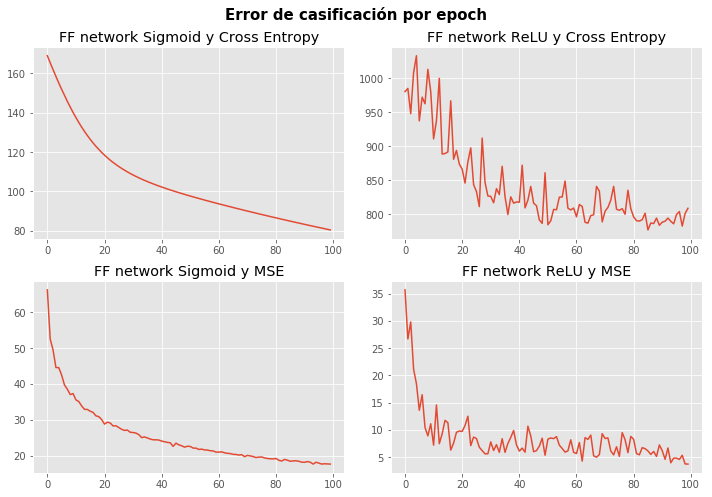

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.suptitle("Error de casificación por epoch", fontsize = 15, fontweight = 'bold')

plt.subplot(2, 2, 1)
plt.title("FF network Sigmoid y Cross Entropy")
plt.plot(error_sigmoid_ce)

plt.subplot(2, 2, 2)
plt.title("FF network ReLU y Cross Entropy")
plt.plot(error_relu_ce)

plt.subplot(2, 2, 3)
plt.title("FF network Sigmoid y MSE")
plt.plot(error_sigmoid_mse)

plt.subplot(2, 2, 4)
plt.title("FF network ReLU y MSE")
plt.plot(error_relu_mse)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# COMENTAR

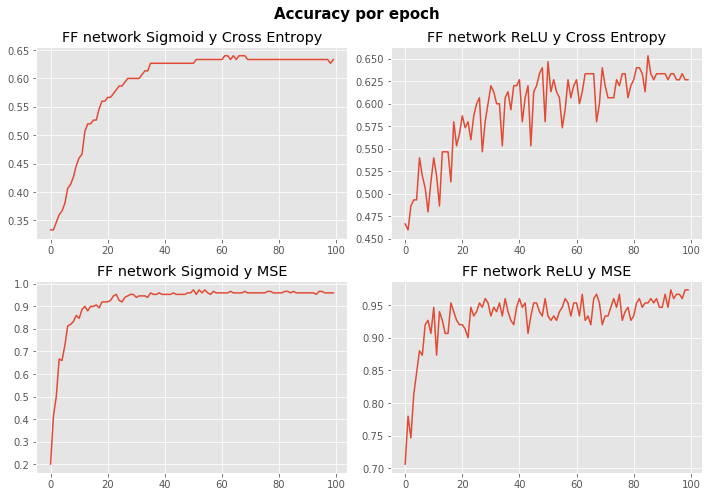

In [92]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.suptitle("Accuracy por epoch", fontsize = 15, fontweight = 'bold')
plt.subplot(2, 2, 1)

plt.title("FF network Sigmoid y Cross Entropy")
plt.plot(accuracy_sigmoid_ce)


plt.subplot(2, 2, 2)
plt.title("FF network ReLU y Cross Entropy")
plt.plot(accuracy_relu_ce)

plt.subplot(2, 2, 3)
plt.title("FF network Sigmoid y MSE")
plt.plot(accuracy_sigmoid_mse)

plt.subplot(2, 2, 4)
plt.title("FF network ReLU y MSE")
plt.plot(accuracy_relu_mse)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# Comentar

In [47]:
#normalizar los errores 
error_sigmoid_ce_norm = 1-(error_sigmoid_ce - np.max(error_sigmoid_ce))/-np.ptp(error_sigmoid_ce)
error_relu_ce_norm = 1-(error_relu_ce - np.max(error_relu_ce))/-np.ptp(error_relu_ce)
error_sigmoid_mse_norm = 1-(error_sigmoid_mse - np.max(error_sigmoid_mse))/-np.ptp(error_sigmoid_mse)
error_relu_mse_norm = 1-(error_relu_mse - np.max(error_relu_mse))/-np.ptp(error_relu_mse)

In [48]:
print(error_sigmoid_ce_norm)

[1.00000000e+00 7.75308887e-01 6.17865525e-01 5.13367420e-01
 4.32884070e-01 3.81689403e-01 3.36997312e-01 2.99332699e-01
 2.83588387e-01 2.58575356e-01 2.35297529e-01 2.24468478e-01
 2.19456184e-01 2.01575473e-01 1.95886517e-01 1.85507686e-01
 1.77679228e-01 1.71542414e-01 1.61843257e-01 1.52828425e-01
 1.47304327e-01 1.42279435e-01 1.39202658e-01 1.33966424e-01
 1.29965485e-01 1.24292480e-01 1.16030797e-01 1.16326962e-01
 1.07254400e-01 1.07748023e-01 1.04936725e-01 1.04521538e-01
 9.88113626e-02 9.30180452e-02 9.51799127e-02 8.94410295e-02
 8.65569264e-02 7.83843689e-02 7.45677173e-02 7.98191646e-02
 7.79870196e-02 7.21877941e-02 7.08438327e-02 7.17535857e-02
 6.43771403e-02 6.62513050e-02 6.30574451e-02 6.16931259e-02
 5.68945624e-02 5.84185364e-02 5.15836298e-02 5.64116286e-02
 5.19403306e-02 4.76639620e-02 5.11329388e-02 4.74044708e-02
 4.60701899e-02 3.97344844e-02 4.37957428e-02 3.63568669e-02
 4.05451326e-02 3.66963580e-02 3.64254309e-02 3.70495409e-02
 3.01152102e-02 3.130862

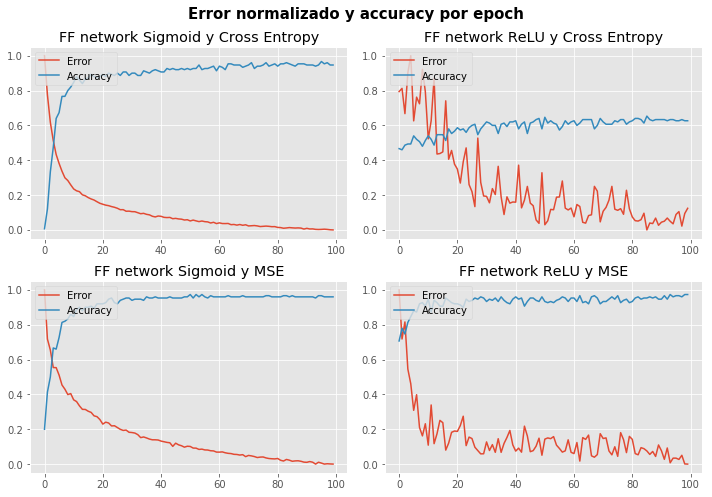

In [73]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.suptitle("Error normalizado y accuracy por epoch", fontsize = 15, fontweight = 'bold')

plt.subplot(2, 2, 1)
plt.title("FF network Sigmoid y Cross Entropy")
plt.plot(error_sigmoid_ce_norm)
plt.plot(accuracy_sigmoid_ce)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')


plt.subplot(2, 2, 2)
plt.title("FF network ReLU y Cross Entropy")
plt.plot(error_relu_ce_norm)
plt.plot(accuracy_relu_ce)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.subplot(2, 2, 3)
plt.title("FF network Sigmoid y MSE")
plt.plot(error_sigmoid_mse_norm)
plt.plot(accuracy_sigmoid_mse)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.subplot(2, 2, 4)
plt.title("FF network ReLU y MSE")
plt.plot(error_relu_mse_norm)
plt.plot(accuracy_relu_mse)
#plt.ylabel('Classification error')
#plt.xlabel('Epoch')
plt.legend(['Error', 'Accuracy'], loc='upper left')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

Text(0.5,1,'Tiempo de entrenamiento')

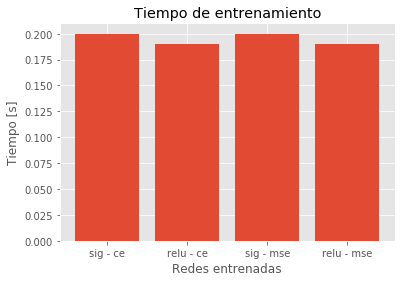

In [72]:

met = ["sig - ce", "relu - ce", "sig - mse", "relu - mse"]
posicion_y = np.arange(len(met))

plt.bar(posicion_y, time_train, align = "center")
plt.xticks(posicion_y, met)
plt.xlabel('Redes entrenadas')
plt.ylabel('Tiempo [s]')
plt.title("Tiempo de entrenamiento")

# comentar

Luego se muestra la matriz de confusión de los modelos entrenados.

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
pred_sig_ce = net_sigmoid_ce.predict(X_train)
print(pred_sig_ce)
print(y_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [100]:
#predictions1 = model1.predict(X_train, verbose=0)
#y_pred1 = np.argmax(predictions1, axis=1)
print("Matriz de confusión Sigmoid/CCO")
print(confusion_matrix(y_train, pred_sig_ce))

Matriz de confusión Sigmoid/CCO
[[50  0  0]
 [36  5  9]
 [12 18 20]]


# COmentar

### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho mas simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.

Mediante Keras es posible definir fácilmente la arquitectura de una red, agregando capa por capa a la red detallando la cantidad de neuronas, la función de activación, la función de pérdida, entre otras configuraciones disponibles en la librería. Acá se visualiza la diferencia entre construir a mano una arquitectura de red neuronal versus la rapidez de importar y utilizar una librería que en cuatro lineas logra un resultado igual o mejor.

Se genera modelos combinando las funciones de activación Sigmoidal/ReLU y las funciones de pérdida CCO/MSE.

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

model1 = Sequential()
model1.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model1.add(Dense(16, activation="sigmoid"))
model1.add(Dense(3, activation="softmax"))

model2 = Sequential()
model2.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model2.add(Dense(16, activation="sigmoid"))
model2.add(Dense(3, activation="softmax"))

model3 = Sequential()
model3.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model3.add(Dense(16, activation="sigmoid"))
model3.add(Dense(3, activation="softmax"))

model4 = Sequential()
model4.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model4.add(Dense(16, activation="relu"))
model4.add(Dense(3, activation="softmax"))

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

In [ ]:
model1.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])
model2.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])
model3.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])
model4.compile(optimizer=SGD(lr=0.1),loss="mse", metrics=["accuracy"])

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

Con las arquitecturas ya creadas se procede a entrenar los modelos, midiendo el tiempo que le toma a cada red.

In [ ]:
start_time = time.time()
history1 = model1.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time Sigmoid/CCE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history2 = model2.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time Sigmoid/MSE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history3 = model3.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time ReLU/CCE : %s [s] --" % (time.time() - start_time))

start_time = time.time()
history4 = model4.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=0)
print("-- training time ReLU/MSE : %s [s] --" % (time.time() - start_time))

# COmentar tiempos

In [ ]:

plt.figure(figsize=(20,10))
plt.suptitle("Comparación modelos implementados vs Keras", fontsize=16)

plt.subplot(221)
plt.gca().set_title('Sigmoid/CCE') 
plt.plot(history1.history["loss"], label="Keras")
#plt.plot(epoch1, loss1, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(222)
plt.gca().set_title('Sigmoid/MSE')
plt.plot(history2.history["loss"], label="Keras")
#plt.plot(loss2, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(223)
plt.gca().set_title('ReLU/CCE')
plt.plot(history3.history["loss"], label="Keras")
#plt.plot(loss3, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])

plt.subplot(224)
plt.gca().set_title('ReLU/MSE')
plt.plot(history4.history["loss"], label="Keras")
#plt.plot(loss4, label="Implementación")
plt.xlabel("Epoch")
plt.ylabel("Pérdida")
plt.legend(["Keras","Implementación"])
plt.show()

- error clasificacion vs epochs (solo con entrenamiento)
- Grafique también la evolución de la función objetivo utilizada para el entrenamiento
- Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado. 
-------------------------------------
- Loss: valor escalar que se trata de minimizar durante el entrenamiento de un modelo. Mientras menos sea , más cercanas son las predicciones a las etiquetas verdaderas.
- Epoch es una pasada completa sobre todos los datos de entrenamiento. 

In [ ]:
predictions1 = model1.predict(X_train, verbose=0)
y_pred1 = np.argmax(predictions1, axis=1)
print("Matriz de confusión Sigmoid/CCO")
print(confusion_matrix(y_train, y_pred1))

predictions2 = model2.predict(X_train, verbose=0)
y_pred2 = np.argmax(predictions2, axis=1)
print("Matriz de confusión Sigmoid/MSE")
print(confusion_matrix(y_train, y_pred2))

predictions3 = model3.predict(X_train, verbose=0)
y_pred3 = np.argmax(predictions3, axis=1)
print("Matriz de confusión ReLU/CCO")
print(confusion_matrix(y_train, y_pred3))

predictions4 = model4.predict(X_train, verbose=0)
y_pred4 = np.argmax(predictions4, axis=1)
print("Matriz de confusión ReLU/MSE")
print(confusion_matrix(y_train, y_pred4))

La matriz de confusión (o error matrix) es una herramienta que permite visualizar el desempeño de un algoritmo en machine learning, especialmente con algoritmos supervisados (en el caso de no supervisados se utiliza la matriz de matching). Cada fila de la matriz representa las instancias en una clase predecida, mientras que las columnas representan las instancias en una clase real. Tiene un especial uso para analizar cuándo un clasificador tiene confusión entre dos clases. Para este experimento se utilizará la matriz proporcionada por la librería *sklearn*.

Mostrando las matrices de confusión para los cuatro modelos queda en evidecia los problemas que existen para clasificar los datos de la clase dos y tres (Iris Versicolor e Iris Virginica, respectivamente] por su similitud en la frontera que separa las dos clases. Los modelos clasifican bien la primera clase pues sus datos son diferenciables del resto.

### 3. Verificación numérica del gradiente para una componente

En esta sección deberá verificar numéricamente el gradiente para los parámetros del modelo (que en este caso son los pesos de la red), que hasta ahora a definido de manera analítica en su programa, por ejemplo la derivada de $x^2$ es $2x$. Ahora deberá verificar estos cálculos usando la definición de gradiente.

$$ \nabla_{w} Loss = \lim_{\epsilon \rightarrow 0} \frac{Loss(w+ \epsilon)-Loss(w)}{\epsilon} $$

Debido a que el *forward propagation* es relativamente fácil de implementar, se puede confiar en que se realizó de manera correcta, por lo que el cómputo del error (*loss*) debería ser correcto. Esto significa que podemos verificar el gradiente o la derivada analítica del error $\frac{\partial Loss}{\partial w}$ comprobando que el resultado obtenido es similar (dentro de una tolerancia numérica, por ejemplo $10^6$) al valor que obtenemos aplicando la fórmula anterior. Naturalmente interpretaremos $\lim_{\epsilon \rightarrow 0}$ como un valor "*suficientemente pequeño*" de $\epsilon$.

> a) Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta, calcule el valor del gradiente de la función de error para ambas funciones utilizadas (ayúdese mediante las funciones de *backward pass* implementadas anteriormente), luego compare y verifique con el valor numérico del gradiente mediante el procedimiento explicado anteriormente.

Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta,el gradiente o la derivada analítica del error corresponde a $\frac{\partial Loss}{\partial w_1}$.

In [ ]:
import numpy as np 
from sympy import *

epsilon = Symbol('epsilon')
w = Symbol('w')

exp = (loss(w + epsilon) - loss(w))/epsilon

gradient_loss = limit(exp, epsilon, 0)

# nunca lo probamos

> b) Vuelva a verificar el valor del gradiente para otros dos pesos escodigos aleatoriamente en la primera operación de la red. Compare y concluya.

### 4. Implementar *momentum* como variante

En esta sección deberá construir, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal, una variante del programa definido anteriormente ([sección 1](#primero)) que entrene la red utilizando *momentum* clásico.

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

>> *Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, February). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147).*


> Demuestre que su programa funciona en el mismo problema de clasificación presentado anteriormente, para esto, además deberá construir un gráfico de la función de error o pérdida (*loss*) *vs* el número de *epochs* y comentar/analizar la convergencia. ¿Es una mejora significativa? 

En redes neuronales, se utiliza *gradient descent* para minimizar el error de la función de evaluación para alcanzar un mínimo global. En un espacio de soluciones cóncavo es fácil encontrar un óptimo global porque no hay mínimos locales donde la función pueda quedarse atrapada. En problemas más complejos, los espacios de soluciones tienden a ser convexos, dificultando la posibilidad de encontrar un óptimo global.

Para evitar esta situación, se introduce el concepto de *momentum* en la función objetivo, el cual se evalua en $[0,1]$ incrementando el tamaño de los pasos que da el algoritmos para escapar de estos mínimos locales. Si se escoje un *momentum* grande, entonces la tasa de aprendizaje debería mantenerse más pequeña. Un gran valor de *momentum* también significa que la convergencia ocurrirá rápidamente. Pero si tanto el *momentum* como la tasa de aprendizaje se mantienen en valores grandes, entonces puede escapar de un mínimo con un gran paso. Un valor pequeño de *momentum* no puede evitar de manera confiable los mínimos locales, ralentizando el entrenamiento del sistema. El *momentum* también ayuda a suavizar las variaciones, si el gradiente cambia de dirección.

Dada una función objetivo $f(\theta)$ a ser minimizada, el momentum clásico viene dado por:

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

donde $\eta$ es la tasa de aprendizaje (*learning rate*), $\mu\in[0,1]$ es el coeficiente de momentum, y $\nabla_{w^{(t)}} Loss$ es el gradiente de $w^{(t)}$.